## FOREST FIRE AREA PREDICT (ANALYSIS)

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 50)
plotsize=(16, 9)

In [2]:
data = pd.read_csv('datasets/forest_fire_dataset.csv')
print('Количество признаков:', len(data.columns))
print('Количество объектов:', len(data))

Количество признаков: 13
Количество объектов: 517


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [4]:
data.describe()

X           Y        FFMC         DMC          DC         ISI  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     4.669246    4.299807   90.644681  110.872340  547.940039    9.021663   
std      2.313778    1.229900    5.520111   64.046482  248.066192    4.559477   
min      1.000000    2.000000   18.700000    1.100000    7.900000    0.000000   
25%      3.000000    4.000000   90.200000   68.600000  437.700000    6.500000   
50%      4.000000    4.000000   91.600000  108.300000  664.200000    8.400000   
75%      7.000000    5.000000   92.900000  142.400000  713.900000   10.800000   
max      9.000000    9.000000   96.200000  291.300000  860.600000   56.100000   

             temp          RH        wind        rain         area  
count  517.000000  517.000000  517.000000  517.000000   517.000000  
mean    18.889168   44.288201    4.017602    0.021663    12.847292  
std      5.806625   16.317469    1.791653    0.295959    63.655818  
min      2.200000   15.000000    0.400000    0.000000     0.000000  
25%     15.500000   33.000000    2.700000    0.000000     0.000000  
50%     19.300000   42.000000    4.000000    0.000000     0.520000  
75%     22.800000   53.000000    4.900000    0.000000     6.570000  
max     33.300000  100.000000    9.400000    6.400000  1090.840000

In [5]:
print(data)

     X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
0    7  5   mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00
1    7  4   oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00
2    7  4   oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00
3    8  6   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00
4    8  6   mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00
..  .. ..   ...  ...   ...    ...    ...   ...   ...  ..   ...   ...    ...
512  4  3   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44
513  2  4   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29
514  7  4   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16
515  1  4   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00
516  6  3   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00

[517 rows x 13 columns]


In [6]:
data['month'].value_counts()

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64

In [7]:
data['day'].value_counts()

sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64

In [3]:
cleared_data = data[data['area'] > 0.0]
cleared_data.info()
print(cleared_data.sort_values('area'))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270 entries, 138 to 514
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       270 non-null    int64  
 1   Y       270 non-null    int64  
 2   month   270 non-null    object 
 3   day     270 non-null    object 
 4   FFMC    270 non-null    float64
 5   DMC     270 non-null    float64
 6   DC      270 non-null    float64
 7   ISI     270 non-null    float64
 8   temp    270 non-null    float64
 9   RH      270 non-null    int64  
 10  wind    270 non-null    float64
 11  rain    270 non-null    float64
 12  area    270 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 29.5+ KB
     X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain     area
246  5  4   aug  sun  91.8  175.1  700.7  13.8  25.7  39   5.4   0.0     0.09
266  6  5   aug  tue  94.3  131.7  607.1  22.7  19.4  55   4.0   0.0     0.17
252  6  5   aug  wed  93.1  157.3  666.7 

In [9]:
cleared_data.describe()

X           Y        FFMC         DMC          DC         ISI  \
count  270.000000  270.000000  270.000000  270.000000  270.000000  270.000000   
mean     4.807407    4.366667   91.034074  114.707778  570.867037    9.177037   
std      2.383326    1.170740    3.709020   61.786520  229.981242    4.147350   
min      1.000000    2.000000   63.500000    3.200000   15.300000    0.800000   
25%      3.000000    4.000000   90.325000   82.900000  486.500000    6.800000   
50%      5.000000    4.000000   91.700000  111.700000  665.600000    8.400000   
75%      7.000000    5.000000   92.975000  141.300000  721.325000   11.375000   
max      9.000000    9.000000   96.200000  291.300000  860.600000   22.700000   

             temp          RH        wind        rain         area  
count  270.000000  270.000000  270.000000  270.000000   270.000000  
mean    19.311111   43.733333    4.112963    0.028889    24.600185  
std      6.179444   15.080059    1.884573    0.398392    86.501635  
min      2.200000   15.000000    0.400000    0.000000     0.090000  
25%     16.125000   33.000000    2.700000    0.000000     2.140000  
50%     20.100000   41.000000    4.000000    0.000000     6.370000  
75%     23.400000   53.000000    4.900000    0.000000    15.422500  
max     33.300000   96.000000    9.400000    6.400000  1090.840000

In [10]:
null_data = data[data['area'] == 0.0]
null_data.info()
print(null_data.sort_values('area'))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       247 non-null    int64  
 1   Y       247 non-null    int64  
 2   month   247 non-null    object 
 3   day     247 non-null    object 
 4   FFMC    247 non-null    float64
 5   DMC     247 non-null    float64
 6   DC      247 non-null    float64
 7   ISI     247 non-null    float64
 8   temp    247 non-null    float64
 9   RH      247 non-null    int64  
 10  wind    247 non-null    float64
 11  rain    247 non-null    float64
 12  area    247 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 27.0+ KB
     X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  area
0    7  5   mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.0
298  8  6   jun  wed  91.2  147.8  377.2  12.7  19.6  43   4.9   0.0   0.0
299  6  5   jun  sat  53.4   71.0  233.8   0.4  10.6

In [11]:
null_data.describe()

X           Y        FFMC         DMC          DC         ISI  \
count  247.000000  247.000000  247.000000  247.000000  247.000000  247.000000   
mean     4.518219    4.226721   90.219028  106.679757  522.878138    8.851822   
std      2.230305    1.289898    6.965969   66.300811  264.637833    4.974102   
min      1.000000    2.000000   18.700000    1.100000    7.900000    0.000000   
25%      3.000000    4.000000   90.200000   51.300000  360.100000    6.300000   
50%      4.000000    4.000000   91.600000  103.200000  661.300000    8.400000   
75%      6.000000    5.000000   92.600000  142.400000  706.500000   10.600000   
max      9.000000    9.000000   96.200000  290.000000  855.300000   56.100000   

             temp          RH        wind        rain   area  
count  247.000000  247.000000  247.000000  247.000000  247.0  
mean    18.427935   44.894737    3.913360    0.013765    0.0  
std      5.344018   17.581779    1.681857    0.100268    0.0  
min      4.200000   15.000000    0.900000    0.000000    0.0  
25%     15.200000   32.000000    2.700000    0.000000    0.0  
50%     18.600000   42.000000    3.600000    0.000000    0.0  
75%     21.600000   54.000000    5.150000    0.000000    0.0  
max     32.400000  100.000000    8.500000    1.000000    0.0

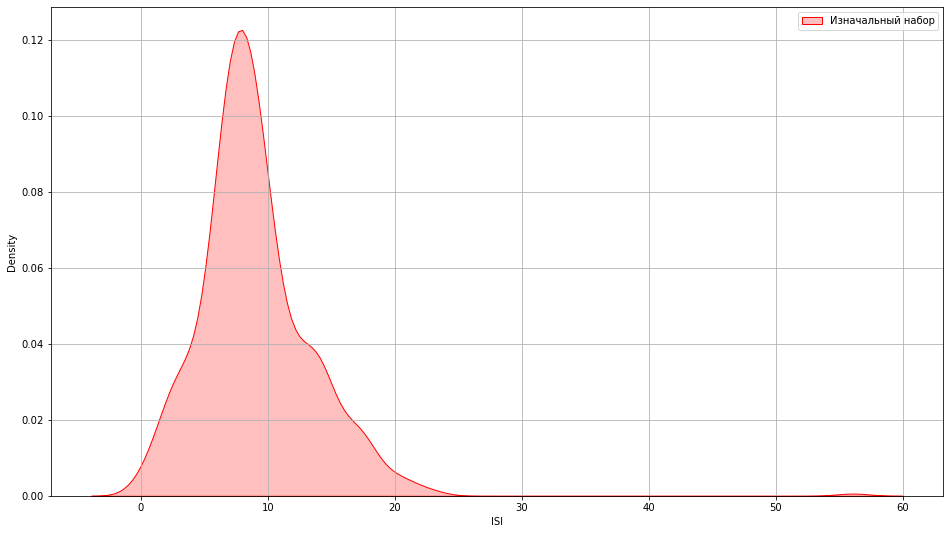

In [196]:
plt.figure(figsize=plotsize)
plt.grid(True)
sns.kdeplot(data['ISI'], shade=True, color='r', label="Изначальный набор")
# sns.kdeplot(cleared_data['area'], shade=True, color='b', label="Набор без нулевых значений area")
# sns.kdeplot(null_data['area'], shade=True, color='g', label="Набор нулевых значений area")
plt.legend()

In [13]:
cleared_data['month'].value_counts()

aug    99
sep    97
mar    19
jul    18
feb    10
dec     9
jun     8
oct     5
apr     4
may     1
Name: month, dtype: int64

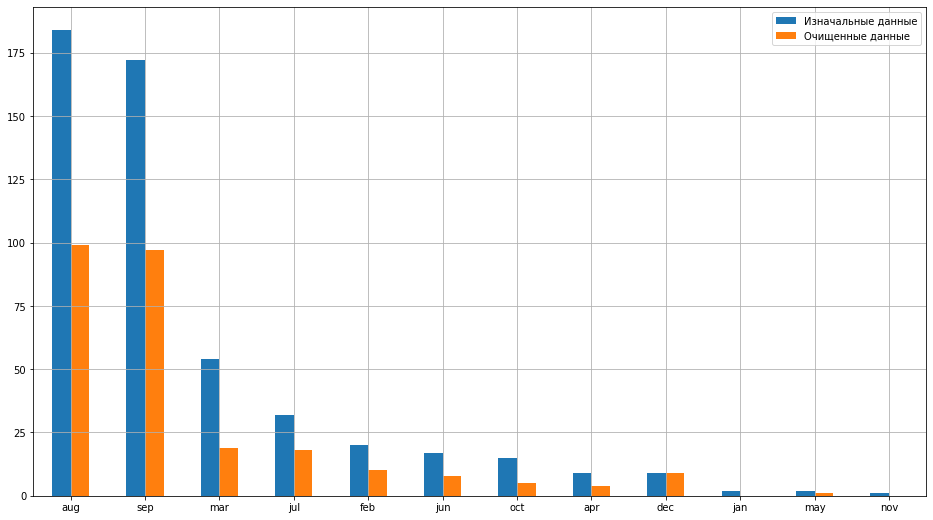

In [14]:
months = data['month'].value_counts().keys()
df = pd.DataFrame({'Изначальные данные': [sum(data['month']==i) for i in months],
                   'Очищенные данные': [sum(cleared_data['month']==i) for i in months]}, index=months)

ax = df.plot.bar(rot=0, figsize=plotsize, grid=True)

<AxesSubplot:xlabel='month', ylabel='area'>

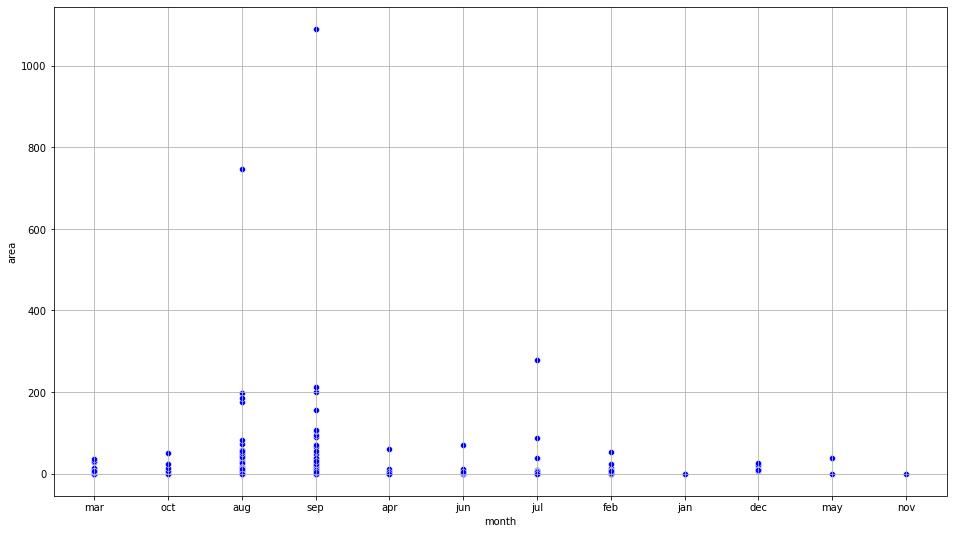

In [15]:
plt.figure(figsize=plotsize)
plt.grid(True)
sns.scatterplot(x='month', y='area', data=data, color='b')

<AxesSubplot:xlabel='month', ylabel='area'>

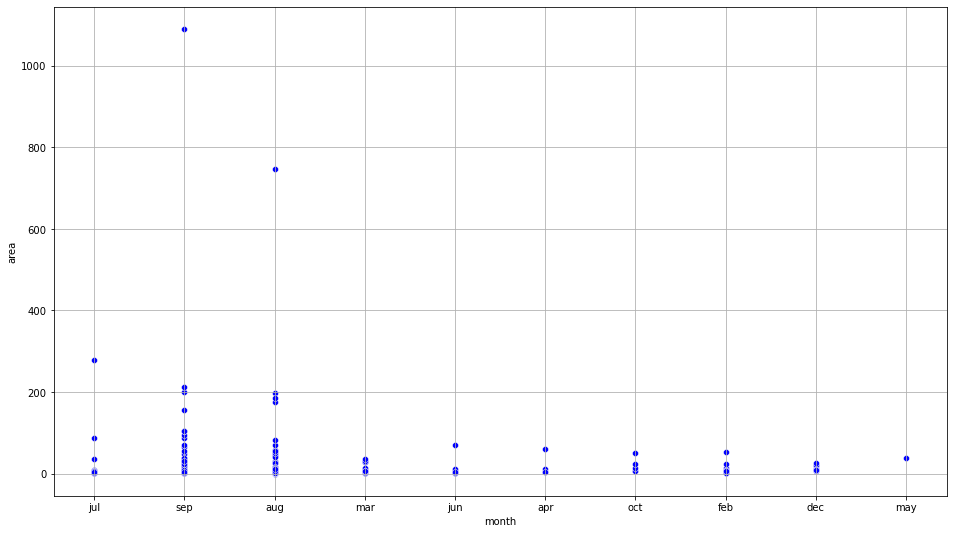

In [16]:
plt.figure(figsize=plotsize)
plt.grid(True)
sns.scatterplot(x='month', y='area', data=cleared_data, estimator='mean', color='b')

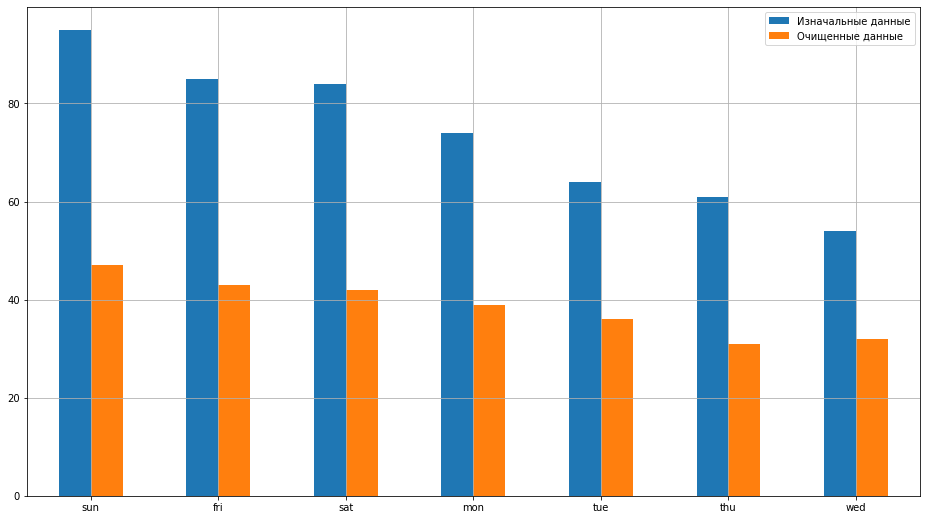

In [17]:
days = data['day'].value_counts().keys()
df = pd.DataFrame({'Изначальные данные': [sum(data['day']==i) for i in days],
                   'Очищенные данные': [sum(cleared_data['day']==i) for i in days]}, index=days)

ax = df.plot.bar(rot=0, figsize=plotsize, grid=True)

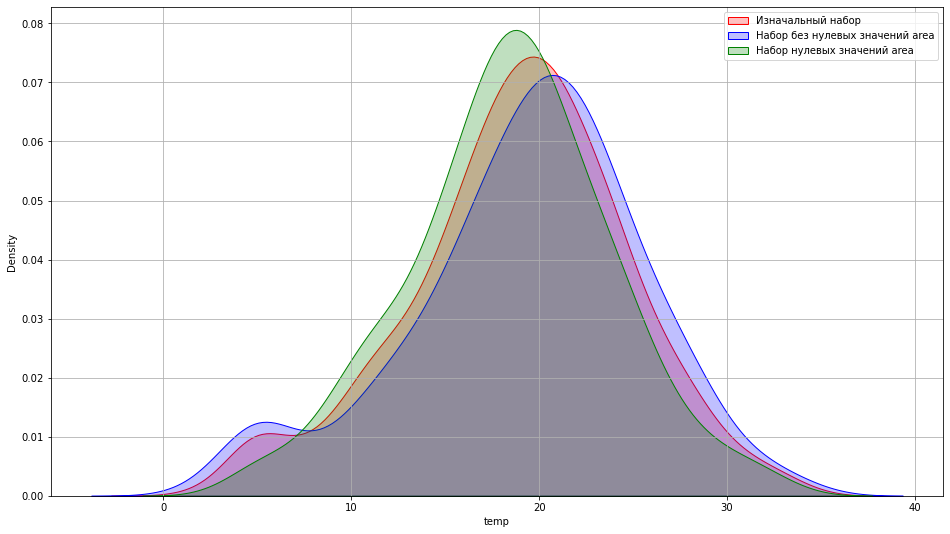

In [18]:
plt.figure(figsize=plotsize)
plt.grid(True)
sns.kdeplot(data['temp'], shade=True, color='r', label="Изначальный набор")
sns.kdeplot(cleared_data['temp'], shade=True, color='b', label="Набор без нулевых значений area")
sns.kdeplot(null_data['temp'], shade=True, color='g', label="Набор нулевых значений area")
plt.legend()

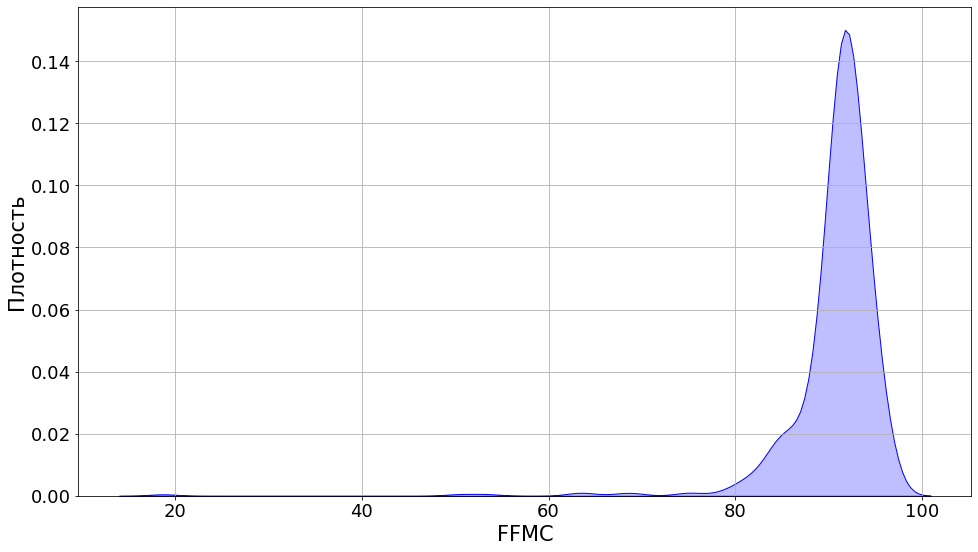

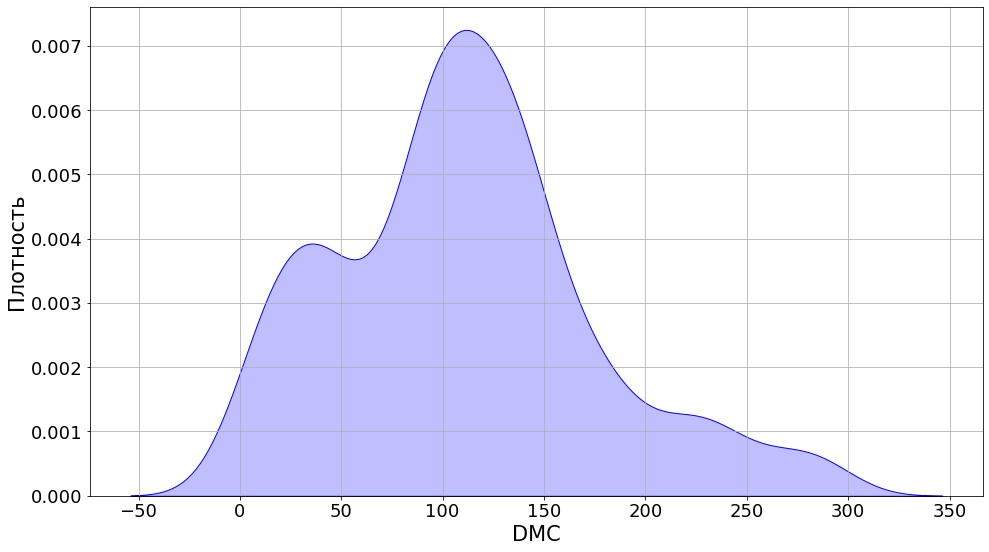

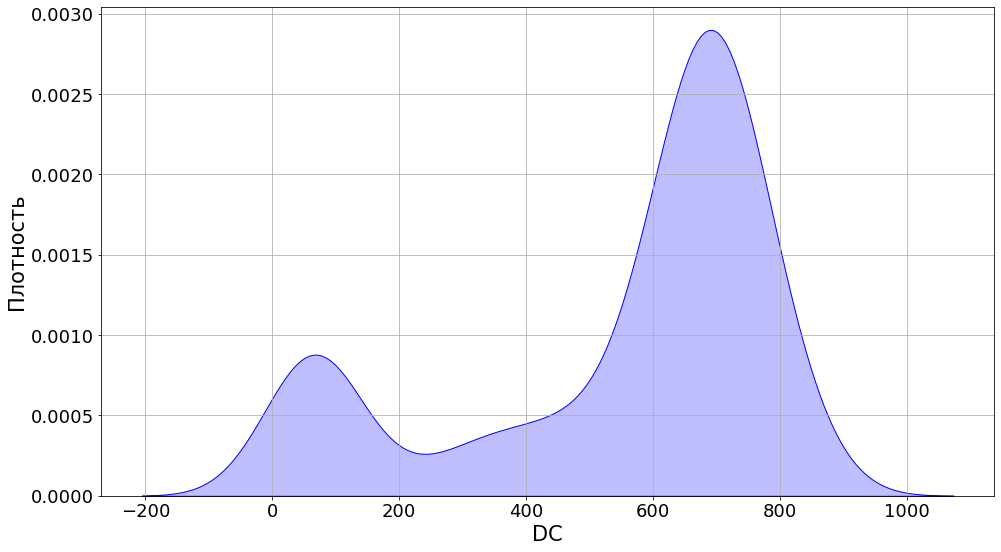

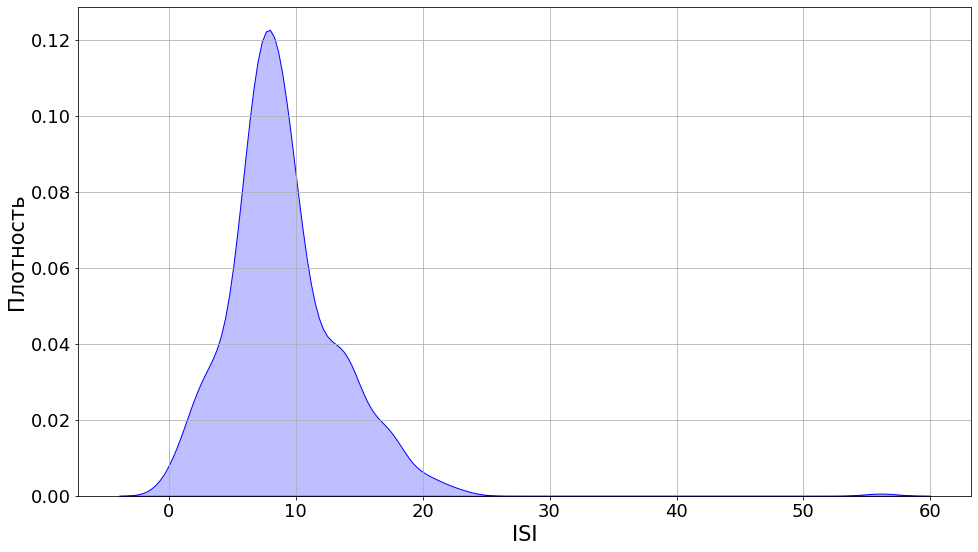

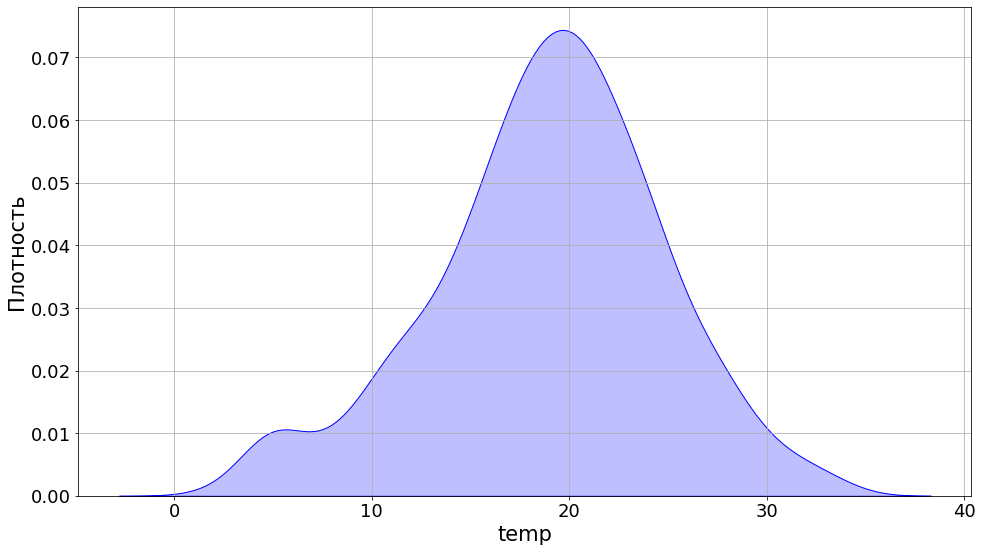

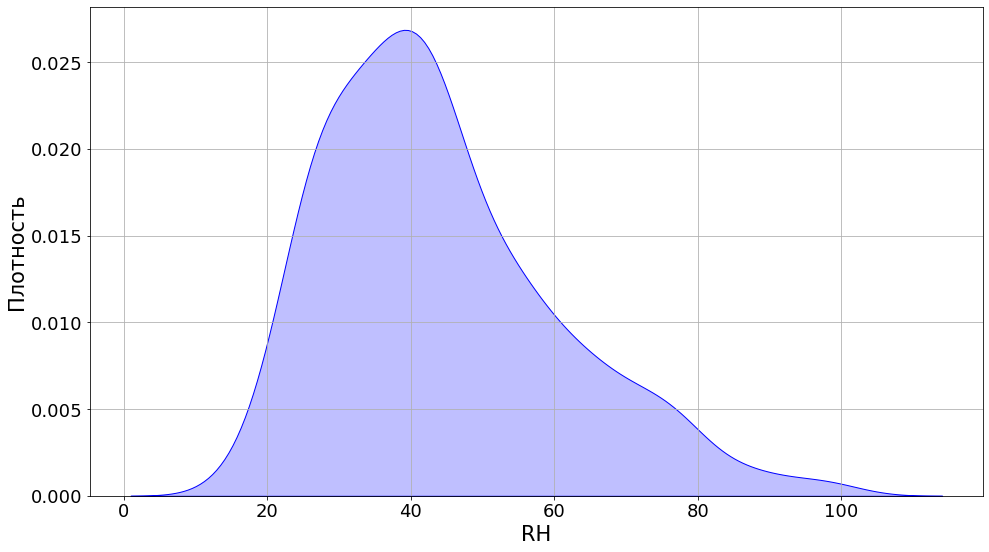

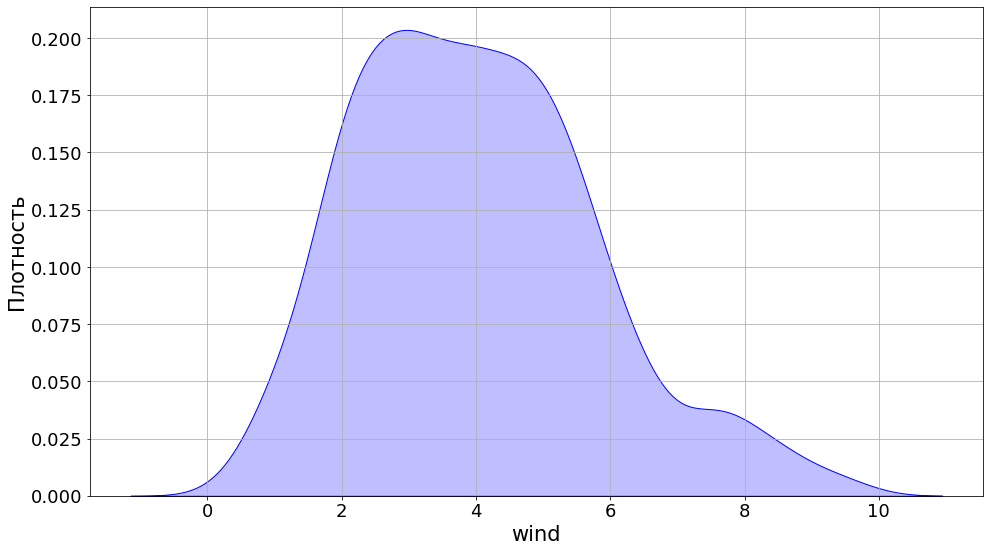

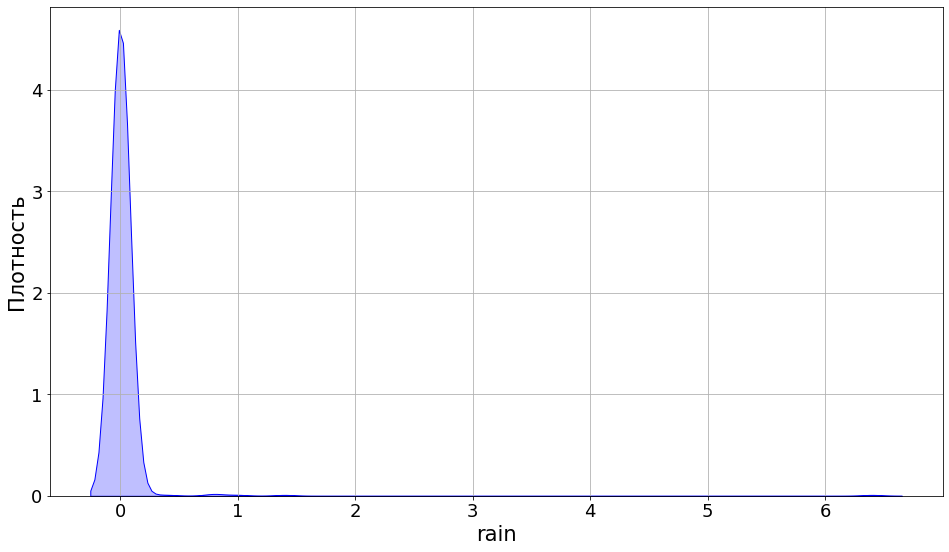

In [32]:
for param in ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']:
    plt.figure(figsize=plotsize)
    plt.grid(True)
    sns.kdeplot(data[param], shade=True, color='b', label="Изначальный набор")
    plt.ylabel("Плотность", fontsize=21)
    plt.xlabel(param, fontsize=21)
#     sns.kdeplot(cleared_data[param], shade=True, color='b', label="Набор без нулевых значений area")
#     sns.kdeplot(null_data[param], shade=True, color='g', label="Набор нулевых значений area")
#     if param == 'FFMC':
#         plt.legend(loc='upper left')
#     else:
#         plt.legend()

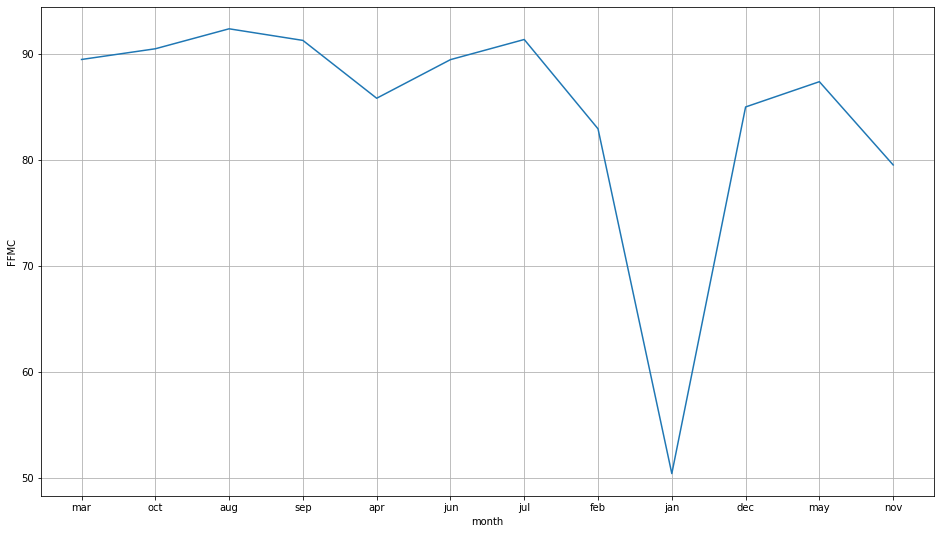

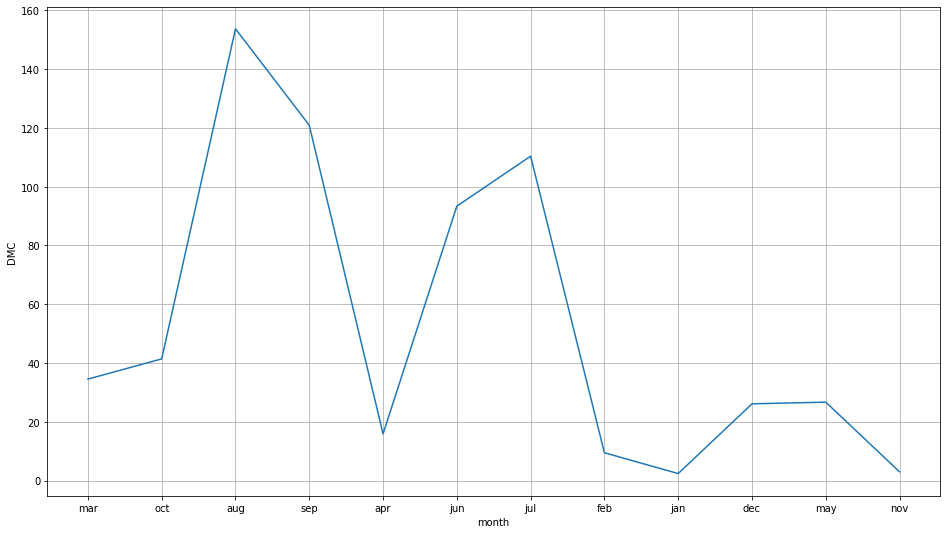

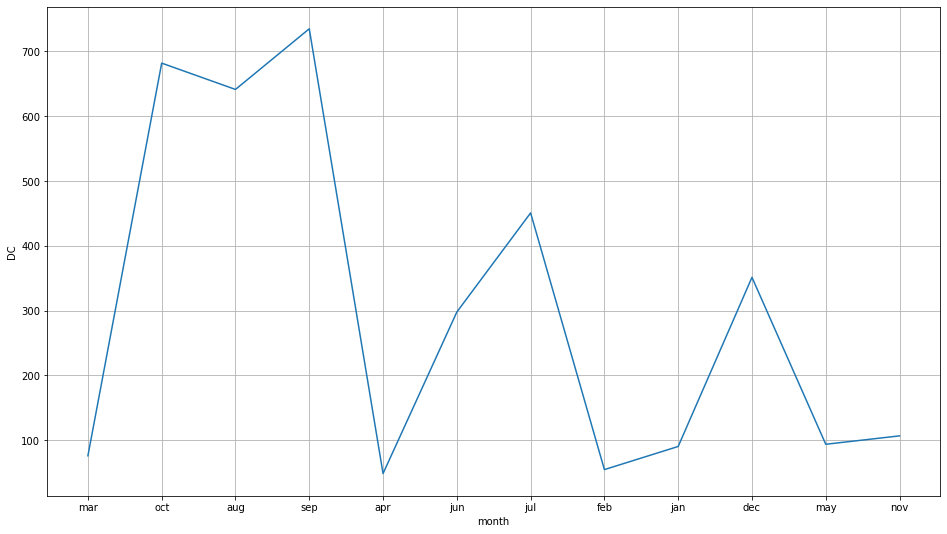

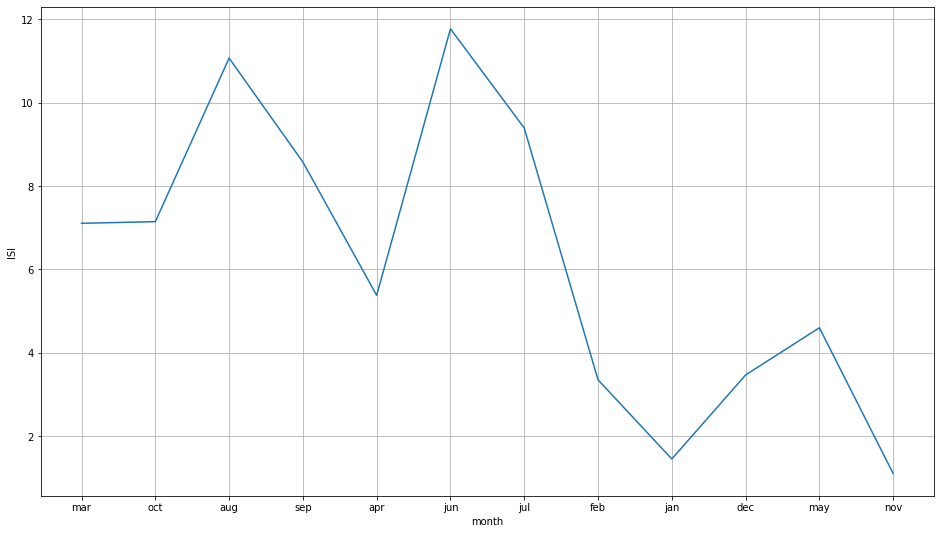

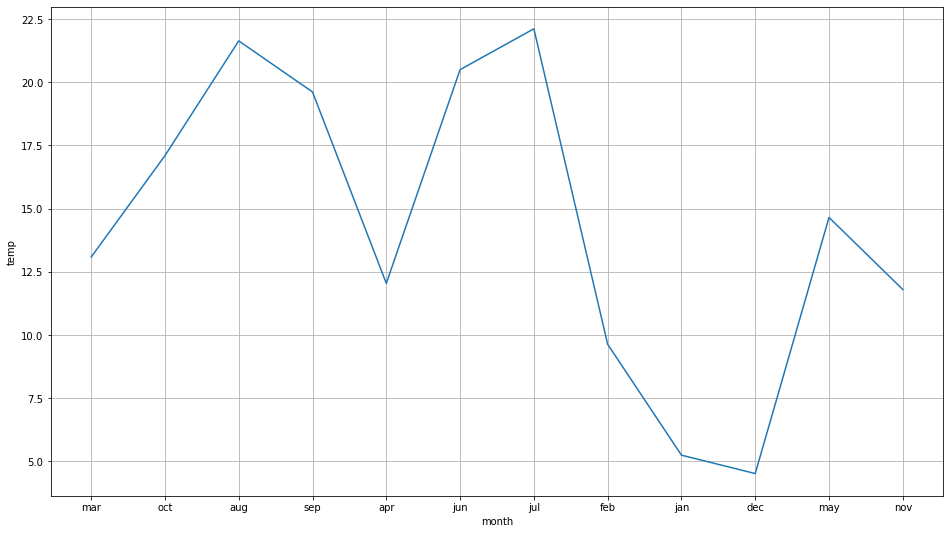

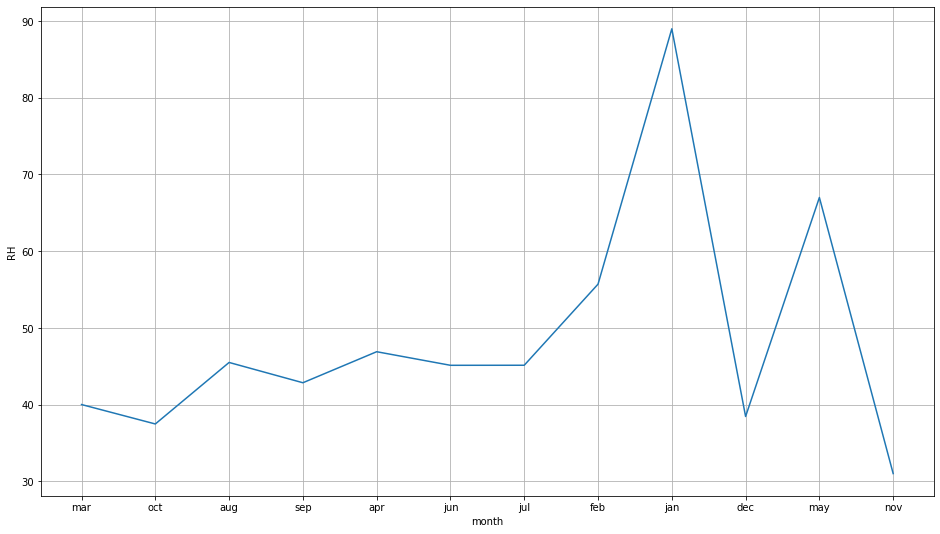

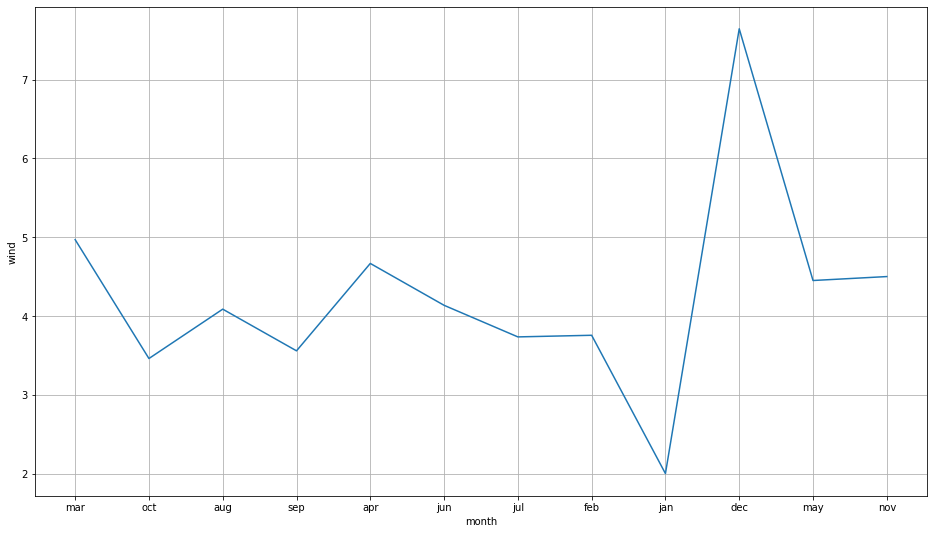

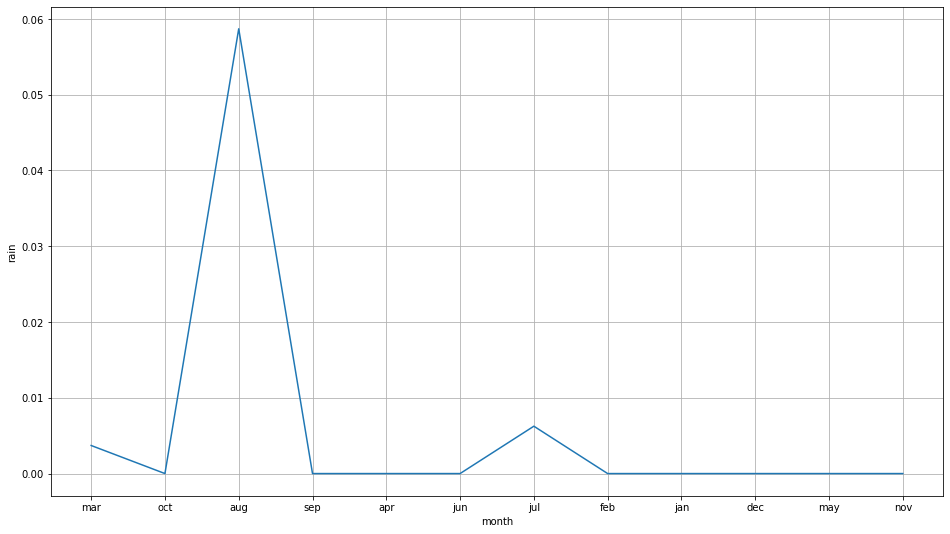

In [20]:
for col in data:
    if col in  ['month', 'X', 'Y', 'day', 'area']:
        continue
    plt.figure(figsize=plotsize)
    plt.grid(True)
    sns.lineplot(x='month', y=col, data=data, estimator='mean', err_style=None)
#     sns.lineplot(x='month', y='area', data=data, estimator='sum', err_style=None)

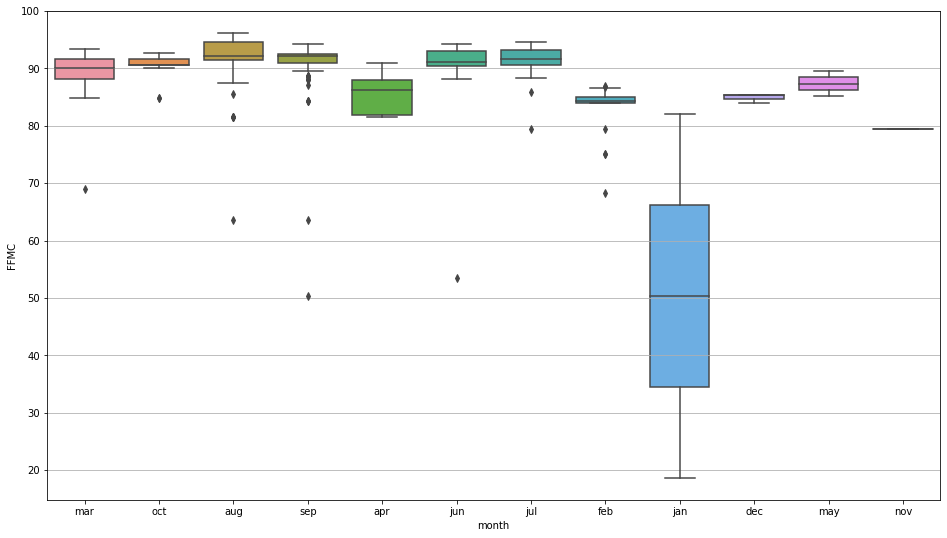

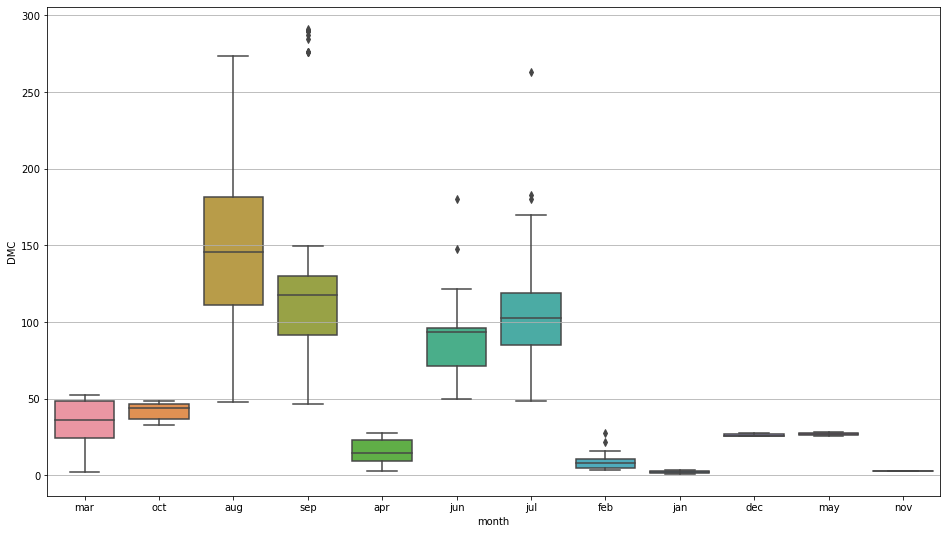

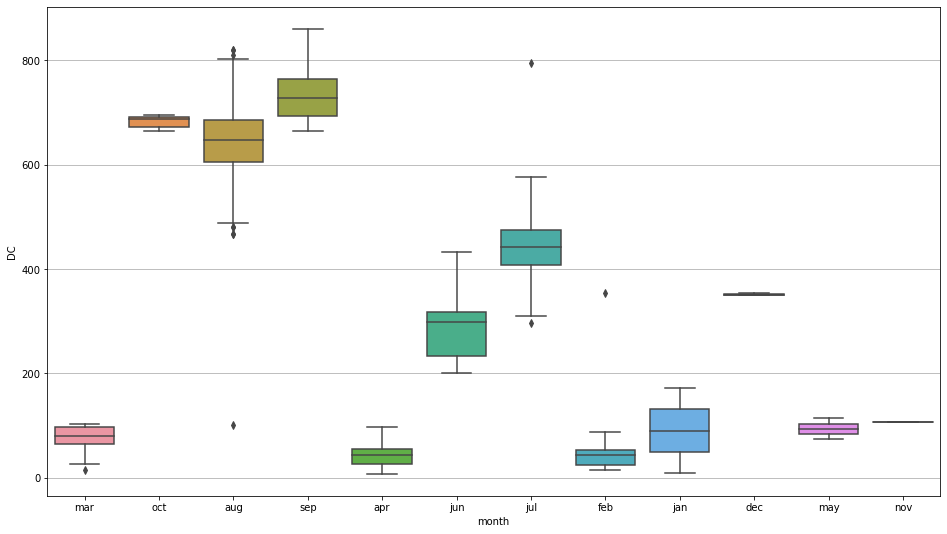

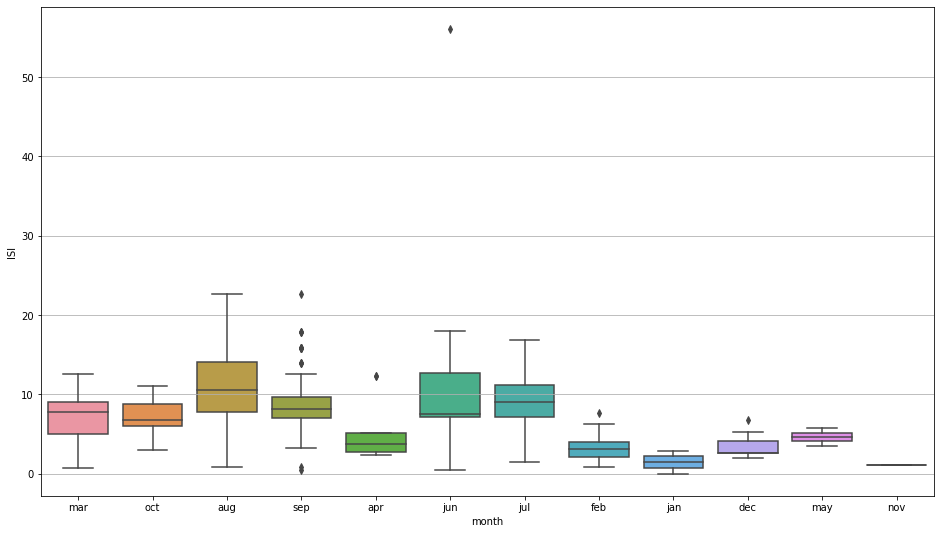

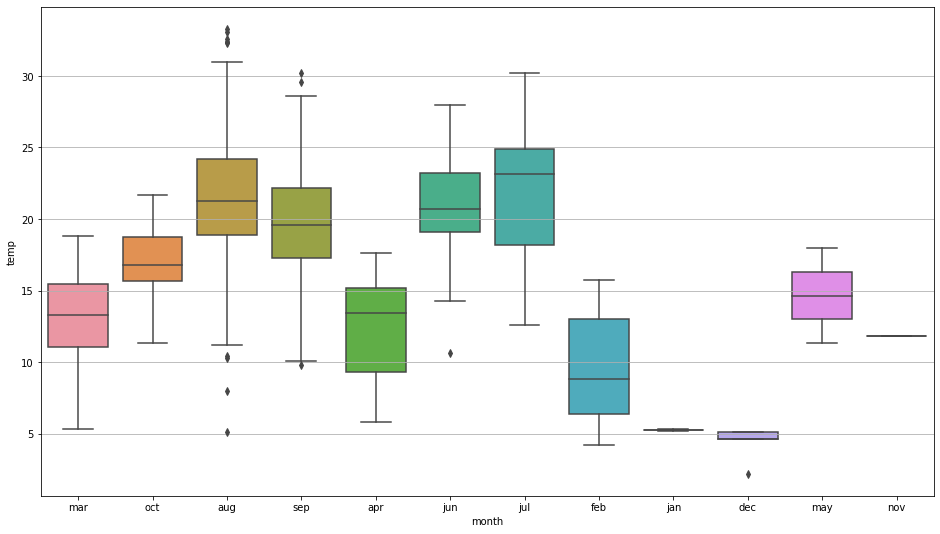

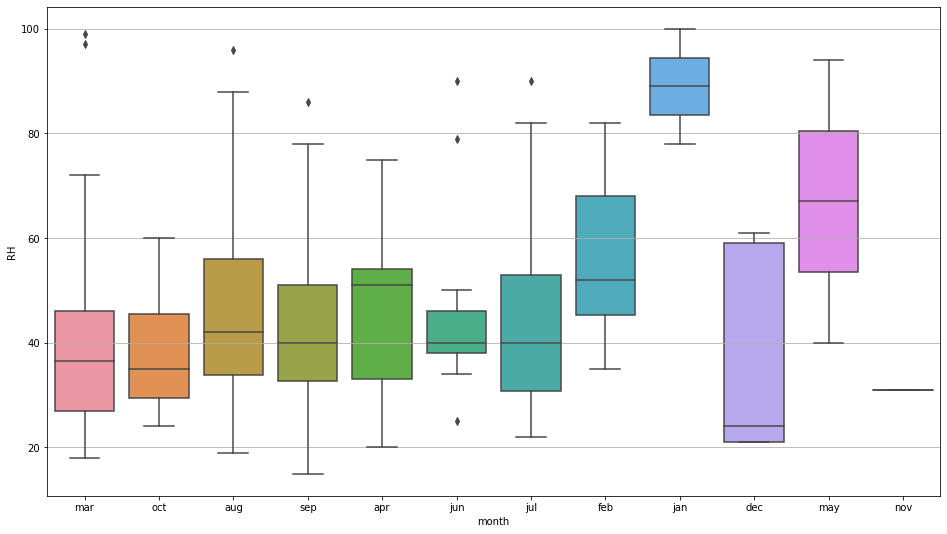

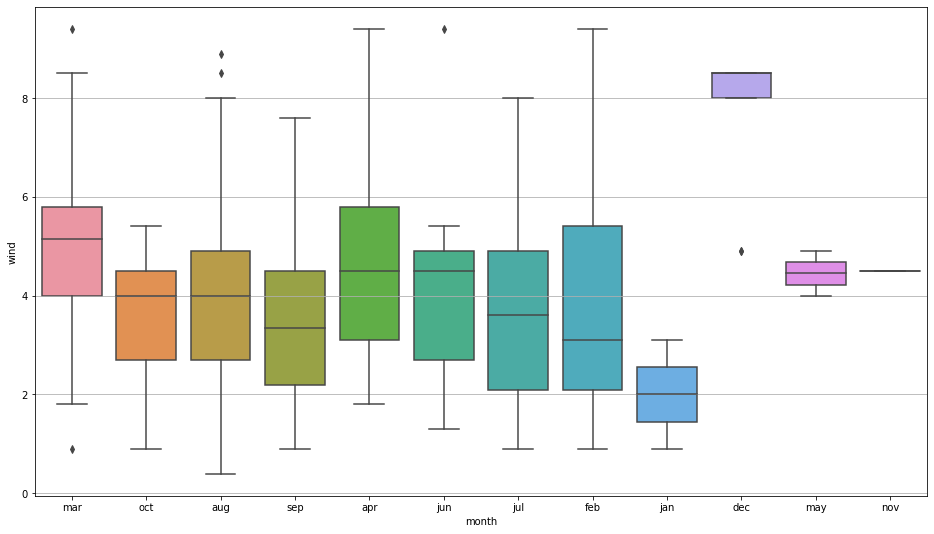

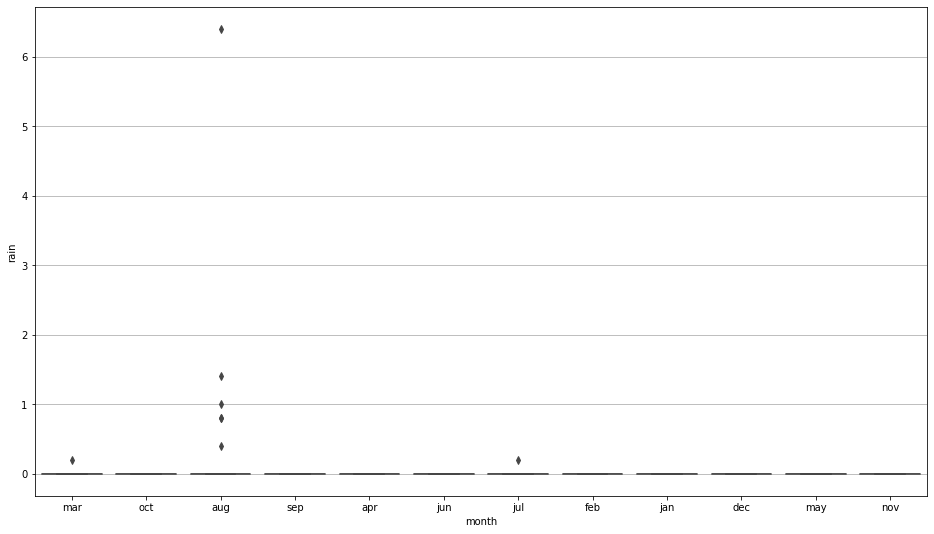

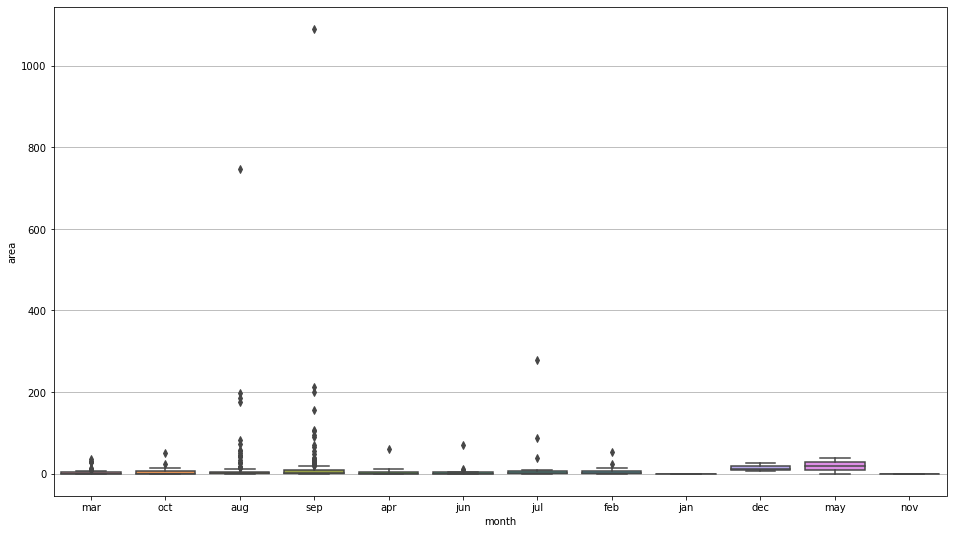

In [21]:
for col in data:
    if col in ['month', 'X', 'Y', 'day']:
        continue
    plt.figure(figsize=plotsize)
    plt.grid(True)
    sns.boxplot(x='month', y=col, data=data)

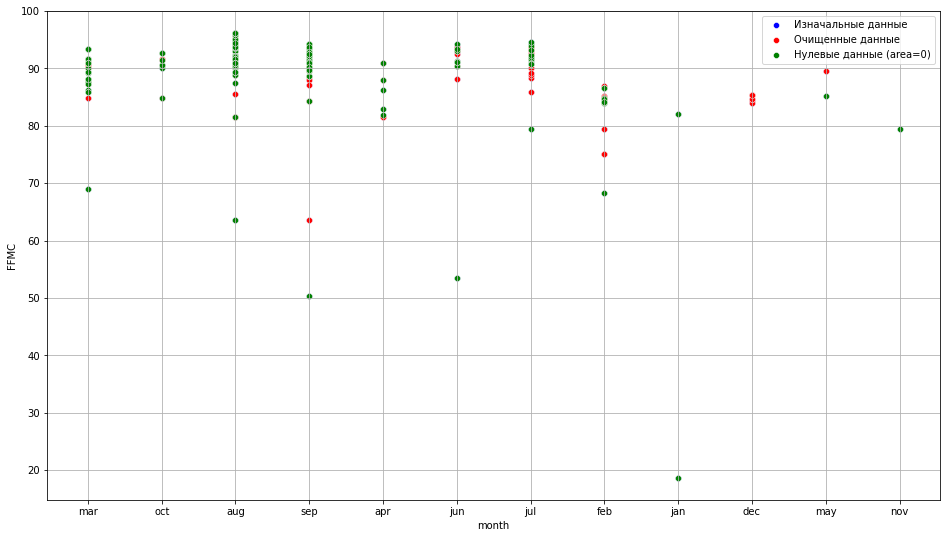

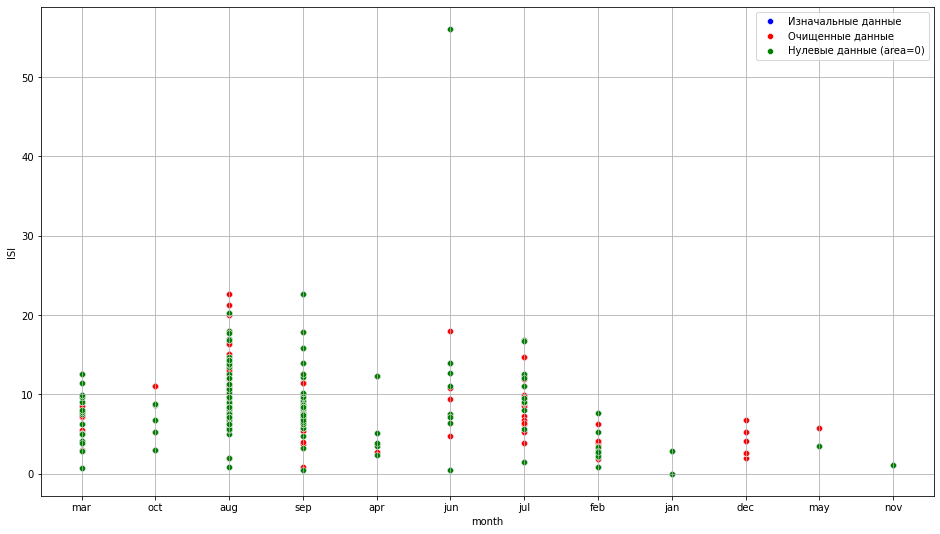

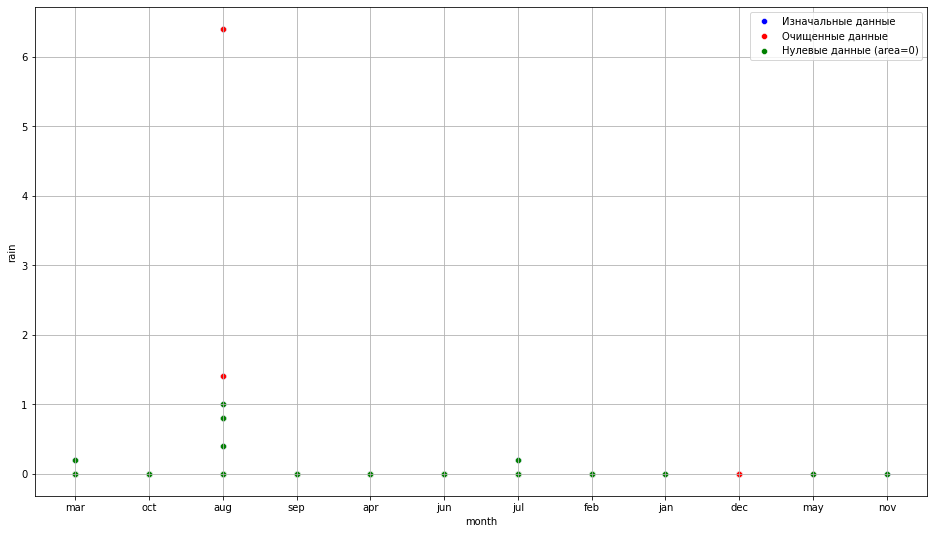

In [22]:
for param in ['FFMC', "ISI", "rain"]:
    plt.figure(figsize=plotsize)
    plt.grid(True)
    sns.scatterplot(x='month', y=param, data=data, color='b', label='Изначальные данные')
    sns.scatterplot(x='month', y=param, data=cleared_data, color='r', label='Очищенные данные')
    sns.scatterplot(x='month', y=param, data=null_data, color='g', label='Нулевые данные (area=0)')
    plt.legend()

## ///////////////////////////////////////PREDICTION/////////////////////////////////////////

Benchmark:

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split

def benchmark(input_data):
    
    print("\n---------------------PCA--------------------------------\n")
    
    s_scaler = preprocessing.StandardScaler()
    normalized_standart_data = input_data.copy()
    tmp = s_scaler.fit_transform(input_data.loc[:, "FFMC" : "wind"])
    normalized_standart_data.loc[:, "FFMC" : "wind"] = tmp
    normalized_standart_data['X'] = normalized_standart_data['X'].astype('category')
    normalized_standart_data['Y'] = normalized_standart_data['Y'].astype('category')
    normalized_standart_data.describe()

    # X = normalized_standart_data.drop(['area'], axis=1)
    X = normalized_standart_data.drop(['area', 'month', 'day'], axis=1)
    pca = PCA(n_components=len(X.columns))
    pca.fit_transform(X)
    for index, ratio in enumerate(pca.explained_variance_ratio_):
        print(X.columns[index], ' -> ', ratio)

    plt.grid(True)
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    
    print("\n-------------------------------------------------\n")
    
    clean_data = input_data.drop(["X", 'Y', 'month', 'day'], axis=1)
    target = clean_data['area']
    features = clean_data.drop(columns = 'area')

    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 42)

    print ("Train data set size : ", x_train.shape)
    print ("Test data set size : ", x_test.shape)
    results = {}
    
    print("\n-------------------------------------------------\n")

    print("Linear Regression")
    lReg = LinearRegression()
    lReg.fit(x_train, y_train)
    prediction_lReg = lReg.predict(x_test)
    score = explained_variance_score(y_test, prediction_lReg)
    mae = mean_absolute_error(y_test, prediction_lReg)
    r2Score = r2_score(y_test, prediction_lReg)
    mse = mean_squared_error(y_test, prediction_lReg)

    print("Score:", score)
    print("Mean Absolute Error:", mae)
    print("R2 Score:", r2Score)
    print("Mean Squared Error:", mse)
    results["Linear Regression"] = [score, mae, r2Score, mse]
    
    print("\n-------------------------------------------------\n")

    print('K-Neighbors Regressor')
    knn = KNeighborsRegressor()
    knn.fit(x_train, y_train)
    prediction_knn = knn.predict(x_test)
    score = explained_variance_score(y_test, prediction_knn)
    mae = mean_absolute_error(y_test, prediction_knn)
    r2Score = r2_score(y_test, prediction_knn)
    mse = mean_squared_error(y_test, prediction_knn)

    print("Score:", score)
    print("Mean Absolute Error:", mae)
    print("R2 Score:", r2Score)
    print("Mean Squared Error:", mse)
    results["K-Neighbors Regressor"] = [score, mae, r2Score, mse]
    
    print("\n-------------------------------------------------\n")

    print('Random Forest Regressor')
    randomTree = RandomForestRegressor()
    randomTree.fit(x_train, y_train)
    prediction_randomTree = randomTree.predict(x_test)
    score = explained_variance_score(y_test, prediction_randomTree)
    mae = mean_absolute_error(y_test, prediction_randomTree)
    r2Score = r2_score(y_test, prediction_randomTree)
    mse = mean_squared_error(y_test, prediction_randomTree)

    print("Score:", score)
    print("Mean Absolute Error:", mae)
    print("R2 Score:", r2Score)
    print("Mean Squared Error:", mse)
    results["RandomForest"] = [score, mae, r2Score, mse]
    
    for (index, item) in enumerate(['FFMC', 'DMC', 'ISI', 'temp', 'RH', 'wind']):
        print(item, "->", randomTree.feature_importances_[index])

    print("\n-------------------------------------------------\n")
    
    print('Extra Trees Regressor')
    extraTree = ExtraTreesRegressor()
    extraTree.fit(x_train, y_train)
    prediction_extraTree = extraTree.predict(x_test)
    score = explained_variance_score(y_test, prediction_extraTree)
    mae = mean_absolute_error(y_test, prediction_extraTree)
    r2Score = r2_score(y_test, prediction_extraTree)
    mse = mean_squared_error(y_test, prediction_extraTree)

    print("Score:", score)
    print("Mean Absolute Error:", mae)
    print("R2 Score:", r2Score)
    print("Mean Squared Error:", mse)
    results["ExtraTrees"] = [score, mae, r2Score, mse]
    
    for (index, item) in enumerate(['FFMC', 'DMC', 'ISI', 'temp', 'RH', 'wind']):
        print(item, "->", extraTree.feature_importances_[index])

    print("\n-------------------------------------------------\n")
    
    print('SVR')
    svr = SVR(C = 100, kernel = 'linear')
    svr.fit(x_train, y_train)
    prediction_svr = svr.predict(x_test)
    score = explained_variance_score(y_test, prediction_svr)
    mae = mean_absolute_error(y_test, prediction_svr)
    r2Score = r2_score(y_test, prediction_svr)
    mse = mean_squared_error(y_test, prediction_svr)

    print("Score:", score)
    print("Mean Absolute Error:", mae)
    print("R2 Score:", r2Score)
    print("Mean Squared Error:", mse)
    results["SVR"] = [score, mae, r2Score, mse]

    result_df = pd.DataFrame.from_dict(results)
    result_df.index = ['explained_variance_score', 'mean_absolute_error', 'r2_score', 'mean_squared_error']
    return result_df

In [17]:
def benchmark2(some_data):
    s_scaler = preprocessing.StandardScaler()
    normalized_standart_data = some_data.copy()
    tmp = s_scaler.fit_transform(some_data.loc[:, "FFMC" : "wind"])
    normalized_standart_data.loc[:, "FFMC" : "wind"] = tmp
    normalized_standart_data['X'] = normalized_standart_data['X'].astype('category')
    normalized_standart_data['Y'] = normalized_standart_data['Y'].astype('category')
    normalized_standart_data.describe()

    # X = normalized_standart_data.drop(['area'], axis=1)
    X = normalized_standart_data.drop(['area'], axis=1)
    pca = PCA(n_components=len(X.columns))
    pca.fit_transform(X)
    for index, ratio in enumerate(pca.explained_variance_ratio_):
        print(X.columns[index], ' -> ', ratio)

    plt.grid(True)
    plt.plot(np.cumsum(pca.explained_variance_ratio_))

    print("\n-------------------------------------------------\n")

    clean_data = some_data.drop(["X", 'Y'], axis=1)
    target = clean_data['area']
    features = clean_data.drop(columns = 'area')

    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 42)

    print ("Train data set size : ", x_train.shape)
    print ("Test data set size : ", x_test.shape)
    results = {}

    print("\n-------------------------------------------------\n")

    print("Linear Regression")
    lReg = LinearRegression()
    lReg.fit(x_train, y_train)
    prediction_lReg = lReg.predict(x_test)
    score = explained_variance_score(y_test, prediction_lReg)
    mae = mean_absolute_error(y_test, prediction_lReg)
    r2Score = r2_score(y_test, prediction_lReg)
    mse = mean_squared_error(y_test, prediction_lReg)

    print("Score:", score)
    print("Mean Absolute Error:", mae)
    print("R2 Score:", r2Score)
    print("Mean Squared Error:", mse)
    results["Linear Regression"] = [score, mae, r2Score, mse]

    print("\n-------------------------------------------------\n")

    print('K-Neighbors Regressor')
    knn = KNeighborsRegressor()
    knn.fit(x_train, y_train)
    prediction_knn = knn.predict(x_test)
    score = explained_variance_score(y_test, prediction_knn)
    mae = mean_absolute_error(y_test, prediction_knn)
    r2Score = r2_score(y_test, prediction_knn)
    mse = mean_squared_error(y_test, prediction_knn)

    print("Score:", score)
    print("Mean Absolute Error:", mae)
    print("R2 Score:", r2Score)
    print("Mean Squared Error:", mse)
    results["K-Neighbors Regressor"] = [score, mae, r2Score, mse]

    print("\n-------------------------------------------------\n")

    print('Random Forest Regressor')
    randomTree = RandomForestRegressor()
    randomTree.fit(x_train, y_train)
    prediction_randomTree = randomTree.predict(x_test)
    score = explained_variance_score(y_test, prediction_randomTree)
    mae = mean_absolute_error(y_test, prediction_randomTree)
    r2Score = r2_score(y_test, prediction_randomTree)
    mse = mean_squared_error(y_test, prediction_randomTree)

    print("Score:", score)
    print("Mean Absolute Error:", mae)
    print("R2 Score:", r2Score)
    print("Mean Squared Error:", mse)
    results["RandomForest"] = [score, mae, r2Score, mse]

    for (index, item) in enumerate(['FFMC', 'DMC', 'ISI', 'temp', 'RH', 'wind']):
        print(item, "->", randomTree.feature_importances_[index])

    print("\n-------------------------------------------------\n")

    print('Extra Trees Regressor')
    extraTree = ExtraTreesRegressor()
    extraTree.fit(x_train, y_train)
    prediction_extraTree = extraTree.predict(x_test)
    score = explained_variance_score(y_test, prediction_extraTree)
    mae = mean_absolute_error(y_test, prediction_extraTree)
    r2Score = r2_score(y_test, prediction_extraTree)
    mse = mean_squared_error(y_test, prediction_extraTree)

    print("Score:", score)
    print("Mean Absolute Error:", mae)
    print("R2 Score:", r2Score)
    print("Mean Squared Error:", mse)
    results["ExtraTrees"] = [score, mae, r2Score, mse]

    for (index, item) in enumerate(['FFMC', 'DMC', 'ISI', 'temp', 'RH', 'wind']):
        print(item, "->", extraTree.feature_importances_[index])

    print("\n-------------------------------------------------\n")

    print('SVR')
    svr = SVR(C = 100, kernel = 'linear')
    svr.fit(x_train, y_train)
    prediction_svr = svr.predict(x_test)
    score = explained_variance_score(y_test, prediction_svr)
    mae = mean_absolute_error(y_test, prediction_svr)
    r2Score = r2_score(y_test, prediction_svr)
    mse = mean_squared_error(y_test, prediction_svr)

    print("Score:", score)
    print("Mean Absolute Error:", mae)
    print("R2 Score:", r2Score)
    print("Mean Squared Error:", mse)
    results["SVR"] = [score, mae, r2Score, mse]

    result_df = pd.DataFrame.from_dict(results)
    result_df.index = ['explained_variance_score', 'mean_absolute_error', 'r2_score', 'mean_squared_error']
    return result_df

Генератор DataFrame:

In [4]:
def generate_data(data,delete_rain=False,delete_DC=False,delete_outliers=False,optimizing_data=False,dummy=False):
    new_data = data.copy()
    if delete_rain:
        print("\n-----Delete rain-------------")
        tmp = new_data[new_data['rain'] != 0]
        print(tmp)
        new_data = new_data.drop(['rain'], axis=1)
    if delete_DC:
        print("\n-----Delete DC-------------")
        new_data = new_data.drop(['DC'], axis=1)
    if delete_outliers:
        print("\n-----Delete outliers-------------")
        FFMC_filter_barrier = np.percentile(new_data.FFMC, 15)
        print('FFMC =', FFMC_filter_barrier)
        ISI_filter_barrier = np.percentile(new_data.ISI, 85)
        print('ISI =', ISI_filter_barrier)
        area_filter_barrier = np.percentile(new_data.area, 90)
        print('area =', area_filter_barrier)

        print('FFMC: ', len(new_data[new_data['FFMC'] < FFMC_filter_barrier]))
        print('ISI: ', len(new_data[new_data['ISI'] > ISI_filter_barrier]))
        print('area: ', len(new_data[new_data['area'] > area_filter_barrier]))

        FFMC_filter_barrier = np.percentile(new_data.FFMC, 15)
        print('FFMC =', FFMC_filter_barrier)
        ISI_filter_barrier = np.percentile(new_data.ISI, 85)
        print('ISI =', ISI_filter_barrier)
        area_filter_barrier = np.percentile(new_data.area, 90)
        print('area =', area_filter_barrier)
        
        print('FFMC: ', len(new_data[new_data['FFMC'] < FFMC_filter_barrier]))
        print('ISI: ', len(new_data[new_data['ISI'] > ISI_filter_barrier]))
        print('area: ', len(new_data[new_data['area'] > area_filter_barrier]))
        new_data = new_data.loc[(new_data['FFMC'] >= FFMC_filter_barrier) & (new_data['ISI'] <= ISI_filter_barrier) & (new_data['area'] <= area_filter_barrier)]
        print("Осталось записей: ", len(new_data))
        
    if optimizing_data:
        print("\n-----Optimizing data-------------")
        np.log1p(new_data[['area', 'FFMC', 'ISI']]).skew(), np.log1p(new_data[['area', 'FFMC', 'ISI']]).kurtosis()
        new_data[['area', 'FFMC', 'ISI']] = np.log1p(new_data[['area', 'FFMC', 'ISI']])
        
    if dummy:
        print("\n-----Make dummy data-------------")
        new_data = pd.get_dummies(new_data, columns=['day', 'month'], drop_first=True)
    return new_data

Выбросы обнаружены в area, FFMC, ISI, rain (в случае rain - только 8 случаев из 517 имеют ненулевые значения. По этой причине rain будет исключен):

In [492]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [493]:
data.describe()

X           Y        FFMC         DMC          DC         ISI  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     4.669246    4.299807   90.644681  110.872340  547.940039    9.021663   
std      2.313778    1.229900    5.520111   64.046482  248.066192    4.559477   
min      1.000000    2.000000   18.700000    1.100000    7.900000    0.000000   
25%      3.000000    4.000000   90.200000   68.600000  437.700000    6.500000   
50%      4.000000    4.000000   91.600000  108.300000  664.200000    8.400000   
75%      7.000000    5.000000   92.900000  142.400000  713.900000   10.800000   
max      9.000000    9.000000   96.200000  291.300000  860.600000   56.100000   

             temp          RH        wind        rain         area  
count  517.000000  517.000000  517.000000  517.000000   517.000000  
mean    18.889168   44.288201    4.017602    0.021663    12.847292  
std      5.806625   16.317469    1.791653    0.295959    63.655818  
min      2.200000   15.000000    0.400000    0.000000     0.000000  
25%     15.500000   33.000000    2.700000    0.000000     0.000000  
50%     19.300000   42.000000    4.000000    0.000000     0.520000  
75%     22.800000   53.000000    4.900000    0.000000     6.570000  
max     33.300000  100.000000    9.400000    6.400000  1090.840000

In [494]:
data.skew()

X        0.036246
Y        0.417296
FFMC    -6.575606
DMC      0.547498
DC      -1.100445
ISI      2.536325
temp    -0.331172
RH       0.862904
wind     0.571001
rain    19.816344
area    12.846934
dtype: float64

Area имеет наибольший коэфф. корреляции в DC, но его величина незначительна. Вероятные взаимосвязи:

FFMC c ISI, FFMC c temp, DMC c DC

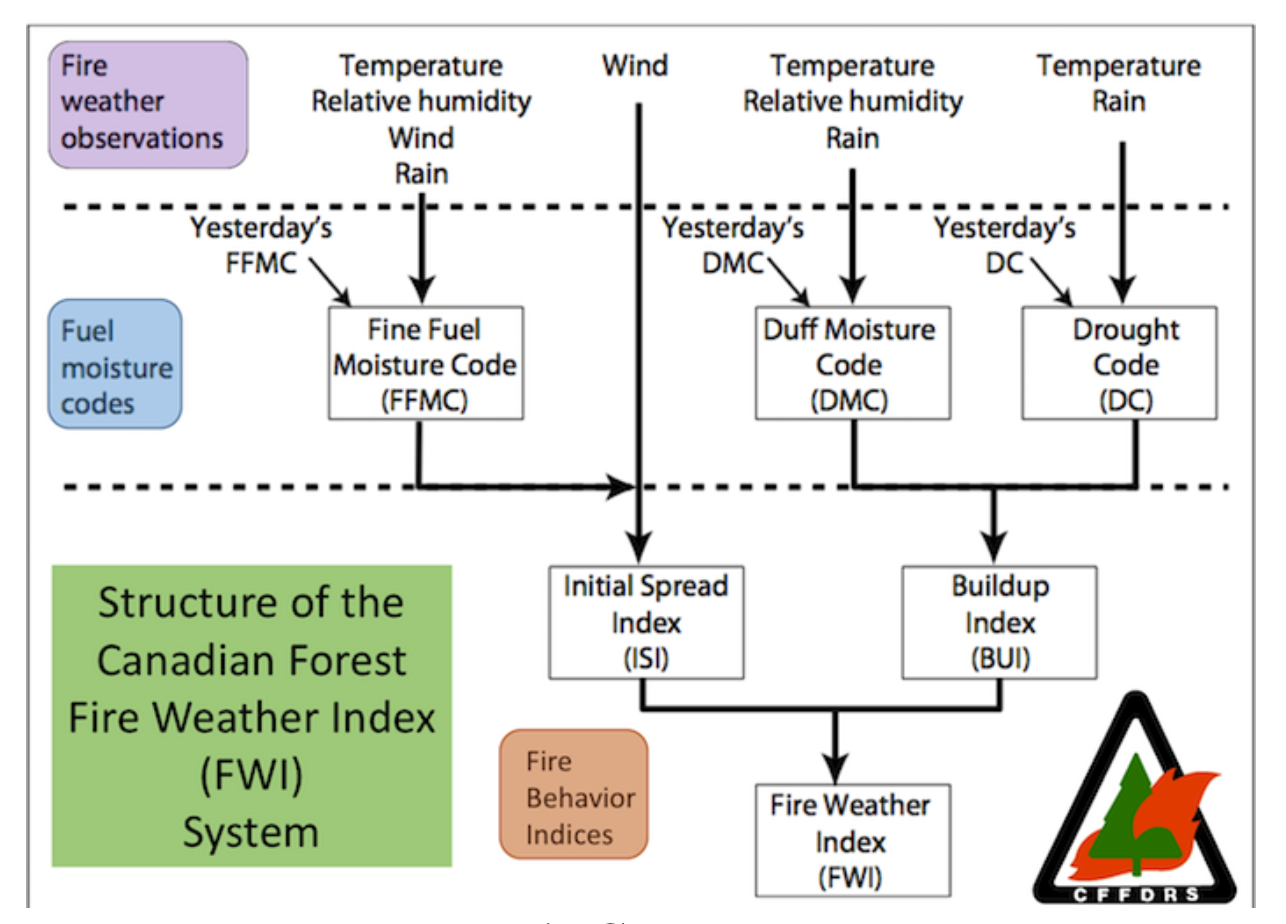

1) Взаимосвязь FFMC и ISI естественна - значения ISI вычисляются на основе FFMC. Ни один из них нельзя исключить из выборки, так как они характеризуют разные процессы (FFMC отражает способность топлива (древесины, напр.) к воспламенению, ISI - скорость распространения)

2) Взаимосвязь FFMC и temp также естественна: чем выше тепература, тем выше вероятность возгорания.

3) Взаимосвязь DMC и DC: DMC, помимо температуры и осадков, учитывает и относительную влажность воздуха (коэффициент корреляции при этом выше, чем в случае с DC). Оба параметра характеризуют похожие явления (содержание влаги в топливе), но на разных уровнях. DC отражает риск долговременного горения (по этой причине его можно считать значимым для случаев с большой площадью пожара), в то время как DMC подходит для оценки вероятности возникновения любого пожара (не только долговременного). Однако, коэффициент корреляции DC с area равен 0.12 и значимого влияния на итоговый результат не окажет. 

Итог: исключим параметр DC.

##  AREA PREDICT

Результаты:

Изначальный набор данных:


---------------------PCA--------------------------------

X  ->  0.4243791488830544
Y  ->  0.20185436360589007
FFMC  ->  0.092529042248299
DMC  ->  0.08448810187803613
DC  ->  0.06959421053129827
ISI  ->  0.04973437415975554
temp  ->  0.0338901809250796
RH  ->  0.021612018490784937
wind  ->  0.016021531801969635
rain  ->  0.005897027475832553

-------------------------------------------------

Train data set size :  (413, 8)
Test data set size :  (104, 8)

-------------------------------------------------

Linear Regression
Score: 0.008034543999207222
Mean Absolute Error: 24.198705894711175
R2 Score: 0.0006576927283136191
Mean Squared Error: 11780.009395280173

-------------------------------------------------

K-Neighbors Regressor
Score: -0.0026965927721573912
Mean Absolute Error: 26.083076923076927
R2 Score: -0.008273587541867355
Mean Squared Error: 11885.289202538457

-------------------------------------------------

Random Forest Regressor
Score: -0.005765706795449077
Mean Absol

Linear Regression  K-Neighbors Regressor  \
explained_variance_score           0.008035              -0.002697   
mean_absolute_error               24.198706              26.083077   
r2_score                           0.000658              -0.008274   
mean_squared_error             11780.009395           11885.289203   

                          RandomForest    ExtraTrees           SVR  
explained_variance_score     -0.005766     -0.006180      0.007268  
mean_absolute_error          25.787864     24.473860     21.514582  
r2_score                     -0.009398     -0.010621     -0.008870  
mean_squared_error        11898.541957  11912.955944  11892.320994

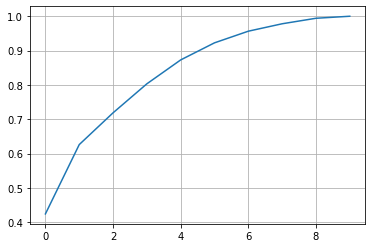

In [510]:
benchmark(data)

Слишком низкая точность. Попробуем преобразовать данные разными способавми: добавление дамми-переменных, удаление выбросов (хотя этого можно делать, так как ошибок при наблюдении не выявлено), удаление параметра rain (так как он везде одинаков, кроме 8 случаев, удаление параметра DC и, вместо удаления выбросов, логарифмирование их

Для начала удаление rain:


-----Delete rain-------------
     X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
3    8  6   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00
243  7  4   aug  sun  91.8  175.1  700.7  13.8  21.9  73   7.6   1.0   0.00
286  7  6   jul  wed  91.2  183.1  437.7  12.5  12.6  90   7.6   0.2   0.00
499  7  5   aug  tue  96.1  181.1  671.2  14.3  27.3  63   4.9   6.4  10.82
500  8  6   aug  tue  96.1  181.1  671.2  14.3  21.6  65   4.9   0.8   0.00
501  7  5   aug  tue  96.1  181.1  671.2  14.3  21.6  65   4.9   0.8   0.00
502  4  4   aug  tue  96.1  181.1  671.2  14.3  20.7  69   4.9   0.4   0.00
509  5  4   aug  fri  91.0  166.9  752.6   7.1  21.1  71   7.6   1.4   2.17

---------------------PCA--------------------------------

X  ->  0.42703264191026036
Y  ->  0.20309770238472585
FFMC  ->  0.09309691924795334
DMC  ->  0.0849472515774765
DC  ->  0.07003254054743908
ISI  ->  0.050048213558572294
temp  ->  0.0340976516330993
RH  ->  0.02171179521957421

Linear Regression  K-Neighbors Regressor  \
explained_variance_score           0.007949              -0.002697   
mean_absolute_error               24.202045              26.083077   
r2_score                           0.000568              -0.008274   
mean_squared_error             11781.070856           11885.289203   

                          RandomForest    ExtraTrees           SVR  
explained_variance_score      0.008996     -0.013365      0.000212  
mean_absolute_error          26.201999     24.709986     21.395901  
r2_score                      0.006336     -0.018570     -0.016988  
mean_squared_error        11713.077646  12006.666033  11988.015826

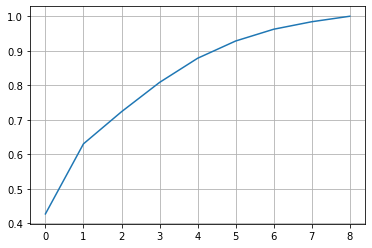

In [511]:
data_without_rain = generate_data(data, delete_rain=True)
benchmark(data_without_rain)

Удаление DC:


-----Delete DC-------------

---------------------PCA--------------------------------

X  ->  0.45591738782815866
Y  ->  0.18722537345636353
FFMC  ->  0.09106756886041736
DMC  ->  0.08430854817011492
ISI  ->  0.07284828233509079
temp  ->  0.048557497846838556
RH  ->  0.036427913391433725
wind  ->  0.017283024547898134
rain  ->  0.0063644035636844076

-------------------------------------------------

Train data set size :  (413, 7)
Test data set size :  (104, 7)

-------------------------------------------------

Linear Regression
Score: 0.010170928836970461
Mean Absolute Error: 24.075149363517067
R2 Score: 0.002941178267961919
Mean Squared Error: 11753.092210932718

-------------------------------------------------

K-Neighbors Regressor
Score: -0.03592592328224442
Mean Absolute Error: 28.612173076923078
R2 Score: -0.03939134369549557
Mean Squared Error: 12252.09790980769

-------------------------------------------------

Random Forest Regressor
Score: 0.017676876577117917
Mean Abso

Linear Regression  K-Neighbors Regressor  \
explained_variance_score           0.010171              -0.035926   
mean_absolute_error               24.075149              28.612173   
r2_score                           0.002941              -0.039391   
mean_squared_error             11753.092211           12252.097910   

                          RandomForest    ExtraTrees           SVR  
explained_variance_score      0.017677     -0.002987      0.000157  
mean_absolute_error          26.163554     24.262802     19.803117  
r2_score                      0.014346     -0.008707     -0.028563  
mean_squared_error        11618.653209  11890.400155  12124.458126

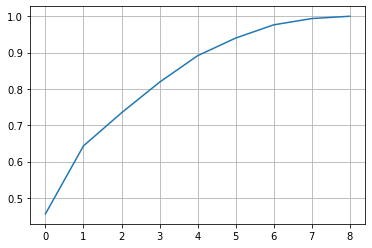

In [512]:
data_without_dc = generate_data(data, delete_DC=True)
benchmark(data_without_dc)

Удаление rain и DC:


-----Delete rain-------------
     X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
3    8  6   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00
243  7  4   aug  sun  91.8  175.1  700.7  13.8  21.9  73   7.6   1.0   0.00
286  7  6   jul  wed  91.2  183.1  437.7  12.5  12.6  90   7.6   0.2   0.00
499  7  5   aug  tue  96.1  181.1  671.2  14.3  27.3  63   4.9   6.4  10.82
500  8  6   aug  tue  96.1  181.1  671.2  14.3  21.6  65   4.9   0.8   0.00
501  7  5   aug  tue  96.1  181.1  671.2  14.3  21.6  65   4.9   0.8   0.00
502  4  4   aug  tue  96.1  181.1  671.2  14.3  20.7  69   4.9   0.4   0.00
509  5  4   aug  fri  91.0  166.9  752.6   7.1  21.1  71   7.6   1.4   2.17

-----Delete DC-------------

---------------------PCA--------------------------------

X  ->  0.458990299700997
Y  ->  0.18847222884195816
FFMC  ->  0.09159784672170465
DMC  ->  0.08485855243228968
ISI  ->  0.07334220809600125
temp  ->  0.048878879105646596
RH  ->  0.0366712094402305

Linear Regression  K-Neighbors Regressor  \
explained_variance_score           0.010075              -0.035926   
mean_absolute_error               24.086530              28.612173   
r2_score                           0.002841              -0.039391   
mean_squared_error             11754.276959           12252.097910   

                          RandomForest    ExtraTrees           SVR  
explained_variance_score      0.008501      0.002821      0.000197  
mean_absolute_error          26.413444     24.659178     19.761297  
r2_score                      0.005314     -0.002748     -0.028827  
mean_squared_error        11725.119222  11820.151084  12127.563739

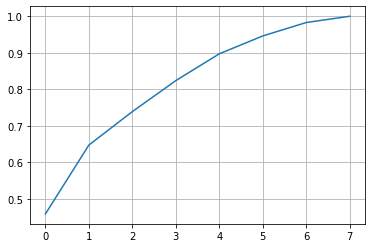

In [513]:
data_without_rain_dc = generate_data(data, delete_DC=True, delete_rain=True)
benchmark(data_without_rain_dc)

Удаление rain и DC, а также выбросов:


-----Delete rain-------------
     X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
3    8  6   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00
243  7  4   aug  sun  91.8  175.1  700.7  13.8  21.9  73   7.6   1.0   0.00
286  7  6   jul  wed  91.2  183.1  437.7  12.5  12.6  90   7.6   0.2   0.00
499  7  5   aug  tue  96.1  181.1  671.2  14.3  27.3  63   4.9   6.4  10.82
500  8  6   aug  tue  96.1  181.1  671.2  14.3  21.6  65   4.9   0.8   0.00
501  7  5   aug  tue  96.1  181.1  671.2  14.3  21.6  65   4.9   0.8   0.00
502  4  4   aug  tue  96.1  181.1  671.2  14.3  20.7  69   4.9   0.4   0.00
509  5  4   aug  fri  91.0  166.9  752.6   7.1  21.1  71   7.6   1.4   2.17

-----Delete DC-------------

-----Delete outliers-------------
FFMC = 88.2
ISI = 13.8
area = 25.262000000000043
FFMC:  77
ISI:  74
area:  52
FFMC = 88.2
ISI = 13.8
area = 25.262000000000043
FFMC:  77
ISI:  74
area:  52
Осталось записей:  327

---------------------PCA-----------------

Linear Regression  K-Neighbors Regressor  \
explained_variance_score          -0.015503              -0.265189   
mean_absolute_error                3.283295               3.730091   
r2_score                          -0.016158              -0.268056   
mean_squared_error                22.143468              27.632679   

                          RandomForest  ExtraTrees        SVR  
explained_variance_score     -0.334044   -0.609862   0.026187  
mean_absolute_error           3.839583    4.076404   2.803292  
r2_score                     -0.341438   -0.616805  -0.086284  
mean_squared_error           29.231771   35.232386  23.671622

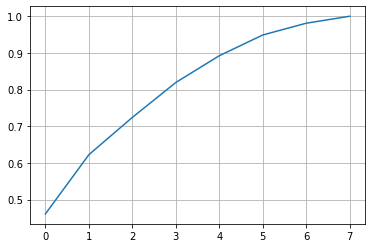

In [514]:
data_without_rain_dc_outliers = generate_data(data, delete_outliers=True, delete_rain=True, delete_DC=True)
benchmark(data_without_rain_dc_outliers)

Удаление выбросов и DC:


-----Delete DC-------------

-----Delete outliers-------------
FFMC = 88.2
ISI = 13.8
area = 25.262000000000043
FFMC:  77
ISI:  74
area:  52
FFMC = 88.2
ISI = 13.8
area = 25.262000000000043
FFMC:  77
ISI:  74
area:  52
Осталось записей:  327

---------------------PCA--------------------------------

X  ->  0.4603824246874522
Y  ->  0.161522877855166
FFMC  ->  0.10170125936207232
DMC  ->  0.09519083602027181
ISI  ->  0.072973812816999
temp  ->  0.056507379292660025
RH  ->  0.03207025731154515
wind  ->  0.01900242709437802
rain  ->  0.0006487255594553682

-------------------------------------------------

Train data set size :  (261, 7)
Test data set size :  (66, 7)

-------------------------------------------------

Linear Regression
Score: -0.02410701574002716
Mean Absolute Error: 3.3415824596829125
R2 Score: -0.02527297072232182
Mean Squared Error: 22.342099167821626

-------------------------------------------------

K-Neighbors Regressor
Score: -0.2651888645435565
Mean Absolute Err

Linear Regression  K-Neighbors Regressor  \
explained_variance_score          -0.024107              -0.265189   
mean_absolute_error                3.341582               3.730091   
r2_score                          -0.025273              -0.268056   
mean_squared_error                22.342099              27.632679   

                          RandomForest  ExtraTrees        SVR  
explained_variance_score     -0.254633   -0.610501   0.000126  
mean_absolute_error           3.827782    4.151978   2.862150  
r2_score                     -0.262800   -0.617205  -0.118551  
mean_squared_error           27.518138   35.241111  24.374750

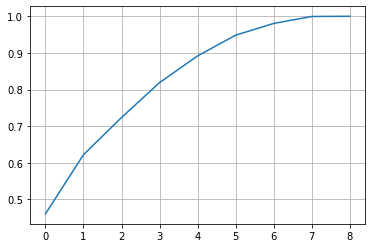

In [515]:
data_without_dc_outliers = generate_data(data, delete_outliers=True, delete_DC=True)
benchmark(data_without_dc_outliers)

Удаление выбросов и rain


-----Delete rain-------------
     X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
3    8  6   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00
243  7  4   aug  sun  91.8  175.1  700.7  13.8  21.9  73   7.6   1.0   0.00
286  7  6   jul  wed  91.2  183.1  437.7  12.5  12.6  90   7.6   0.2   0.00
499  7  5   aug  tue  96.1  181.1  671.2  14.3  27.3  63   4.9   6.4  10.82
500  8  6   aug  tue  96.1  181.1  671.2  14.3  21.6  65   4.9   0.8   0.00
501  7  5   aug  tue  96.1  181.1  671.2  14.3  21.6  65   4.9   0.8   0.00
502  4  4   aug  tue  96.1  181.1  671.2  14.3  20.7  69   4.9   0.4   0.00
509  5  4   aug  fri  91.0  166.9  752.6   7.1  21.1  71   7.6   1.4   2.17

-----Delete outliers-------------
FFMC = 88.2
ISI = 13.8
area = 25.262000000000043
FFMC:  77
ISI:  74
area:  52
FFMC = 88.2
ISI = 13.8
area = 25.262000000000043
FFMC:  77
ISI:  74
area:  52
Осталось записей:  327

---------------------PCA--------------------------------

X  ->  0.428

Linear Regression  K-Neighbors Regressor  \
explained_variance_score          -0.047739              -0.193841   
mean_absolute_error                3.254292               3.537727   
r2_score                          -0.050808              -0.193876   
mean_squared_error                22.898552              26.016193   

                          RandomForest  ExtraTrees        SVR  
explained_variance_score     -0.325637   -0.547998  -0.396747  
mean_absolute_error           3.872748    3.977126   5.005148  
r2_score                     -0.327730   -0.550651  -0.813705  
mean_squared_error           28.933047   33.790797  39.523116

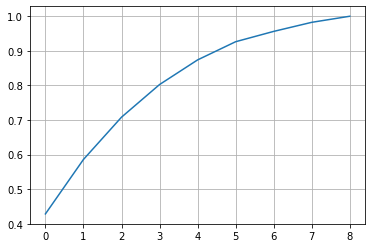

In [519]:
data_without_rain_outliers = generate_data(data, delete_outliers=True, delete_rain=True)
benchmark(data_without_rain_outliers)

Удаление только выбросов:


-----Delete outliers-------------
FFMC = 88.2
ISI = 13.8
area = 25.262000000000043
FFMC:  77
ISI:  74
area:  52
FFMC = 88.2
ISI = 13.8
area = 25.262000000000043
FFMC:  77
ISI:  74
area:  52
Осталось записей:  327

---------------------PCA--------------------------------

X  ->  0.4280854041544091
Y  ->  0.15740484238525856
FFMC  ->  0.12218010972654739
DMC  ->  0.09431750015441769
DC  ->  0.0712278539946901
ISI  ->  0.05255491365042728
temp  ->  0.029818372819213367
RH  ->  0.026197562543971757
wind  ->  0.01761163041607789
rain  ->  0.0006018101549868654

-------------------------------------------------

Train data set size :  (261, 8)
Test data set size :  (66, 8)

-------------------------------------------------

Linear Regression
Score: -0.05237738530153346
Mean Absolute Error: 3.3060450324621367
R2 Score: -0.05630649888682071
Mean Squared Error: 23.018362156877252

-------------------------------------------------

K-Neighbors Regressor
Score: -0.19384119119743626
Mean Absolute

Linear Regression  K-Neighbors Regressor  \
explained_variance_score          -0.052377              -0.193841   
mean_absolute_error                3.306045               3.537727   
r2_score                          -0.056306              -0.193876   
mean_squared_error                23.018362              26.016193   

                          RandomForest  ExtraTrees         SVR  
explained_variance_score     -0.317588   -0.578488   -6.219049  
mean_absolute_error           3.898282    4.106188    5.748103  
r2_score                     -0.324758   -0.583055   -6.554157  
mean_squared_error           28.868294   34.496923  164.615412

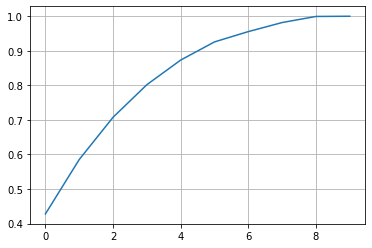

In [520]:
data_without_outliers = generate_data(data, delete_outliers=True)
benchmark(data_without_outliers)

Удаление rain и оптимизация выбросов


-----Delete rain-------------
     X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
3    8  6   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00
243  7  4   aug  sun  91.8  175.1  700.7  13.8  21.9  73   7.6   1.0   0.00
286  7  6   jul  wed  91.2  183.1  437.7  12.5  12.6  90   7.6   0.2   0.00
499  7  5   aug  tue  96.1  181.1  671.2  14.3  27.3  63   4.9   6.4  10.82
500  8  6   aug  tue  96.1  181.1  671.2  14.3  21.6  65   4.9   0.8   0.00
501  7  5   aug  tue  96.1  181.1  671.2  14.3  21.6  65   4.9   0.8   0.00
502  4  4   aug  tue  96.1  181.1  671.2  14.3  20.7  69   4.9   0.4   0.00
509  5  4   aug  fri  91.0  166.9  752.6   7.1  21.1  71   7.6   1.4   2.17

-----Optimizing data-------------

---------------------PCA--------------------------------

X  ->  0.42697510320132076
Y  ->  0.20665146889901115
FFMC  ->  0.09402387111434474
DMC  ->  0.08515601734738112
DC  ->  0.07002095181067723
ISI  ->  0.05269958759635826
temp  ->  0.027342594

Linear Regression  K-Neighbors Regressor  \
explained_variance_score           0.015789              -0.023680   
mean_absolute_error                1.181912               1.153465   
r2_score                           0.014486              -0.032622   
mean_squared_error                 2.166023               2.269559   

                          RandomForest  ExtraTrees       SVR  
explained_variance_score     -0.036232   -0.140987 -1.774090  
mean_absolute_error           1.202271    1.243562  2.045685  
r2_score                     -0.036234   -0.141003 -1.776935  
mean_squared_error            2.277500    2.507767  6.103320

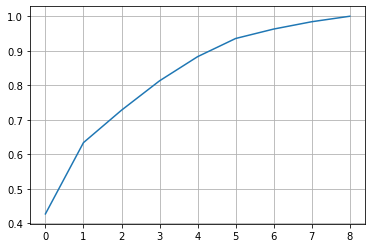

In [521]:
data_without_rain_optimized = generate_data(data, optimizing_data=True, delete_rain=True)
benchmark(data_without_rain_optimized)

Удаление rain, DC и оптимизация


-----Delete rain-------------
     X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
3    8  6   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00
243  7  4   aug  sun  91.8  175.1  700.7  13.8  21.9  73   7.6   1.0   0.00
286  7  6   jul  wed  91.2  183.1  437.7  12.5  12.6  90   7.6   0.2   0.00
499  7  5   aug  tue  96.1  181.1  671.2  14.3  27.3  63   4.9   6.4  10.82
500  8  6   aug  tue  96.1  181.1  671.2  14.3  21.6  65   4.9   0.8   0.00
501  7  5   aug  tue  96.1  181.1  671.2  14.3  21.6  65   4.9   0.8   0.00
502  4  4   aug  tue  96.1  181.1  671.2  14.3  20.7  69   4.9   0.4   0.00
509  5  4   aug  fri  91.0  166.9  752.6   7.1  21.1  71   7.6   1.4   2.17

-----Delete DC-------------

-----Optimizing data-------------

---------------------PCA--------------------------------

X  ->  0.4589335485000753
Y  ->  0.1925070559666344
FFMC  ->  0.09178893466464676
DMC  ->  0.08545135539932577
ISI  ->  0.07328466951387116
temp  ->  0.0531400242

Linear Regression  K-Neighbors Regressor  \
explained_variance_score           0.012829              -0.122580   
mean_absolute_error                1.183507               1.239304   
r2_score                           0.011501              -0.127382   
mean_squared_error                 2.172585               2.477831   

                          RandomForest  ExtraTrees       SVR  
explained_variance_score     -0.060729   -0.142362  0.018674  
mean_absolute_error           1.237471    1.257658  1.128020  
r2_score                     -0.061485   -0.142573 -0.090724  
mean_squared_error            2.332998    2.511217  2.397260

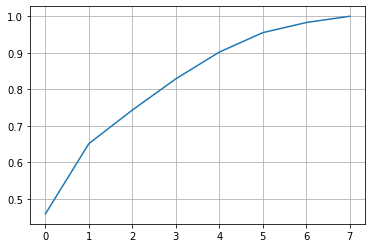

In [522]:
data_without_rain_DC_optimized = generate_data(data, optimizing_data=True, delete_rain=True, delete_DC=True)
benchmark(data_without_rain_DC_optimized)

Удаление DC и оптимизация


-----Delete DC-------------

-----Optimizing data-------------

---------------------PCA--------------------------------

X  ->  0.4558611171296668
Y  ->  0.1912290542002975
FFMC  ->  0.0912419700687791
DMC  ->  0.08490115092924311
ISI  ->  0.0727913776531864
temp  ->  0.05280304334300328
RH  ->  0.027568915550372757
wind  ->  0.017227470430431855
rain  ->  0.006375900695019151

-------------------------------------------------

Train data set size :  (413, 7)
Test data set size :  (104, 7)

-------------------------------------------------

Linear Regression
Score: 0.010863694879828856
Mean Absolute Error: 1.1858247671429896
R2 Score: 0.009532207116563107
Mean Squared Error: 2.176911100691608

-------------------------------------------------

K-Neighbors Regressor
Score: -0.12258042854325857
Mean Absolute Error: 1.2393041582714146
R2 Score: -0.1273824478650165
Mean Squared Error: 2.4778305595758594

-------------------------------------------------

Random Forest Regressor
Score: -0

Linear Regression  K-Neighbors Regressor  \
explained_variance_score           0.010864              -0.122580   
mean_absolute_error                1.185825               1.239304   
r2_score                           0.009532              -0.127382   
mean_squared_error                 2.176911               2.477831   

                          RandomForest  ExtraTrees       SVR  
explained_variance_score     -0.049501   -0.106225 -0.040128  
mean_absolute_error           1.236245    1.237739  1.149643  
r2_score                     -0.052744   -0.106231 -0.155026  
mean_squared_error            2.313786    2.431343  2.538587

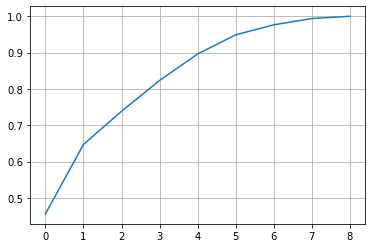

In [523]:
data_without_DC_optimized = generate_data(data, optimizing_data=True, delete_DC=True)
benchmark(data_without_DC_optimized)

Оптимизация выбросов


-----Optimizing data-------------

---------------------PCA--------------------------------

X  ->  0.42432206669725614
Y  ->  0.2053826256480391
FFMC  ->  0.09345105878961818
DMC  ->  0.08468604409410345
DC  ->  0.06958234069852837
ISI  ->  0.0523730485886183
temp  ->  0.02721496850746213
RH  ->  0.021107851567403833
wind  ->  0.01597088266718498
rain  ->  0.0059091127417854

-------------------------------------------------

Train data set size :  (413, 8)
Test data set size :  (104, 8)

-------------------------------------------------

Linear Regression
Score: 0.014054859635820205
Mean Absolute Error: 1.1840264412936123
R2 Score: 0.012752001706876959
Mean Squared Error: 2.169834437890493

-------------------------------------------------

K-Neighbors Regressor
Score: -0.023679503251550882
Mean Absolute Error: 1.1534651885758396
R2 Score: -0.032621529686241324
Mean Squared Error: 2.26955917894412

-------------------------------------------------

Random Forest Regressor
Score: -0.

Linear Regression  K-Neighbors Regressor  \
explained_variance_score           0.014055              -0.023680   
mean_absolute_error                1.184026               1.153465   
r2_score                           0.012752              -0.032622   
mean_squared_error                 2.169834               2.269559   

                          RandomForest  ExtraTrees        SVR  
explained_variance_score     -0.000373   -0.084612  -5.466827  
mean_absolute_error           1.191648    1.188998   2.846546  
r2_score                     -0.000512   -0.085624  -5.561340  
mean_squared_error            2.198987    2.386050  14.420917

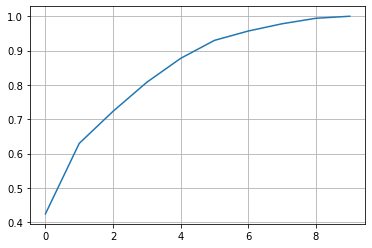

In [524]:
data_without_optimized = generate_data(data, optimizing_data=True)
benchmark(data_without_optimized)

Оптимизация выбросов с дамми переменными 


-----Optimizing data-------------

-----Make dummy data-------------
X  ->  0.38497121387945643
Y  ->  0.1911448299339515
FFMC  ->  0.08729383711162303
DMC  ->  0.07782072577480231
DC  ->  0.06380853922168866
ISI  ->  0.04799625241181639
temp  ->  0.03276208918963538
RH  ->  0.022624344076184372
wind  ->  0.01535093513490439
rain  ->  0.012210222314548297
day_mon  ->  0.010909200832582244
day_sat  ->  0.009522394696388051
day_sun  ->  0.008427024679529611
day_thu  ->  0.0075205842785527844
day_tue  ->  0.006811292598073301
day_wed  ->  0.0052931362330031866
month_aug  ->  0.00453013780113861
month_dec  ->  0.0035159042290178574
month_feb  ->  0.0024108559183503415
month_jan  ->  0.0017647207172879966
month_jul  ->  0.0013629664936113596
month_jun  ->  0.0007919895769823382
month_mar  ->  0.0006103879926166512
month_may  ->  0.00022495830266086052
month_nov  ->  0.00014406313512430751
month_oct  ->  0.00012011126873061078
month_sep  ->  5.728219773894893e-05

--------------------------

Linear Regression  K-Neighbors Regressor  \
explained_variance_score          -0.058832              -0.023680   
mean_absolute_error                1.214896               1.153465   
r2_score                          -0.060101              -0.032622   
mean_squared_error                 2.329955               2.269559   

                          RandomForest  ExtraTrees        SVR  
explained_variance_score     -0.014610   -0.131552 -12.205302  
mean_absolute_error           1.186280    1.205503   4.258379  
r2_score                     -0.015140   -0.134699 -13.505895  
mean_squared_error            2.231137    2.493912  31.881949

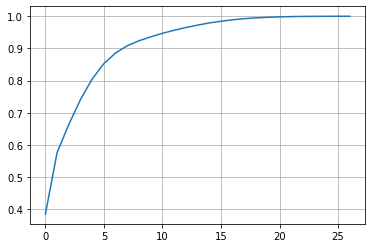

In [564]:
data_without_optimized_dummy = generate_data(data, optimizing_data=True, dummy=True)
benchmark2(data_without_optimized_dummy)

Оптимизация, удаление rain, DC и дамми-переменные

In [38]:
data_frame = generate_data(data, optimizing_data=True, dummy=True, delete_rain=True, delete_DC=True)
data_frame.describe()
# benchmark2(data_frame)


-----Delete rain-------------
     X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
3    8  6   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00
243  7  4   aug  sun  91.8  175.1  700.7  13.8  21.9  73   7.6   1.0   0.00
286  7  6   jul  wed  91.2  183.1  437.7  12.5  12.6  90   7.6   0.2   0.00
499  7  5   aug  tue  96.1  181.1  671.2  14.3  27.3  63   4.9   6.4  10.82
500  8  6   aug  tue  96.1  181.1  671.2  14.3  21.6  65   4.9   0.8   0.00
501  7  5   aug  tue  96.1  181.1  671.2  14.3  21.6  65   4.9   0.8   0.00
502  4  4   aug  tue  96.1  181.1  671.2  14.3  20.7  69   4.9   0.4   0.00
509  5  4   aug  fri  91.0  166.9  752.6   7.1  21.1  71   7.6   1.4   2.17

-----Delete DC-------------

-----Optimizing data-------------

-----Make dummy data-------------


X           Y        FFMC         DMC         ISI        temp  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     4.669246    4.299807    4.515021  110.872340    2.204023   18.889168   
std      2.313778    1.229900    0.088019   64.046482    0.474845    5.806625   
min      1.000000    2.000000    2.980619    1.100000    0.000000    2.200000   
25%      3.000000    4.000000    4.513055   68.600000    2.014903   15.500000   
50%      4.000000    4.000000    4.528289  108.300000    2.240710   19.300000   
75%      7.000000    5.000000    4.542230  142.400000    2.468100   22.800000   
max      9.000000    9.000000    4.576771  291.300000    4.044804   33.300000   

               RH        wind        area     day_mon     day_sat     day_sun  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean    44.288201    4.017602    1.111026    0.143133    0.162476    0.183752   
std     16.317469    1.791653    1.398436    0.350548    0.369244    0.387657   
min     15.000000    0.400000    0.000000    0.000000    0.000000    0.000000   
25%     33.000000    2.700000    0.000000    0.000000    0.000000    0.000000   
50%     42.000000    4.000000    0.418710    0.000000    0.000000    0.000000   
75%     53.000000    4.900000    2.024193    0.000000    0.000000    0.000000   
max    100.000000    9.400000    6.995620    1.000000    1.000000    1.000000   

          day_thu     day_tue     day_wed   month_aug   month_dec   month_feb  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     0.117988    0.123791    0.104449    0.355899    0.017408    0.038685   
std      0.322907    0.329662    0.306138    0.479249    0.130913    0.193029   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    1.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        month_jan   month_jul   month_jun   month_mar   month_may   month_nov  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     0.003868    0.061896    0.032882    0.104449    0.003868    0.001934   
std      0.062137    0.241199    0.178500    0.306138    0.062137    0.043980   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        month_oct   month_sep  
count  517.000000  517.000000  
mean     0.029014    0.332689  
std      0.168007    0.471632  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    0.000000  
75%      0.000000    1.000000  
max      1.000000    1.000000

In [25]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   X          517 non-null    int64  
 1   Y          517 non-null    int64  
 2   FFMC       517 non-null    float64
 3   DMC        517 non-null    float64
 4   ISI        517 non-null    float64
 5   temp       517 non-null    float64
 6   RH         517 non-null    int64  
 7   wind       517 non-null    float64
 8   area       517 non-null    float64
 9   day_mon    517 non-null    uint8  
 10  day_sat    517 non-null    uint8  
 11  day_sun    517 non-null    uint8  
 12  day_thu    517 non-null    uint8  
 13  day_tue    517 non-null    uint8  
 14  day_wed    517 non-null    uint8  
 15  month_aug  517 non-null    uint8  
 16  month_dec  517 non-null    uint8  
 17  month_feb  517 non-null    uint8  
 18  month_jan  517 non-null    uint8  
 19  month_jul  517 non-null    uint8  
 20  month_jun 

## Кластеризация

Проведем кластеризацию с целью лучшего понимания набора

In [39]:
from sklearn.cluster import KMeans
clusters_number_min = 2
clusters_number_max = 5
clusters_results = []

In [40]:
for clusters_number in range(clusters_number_min, clusters_number_max+1):
    new_df = data_frame.copy()
    km = KMeans(n_clusters=clusters_number)
    km.fit(new_df)
    clusters = km.predict(new_df)
    new_df["cluster"] = clusters
    clusters_results.append([clusters_number, new_df])

<ipython-input-42-32652e9e2342>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=plotsize)


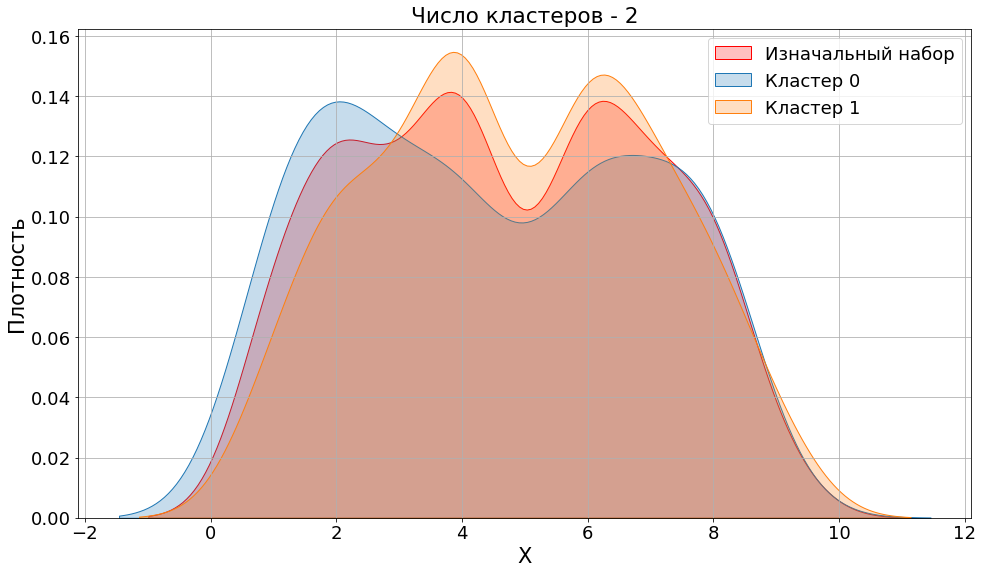

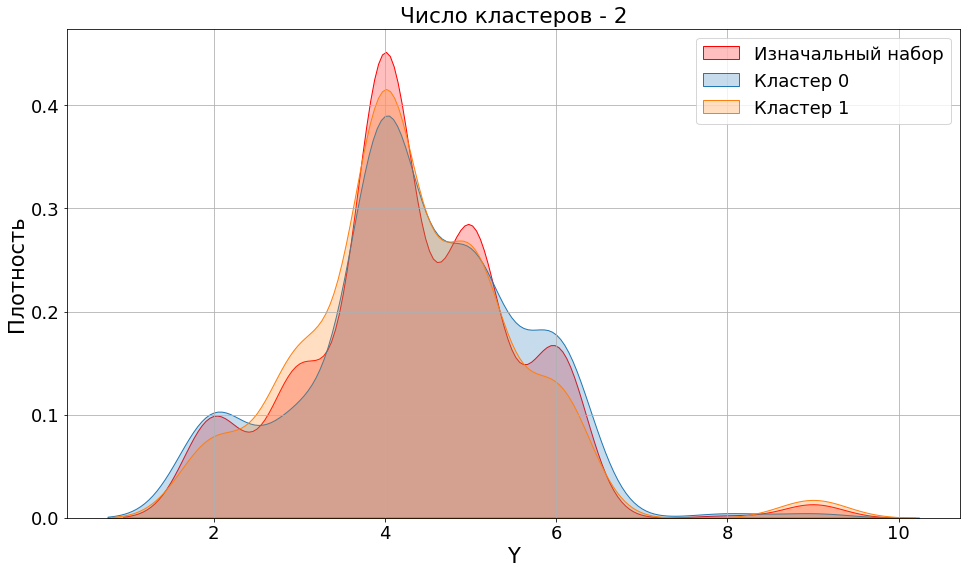

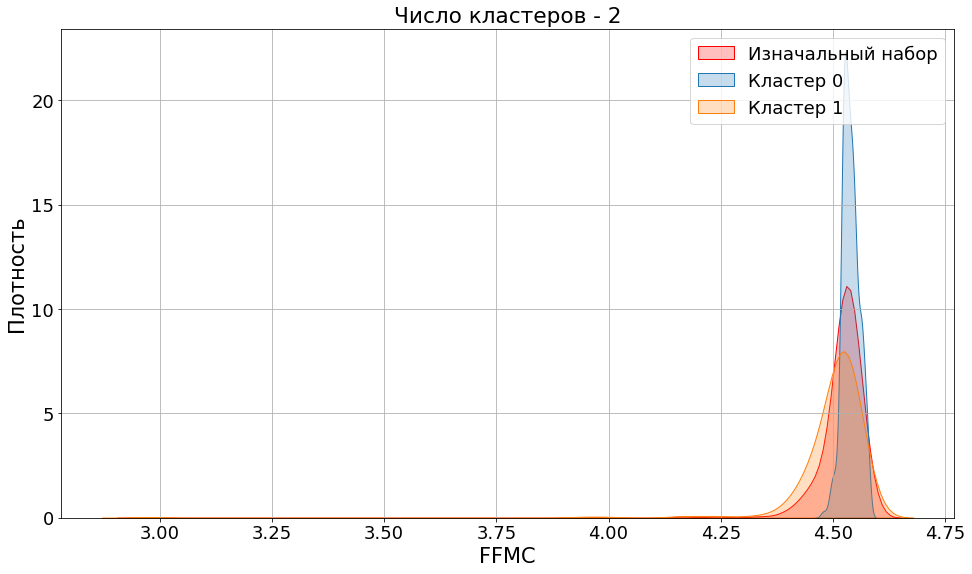

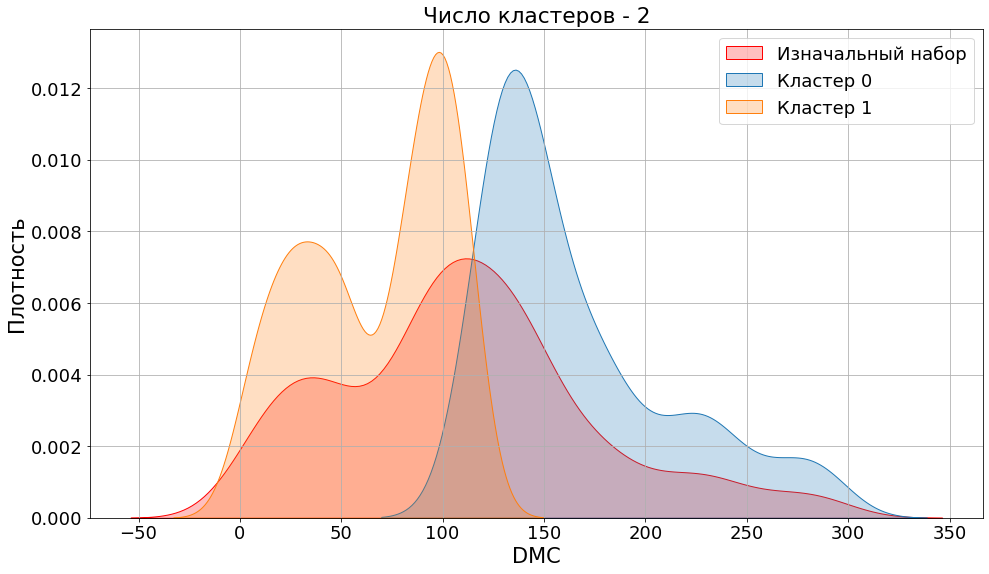

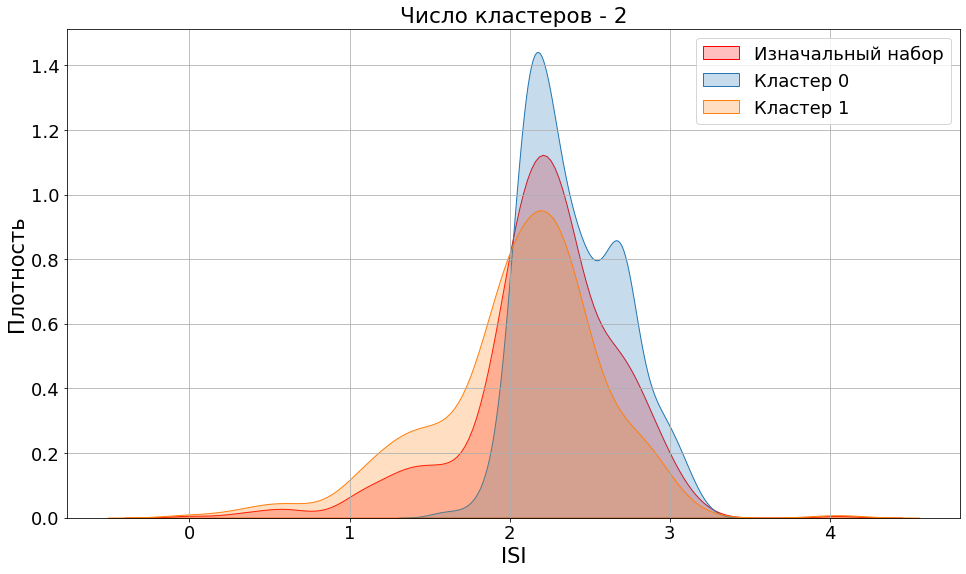

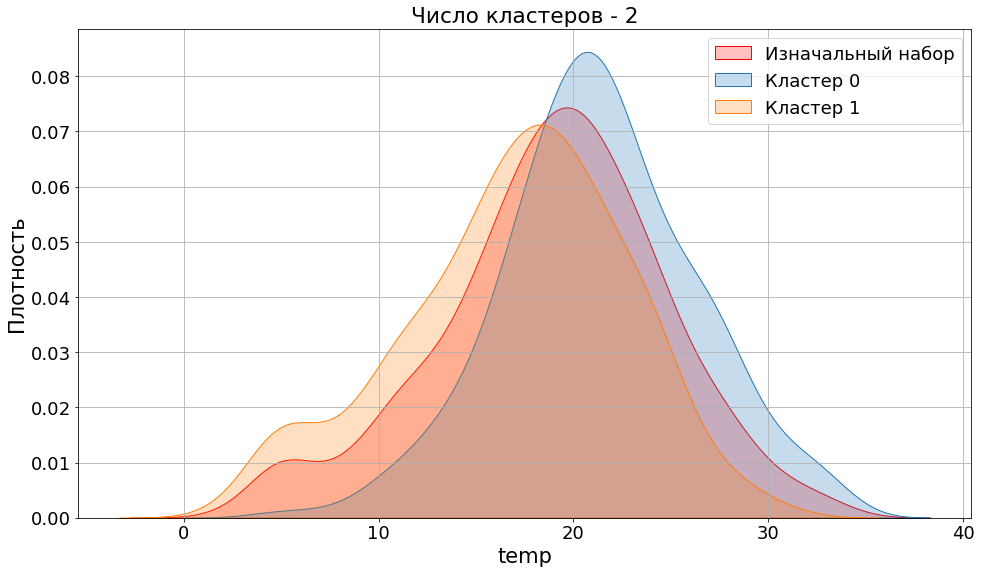

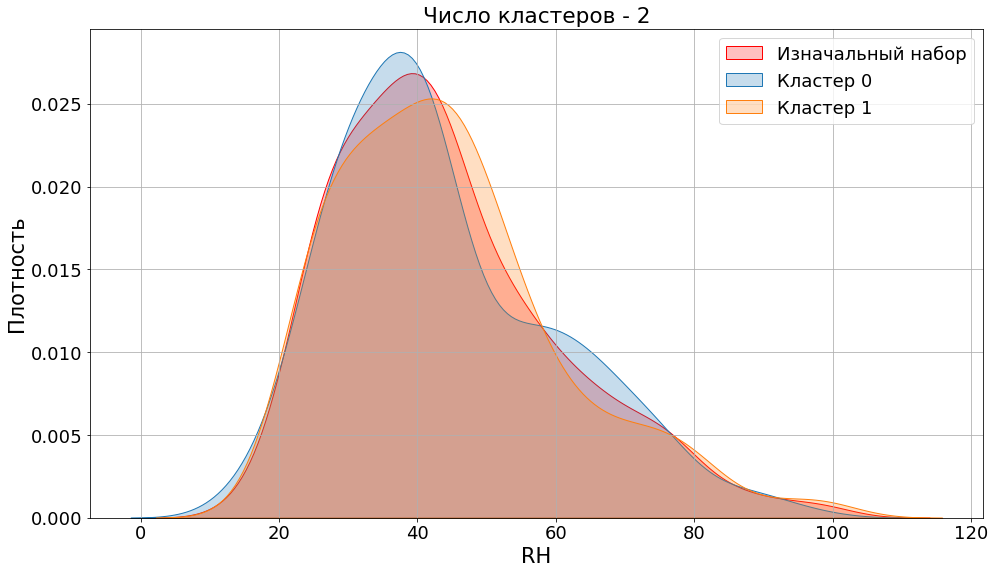

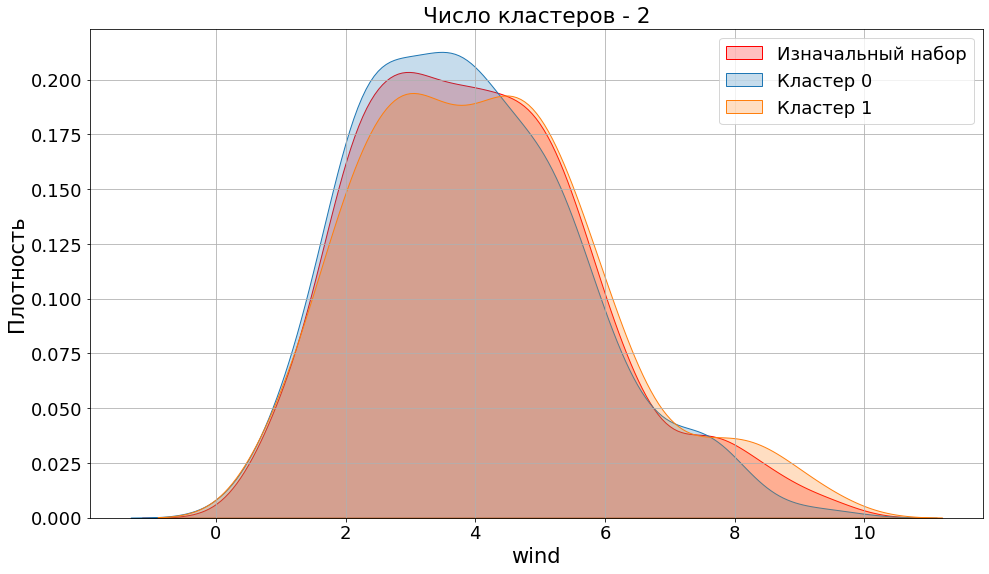

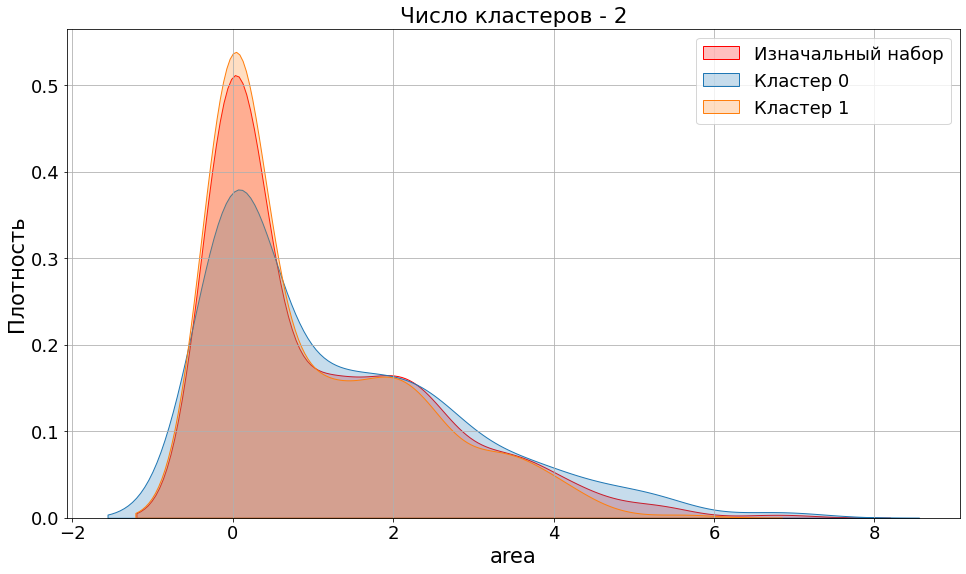

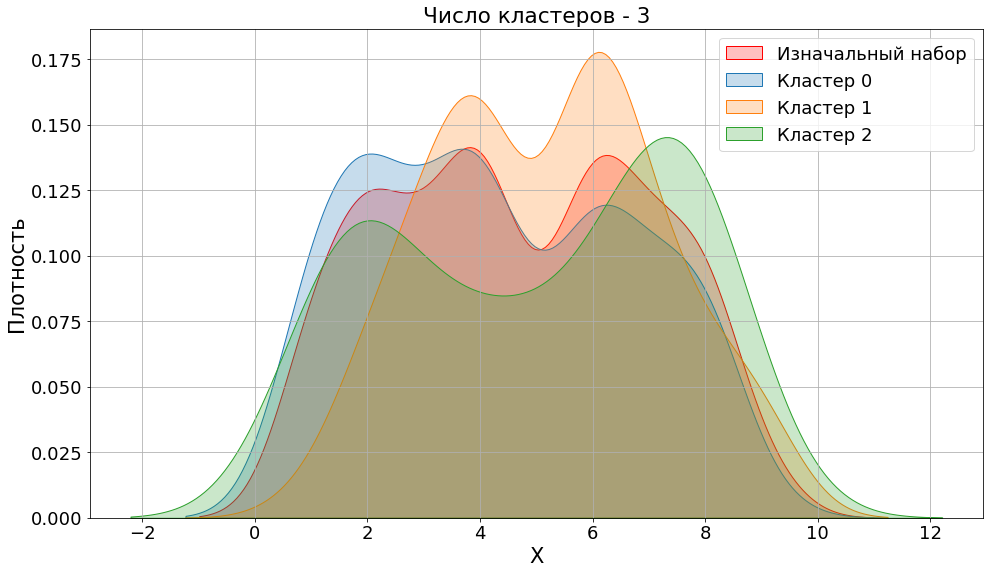

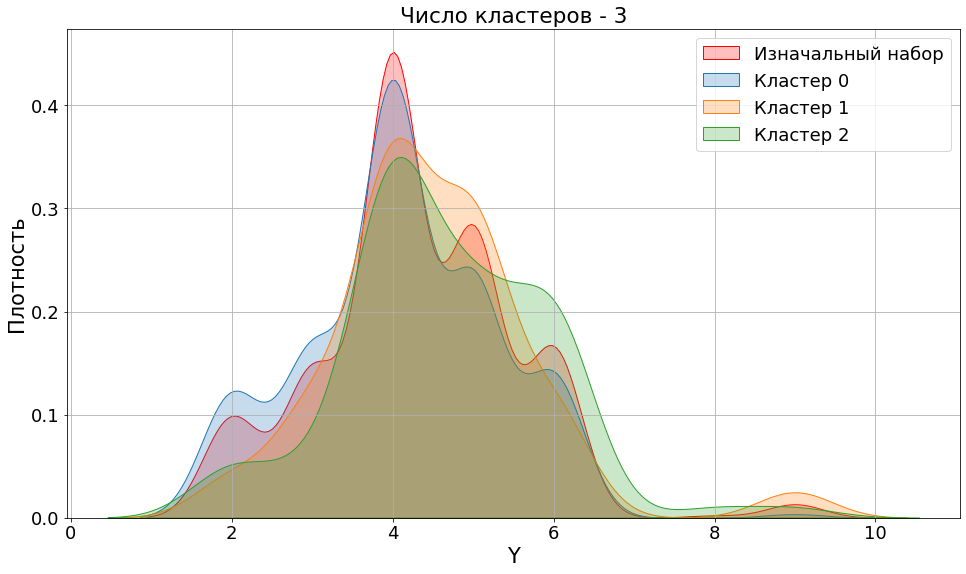

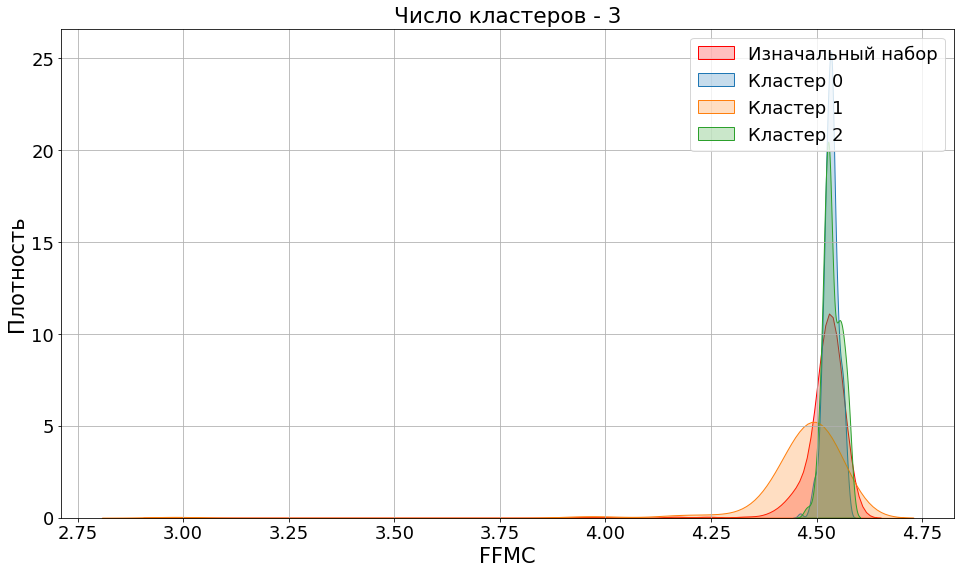

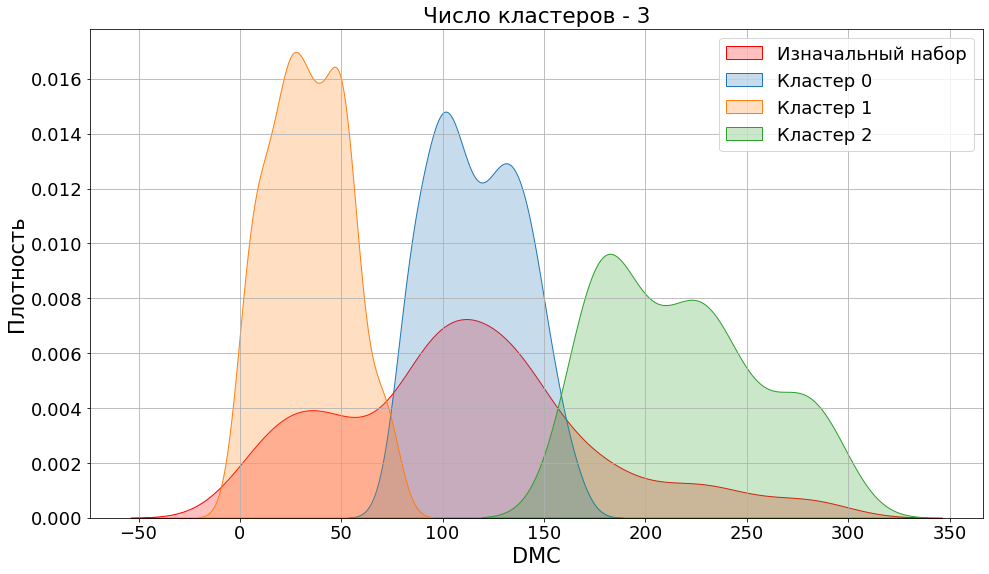

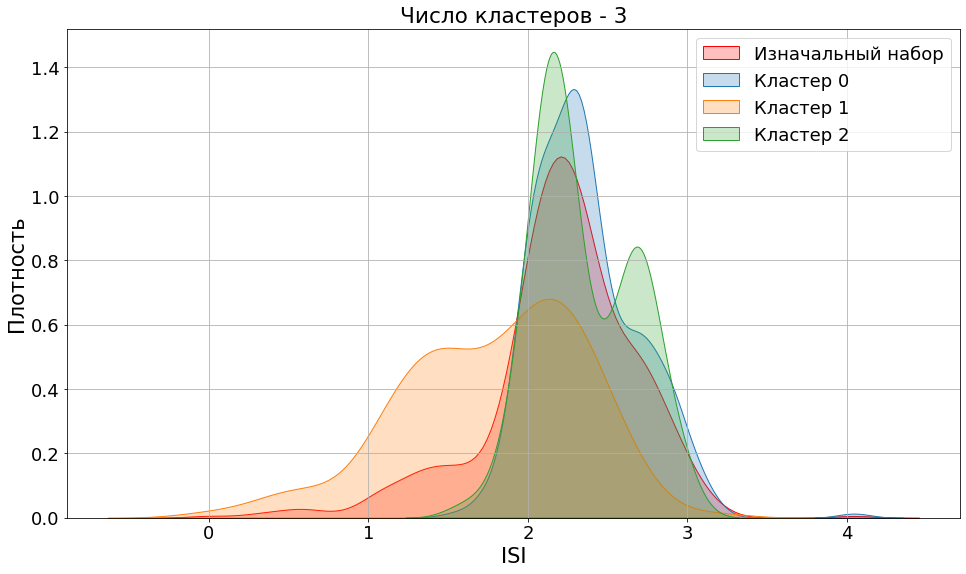

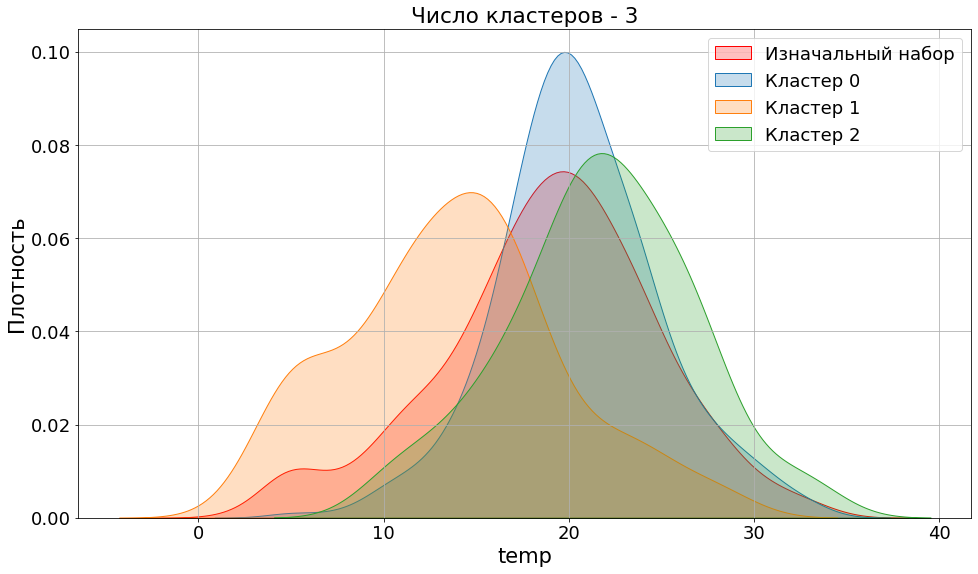

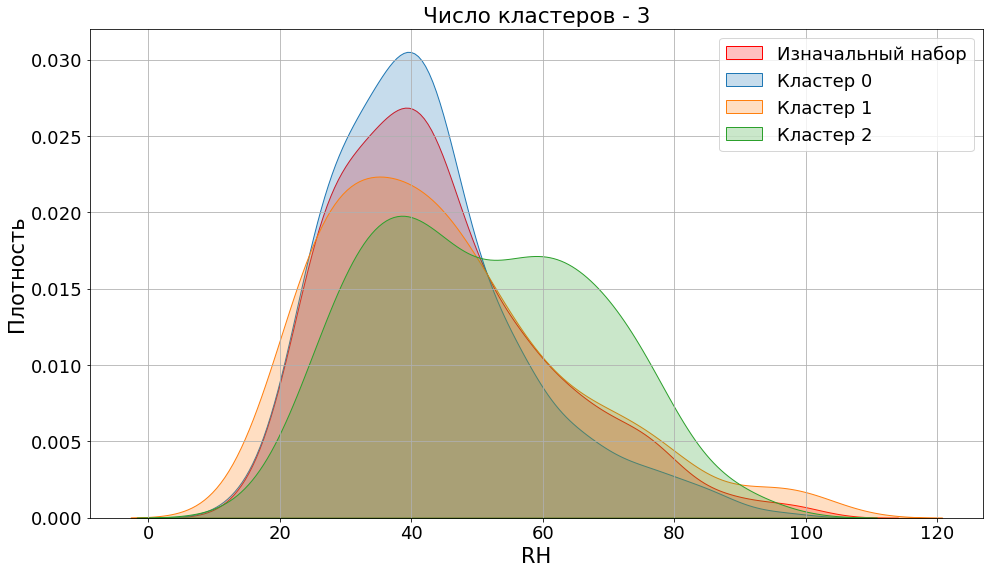

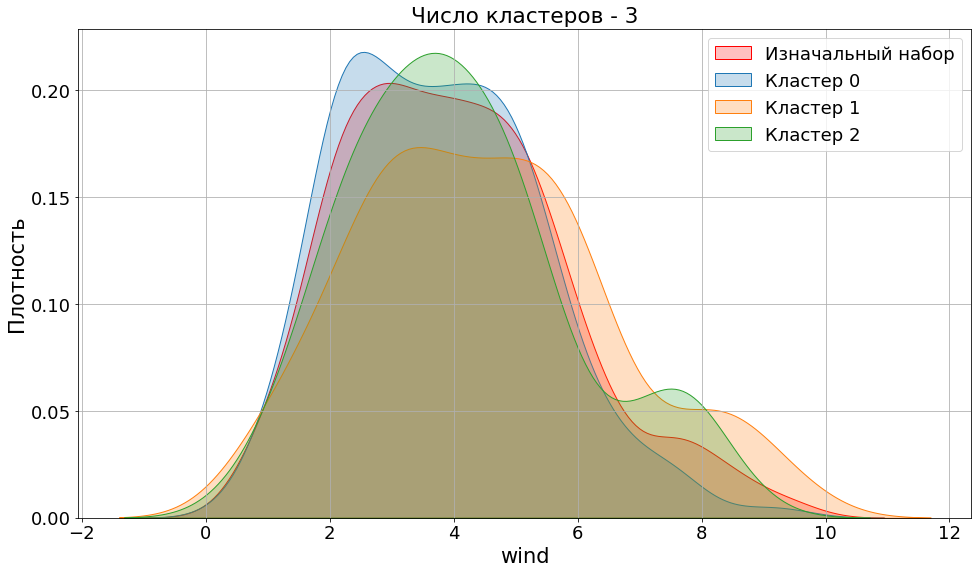

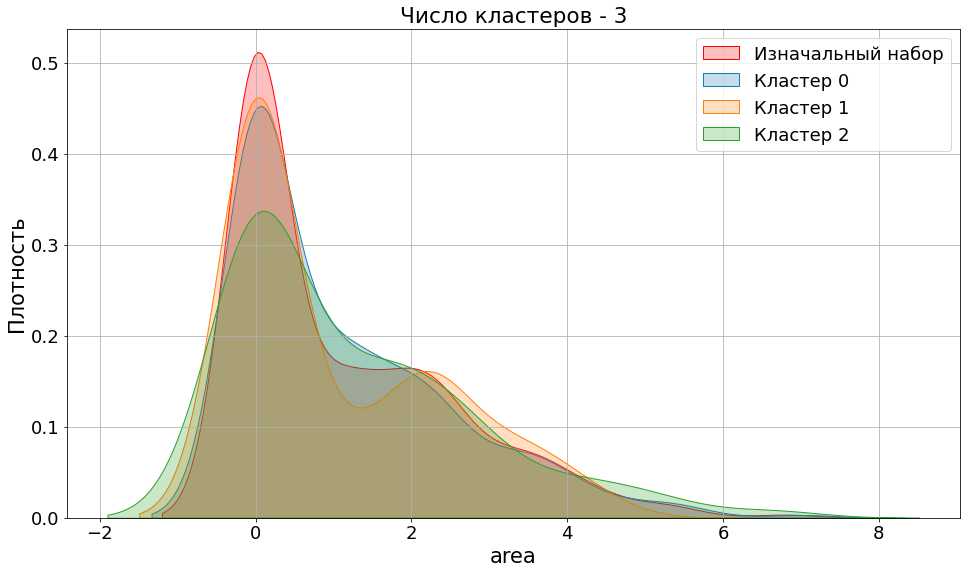

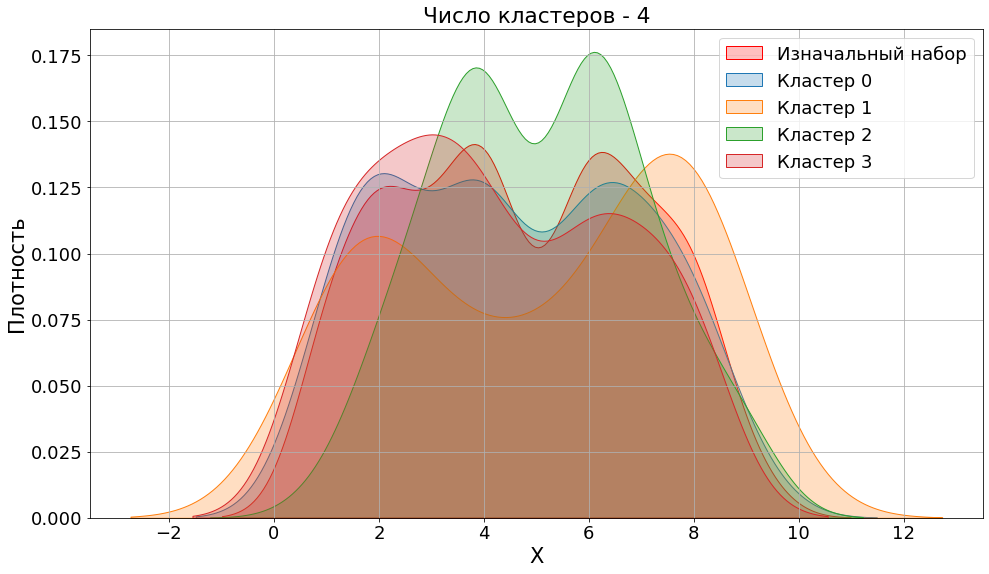

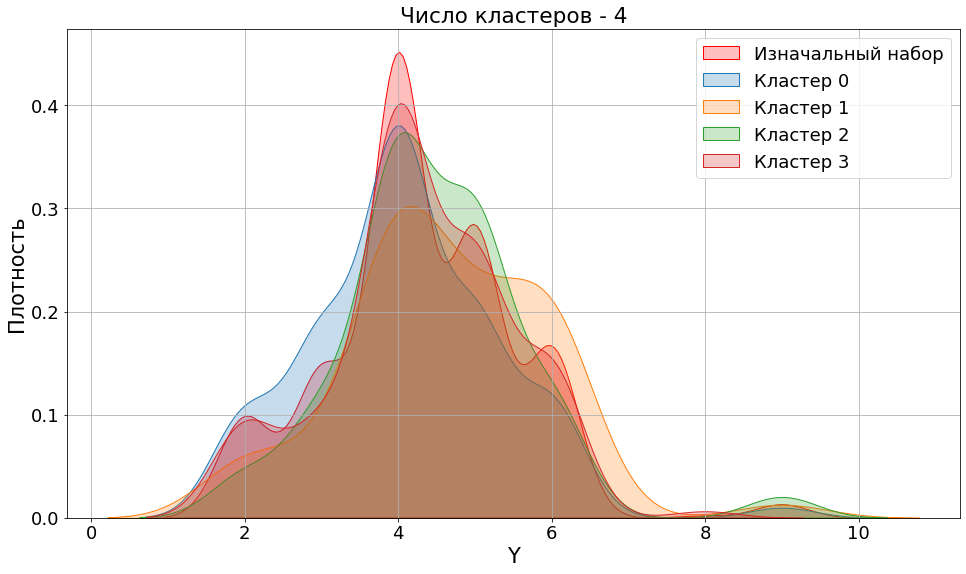

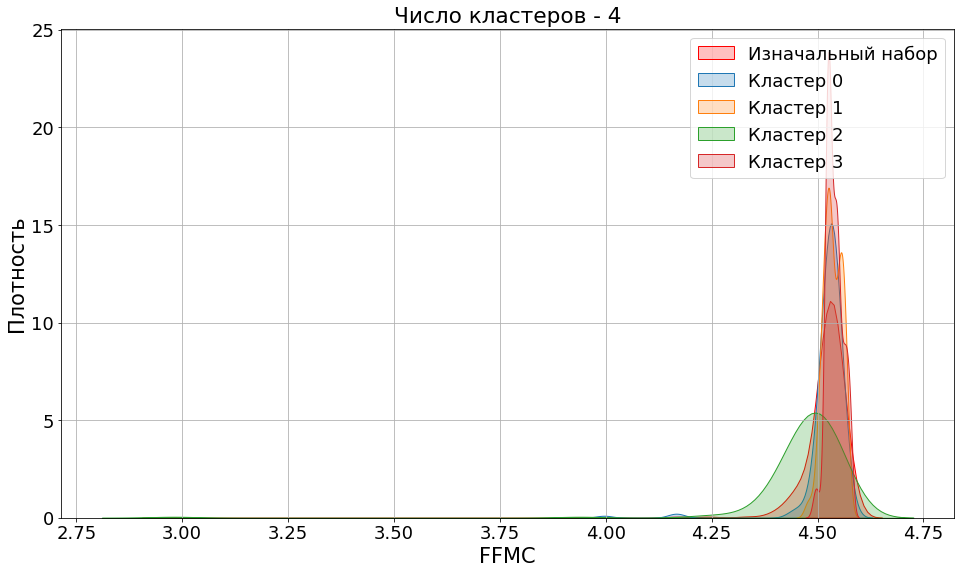

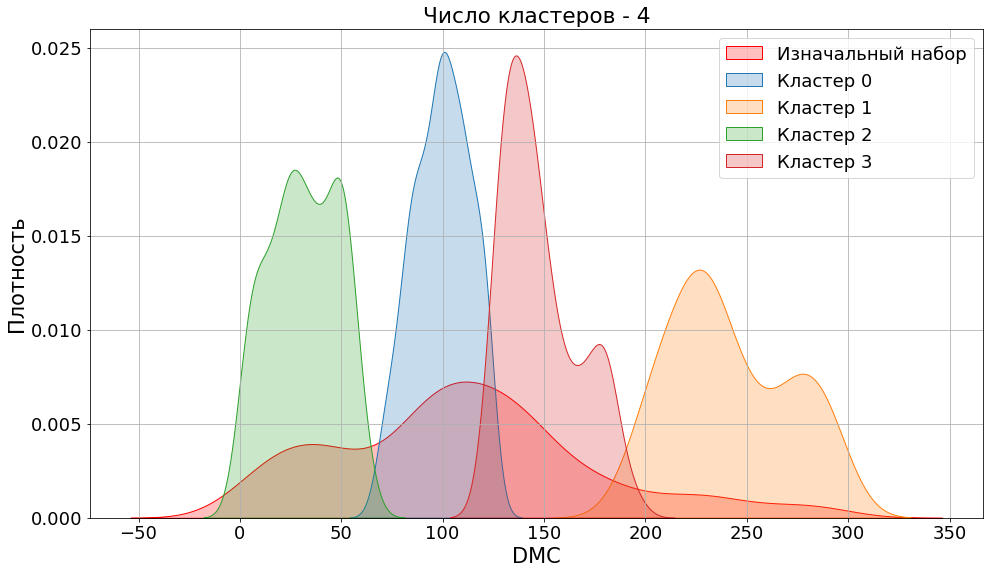

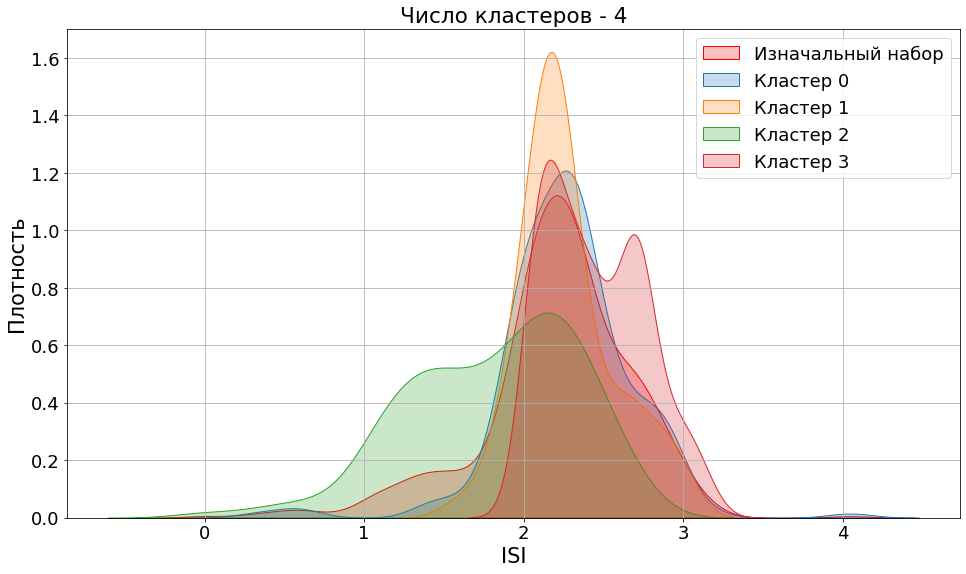

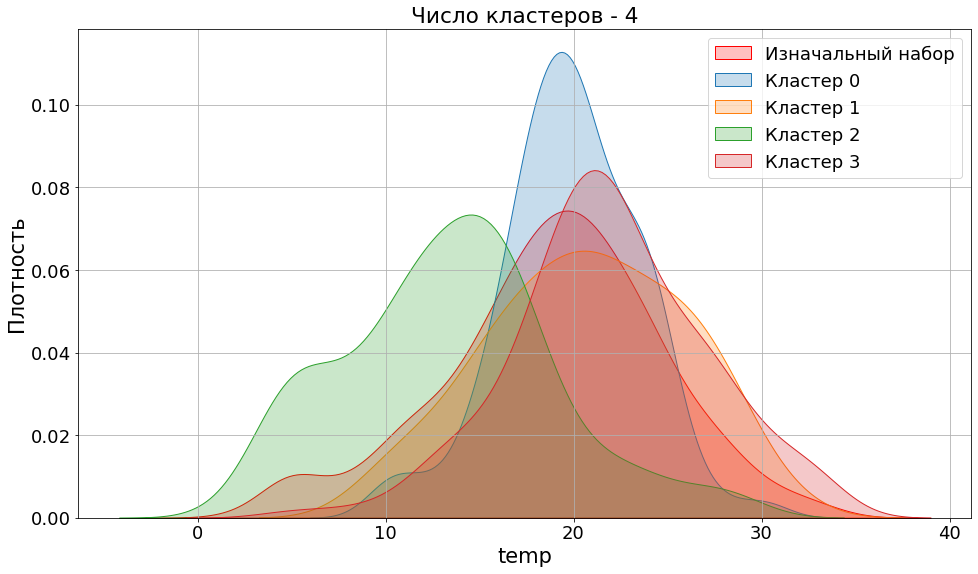

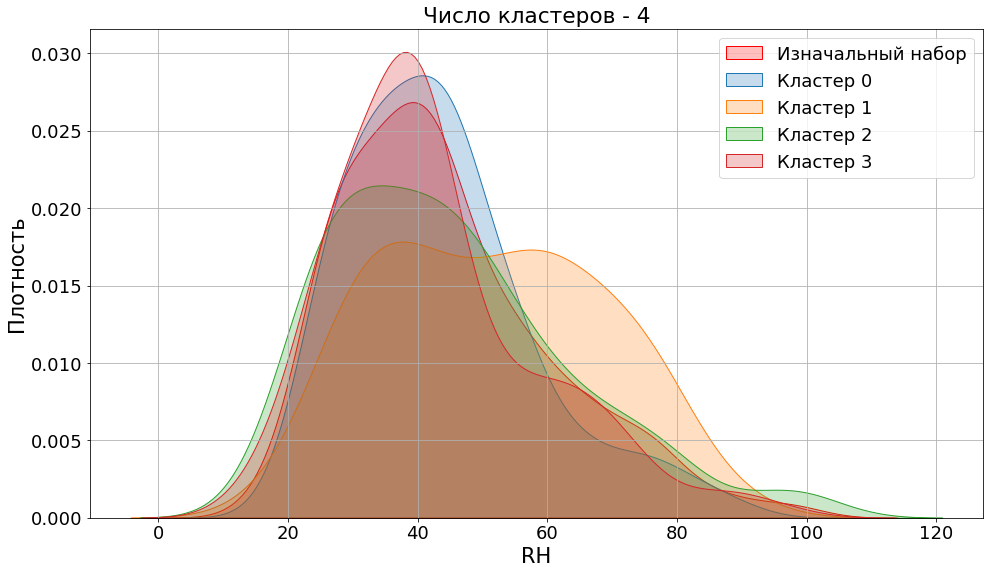

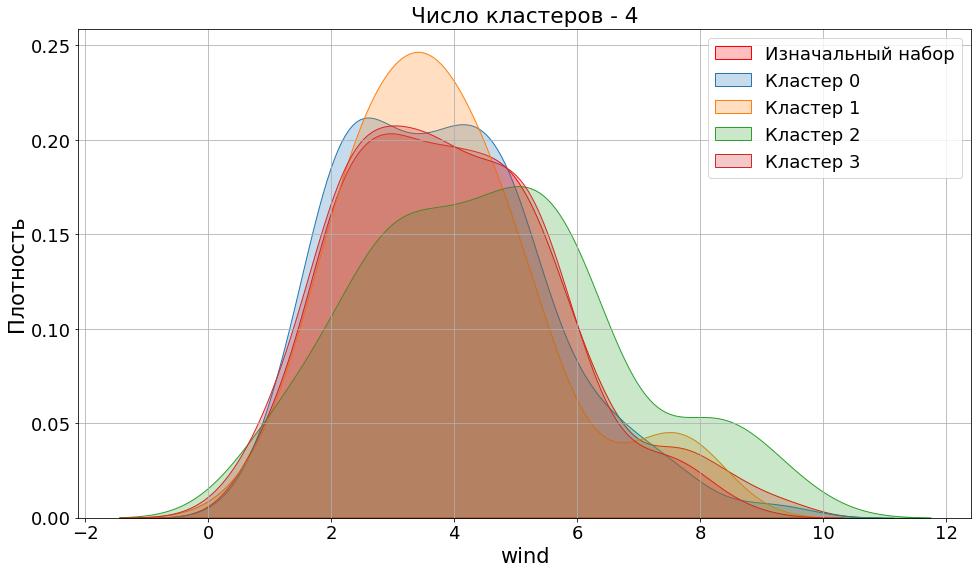

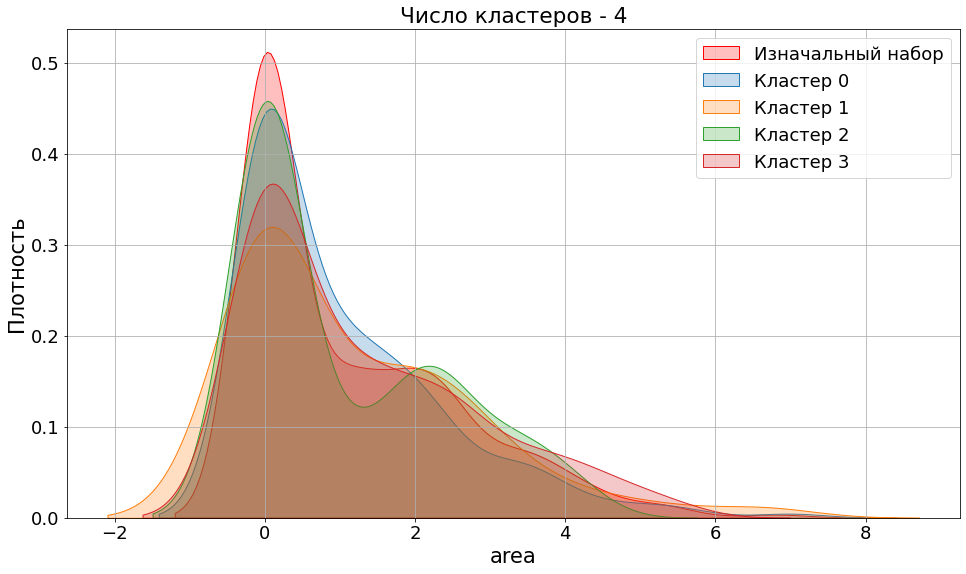

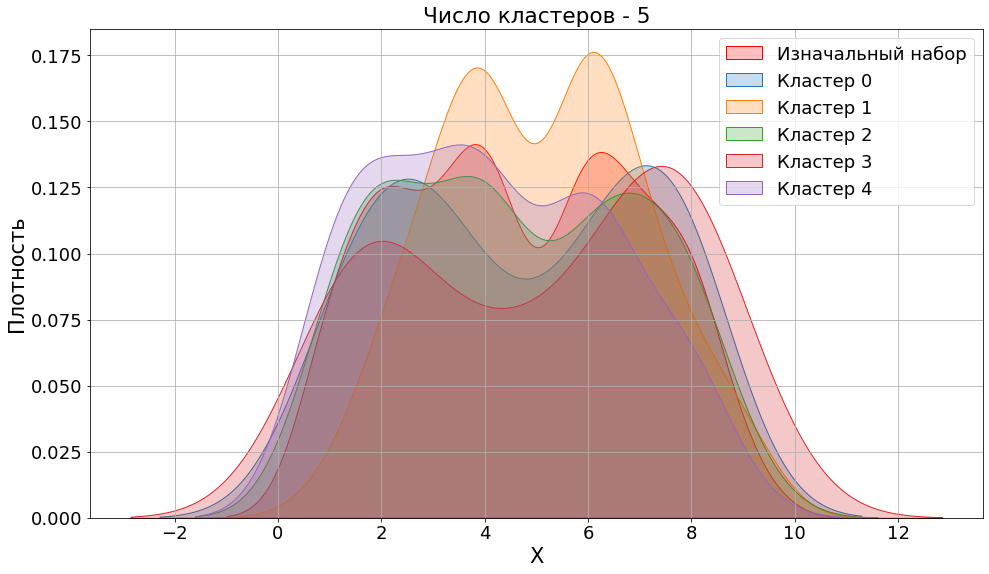

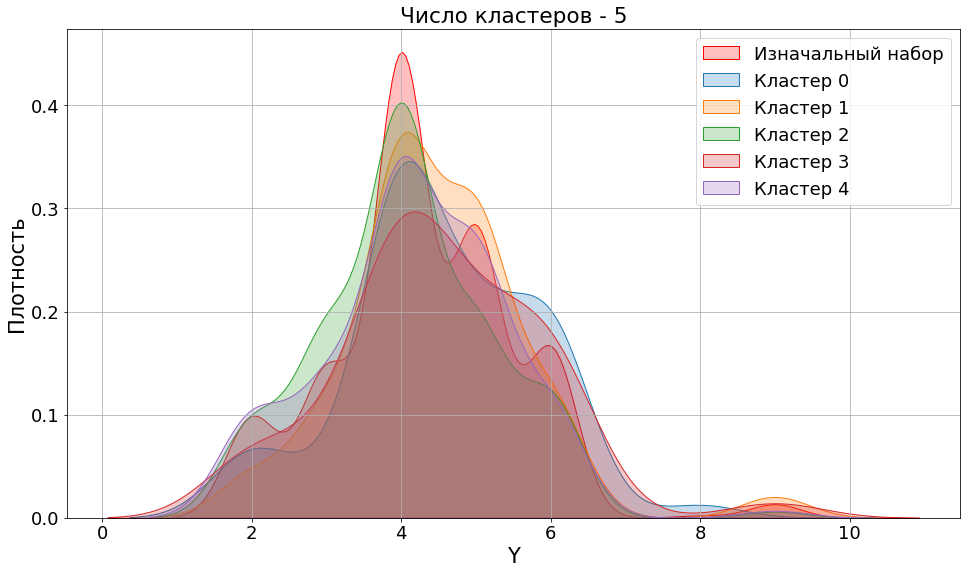

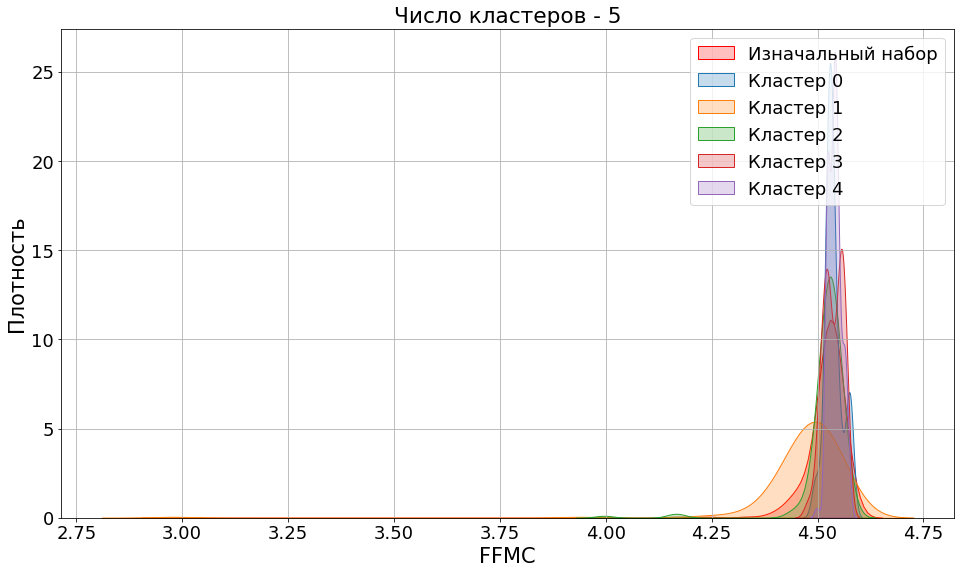

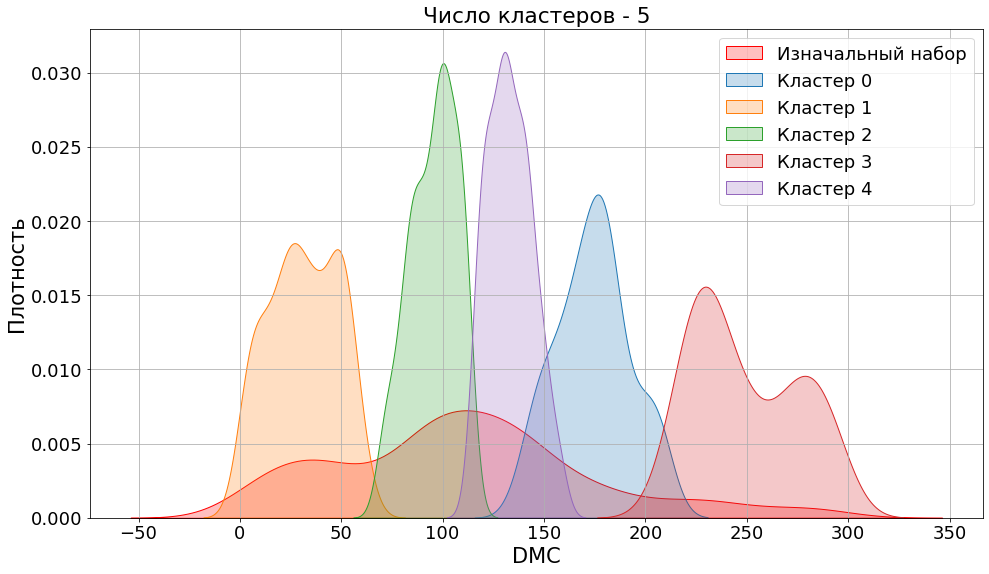

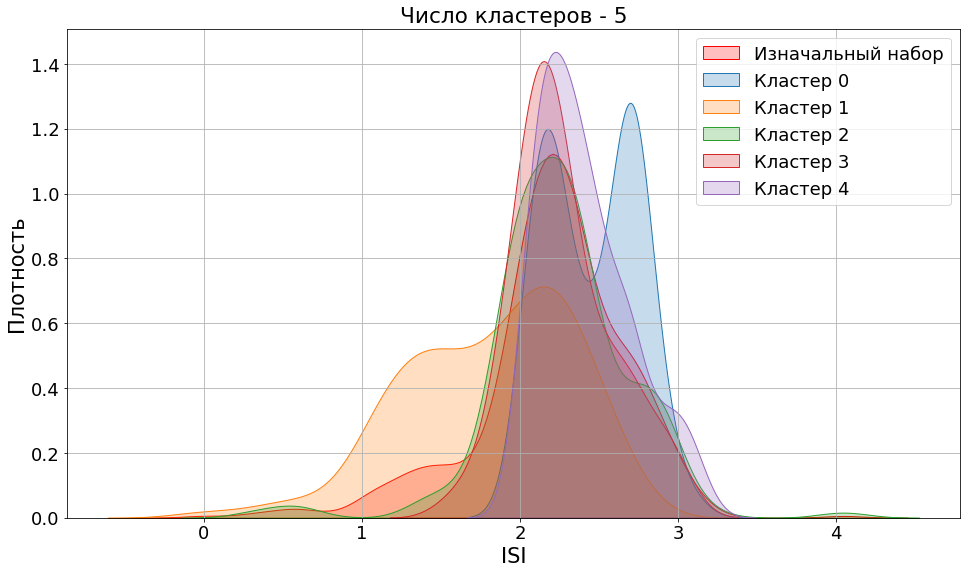

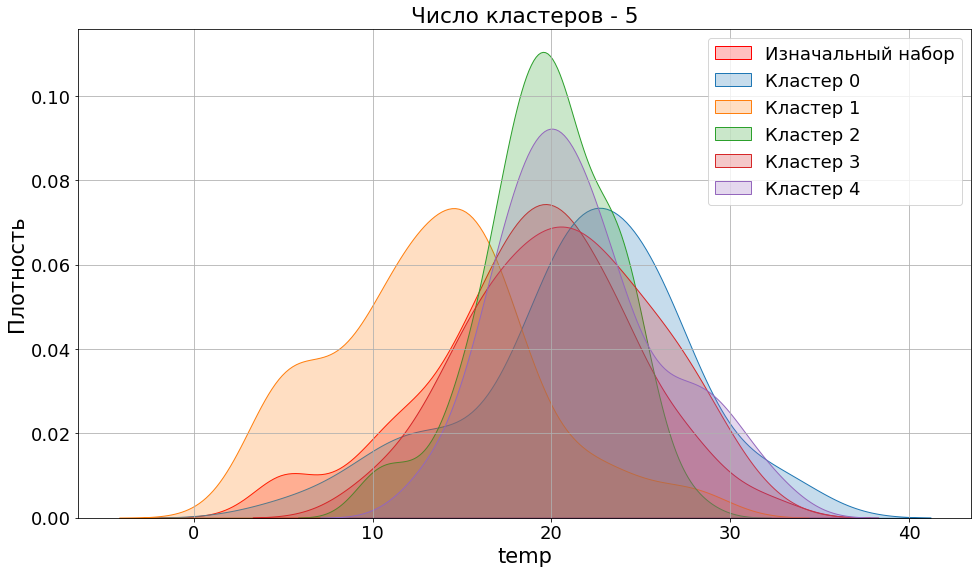

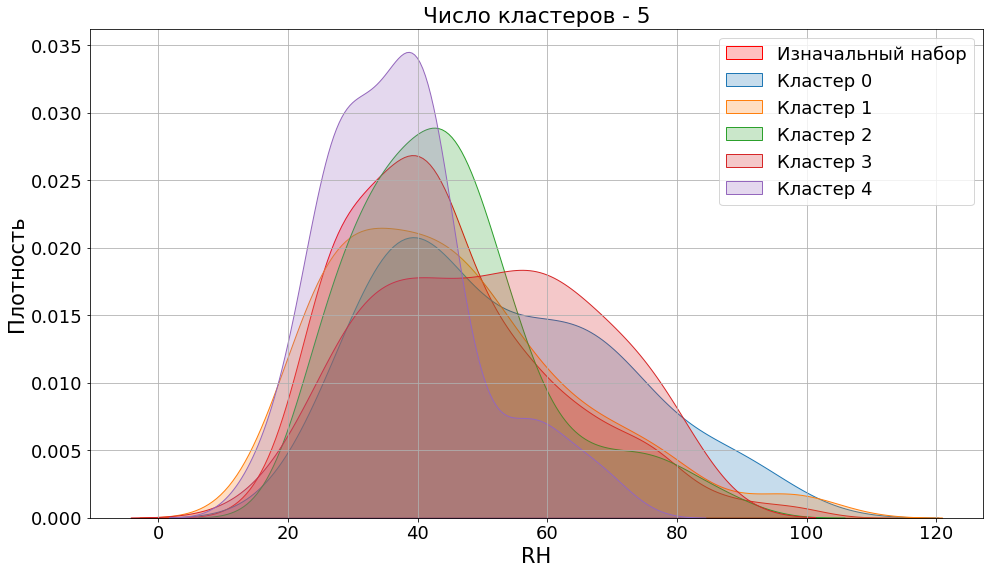

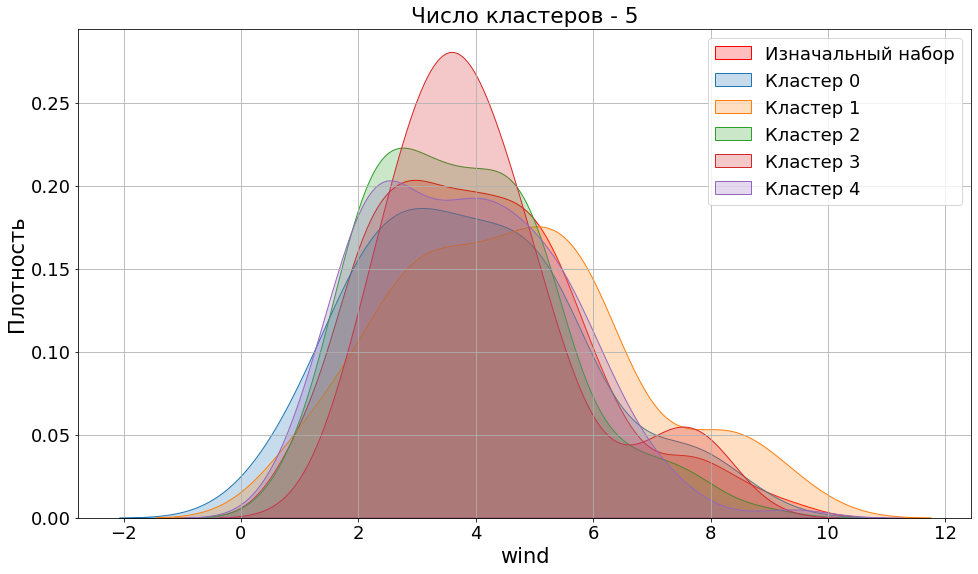

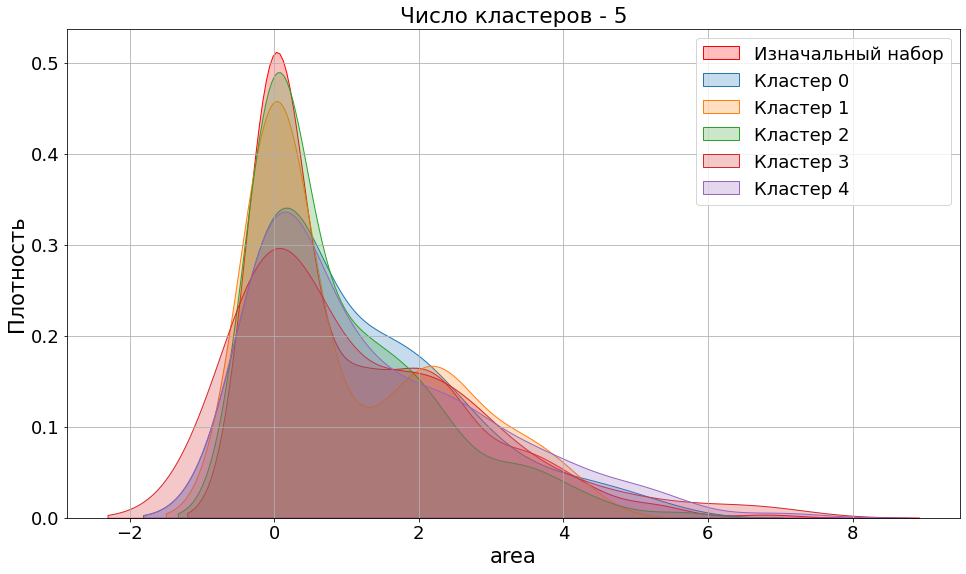

In [42]:
for i in clusters_results:
    for param in i[1]:
        if param == "day_mon":
            break
        plt.figure(figsize=plotsize)
        plt.title("Число кластеров - {}".format(i[0]))
        plt.grid(True)
        sns.kdeplot(i[1][param], shade=True, color='r', label="Изначальный набор")
        for num in range(clusters_number):
            t = i[1][i[1]["cluster"] == num]
            sns.kdeplot(t[param], shade=True,label="Кластер {}".format(num))
        plt.xlabel(param, fontsize=21)
        plt.ylabel("Плотность", fontsize=21)
        plt.legend()

In [43]:
clusters_results[0][1][clusters_results[0][1]['cluster'] == 0].describe()

X           Y        FFMC         DMC         ISI        temp  \
count  228.000000  228.000000  228.000000  228.000000  228.000000  228.000000   
mean     4.456140    4.328947    4.538577  166.459211    2.397848   21.312281   
std      2.424691    1.224437    0.018345   46.919299    0.298505    4.969761   
min      1.000000    2.000000    4.478473  117.200000    1.609438    5.100000   
25%      2.000000    4.000000    4.526127  131.350000    2.140066   18.275000   
50%      4.000000    4.000000    4.536891  147.300000    2.322388   21.200000   
75%      7.000000    5.000000    4.550714  181.750000    2.674149   24.225000   
max      9.000000    9.000000    4.576771  291.300000    3.165475   33.300000   

               RH        wind        area     day_mon     day_sat     day_sun  \
count  228.000000  228.000000  228.000000  228.000000  228.000000  228.000000   
mean    44.004386    3.877193    1.288326    0.105263    0.144737    0.184211   
std     16.262304    1.693524    1.542741    0.307567    0.352609    0.388509   
min     15.000000    0.400000    0.000000    0.000000    0.000000    0.000000   
25%     33.000000    2.700000    0.000000    0.000000    0.000000    0.000000   
50%     40.000000    3.600000    0.815277    0.000000    0.000000    0.000000   
75%     55.250000    4.900000    2.223033    0.000000    0.000000    0.000000   
max     96.000000    9.400000    6.995620    1.000000    1.000000    1.000000   

          day_thu     day_tue     day_wed   month_aug  month_dec  month_feb  \
count  228.000000  228.000000  228.000000  228.000000      228.0      228.0   
mean     0.149123    0.149123    0.109649    0.570175        0.0        0.0   
std      0.356993    0.356993    0.313139    0.496140        0.0        0.0   
min      0.000000    0.000000    0.000000    0.000000        0.0        0.0   
25%      0.000000    0.000000    0.000000    0.000000        0.0        0.0   
50%      0.000000    0.000000    0.000000    1.000000        0.0        0.0   
75%      0.000000    0.000000    0.000000    1.000000        0.0        0.0   
max      1.000000    1.000000    1.000000    1.000000        0.0        0.0   

       month_jan   month_jul   month_jun  month_mar  month_may  month_nov  \
count      228.0  228.000000  228.000000      228.0      228.0      228.0   
mean         0.0    0.035088    0.013158        0.0        0.0        0.0   
std          0.0    0.184406    0.114201        0.0        0.0        0.0   
min          0.0    0.000000    0.000000        0.0        0.0        0.0   
25%          0.0    0.000000    0.000000        0.0        0.0        0.0   
50%          0.0    0.000000    0.000000        0.0        0.0        0.0   
75%          0.0    0.000000    0.000000        0.0        0.0        0.0   
max          0.0    1.000000    1.000000        0.0        0.0        0.0   

       month_oct   month_sep  cluster  
count      228.0  228.000000    228.0  
mean         0.0    0.381579      0.0  
std          0.0    0.486843      0.0  
min          0.0    0.000000      0.0  
25%          0.0    0.000000      0.0  
50%          0.0    0.000000      0.0  
75%          0.0    1.000000      0.0  
max          0.0    1.000000      0.0

In [44]:
clusters_results[0][1][clusters_results[0][1]['cluster'] == 1].describe()

X           Y        FFMC         DMC         ISI        temp  \
count  289.000000  289.000000  289.000000  289.000000  289.000000  289.000000   
mean     4.837370    4.276817    4.496438   67.018339    2.051110   16.977509   
std      2.212148    1.235829    0.113268   35.187511    0.529663    5.711989   
min      1.000000    2.000000    2.980619    1.100000    0.000000    2.200000   
25%      3.000000    4.000000    4.489759   35.800000    1.824549   13.700000   
50%      5.000000    4.000000    4.521789   78.500000    2.104134   17.600000   
75%      7.000000    5.000000    4.533674   99.000000    2.360854   20.800000   
max      9.000000    9.000000    4.569543  115.400000    4.044804   30.200000   

               RH        wind        area     day_mon     day_sat     day_sun  \
count  289.000000  289.000000  289.000000  289.000000  289.000000  289.000000   
mean    44.512111    4.128374    0.971149    0.173010    0.176471    0.183391   
std     16.385568    1.860861    1.258317    0.378912    0.381881    0.387658   
min     18.000000    0.900000    0.000000    0.000000    0.000000    0.000000   
25%     32.000000    2.700000    0.000000    0.000000    0.000000    0.000000   
50%     43.000000    4.000000    0.000000    0.000000    0.000000    0.000000   
75%     53.000000    5.400000    1.854734    0.000000    0.000000    0.000000   
max    100.000000    9.400000    5.633110    1.000000    1.000000    1.000000   

          day_thu     day_tue     day_wed   month_aug   month_dec   month_feb  \
count  289.000000  289.000000  289.000000  289.000000  289.000000  289.000000   
mean     0.093426    0.103806    0.100346    0.186851    0.031142    0.069204   
std      0.291533    0.305538    0.300982    0.390468    0.174002    0.254241   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        month_jan   month_jul   month_jun   month_mar   month_may   month_nov  \
count  289.000000  289.000000  289.000000  289.000000  289.000000  289.000000   
mean     0.006920    0.083045    0.048443    0.186851    0.006920    0.003460   
std      0.083044    0.276429    0.215073    0.390468    0.083044    0.058824   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        month_oct   month_sep  cluster  
count  289.000000  289.000000    289.0  
mean     0.051903    0.294118      1.0  
std      0.222216    0.456435      0.0  
min      0.000000    0.000000      1.0  
25%      0.000000    0.000000      1.0  
50%      0.000000    0.000000      1.0  
75%      0.000000    1.000000      1.0  
max      1.000000    1.000000      1.0

Как можно заметить, кластеры четко разделены по параметру DMC и в меньшей степени по параметру temp. Нет смысла брать больше 3 кластеров, так как выборка в рамках каждого отдельного кластера будет весьма незначительной и возникнет проблема недообученности модели.

Обучим модели на новых кластеризованных данных. Обучение и тестирование будем проводить в рамках каждого кластера по отдельности, а затем пересчитаем результаты и сравним с результатами моделей, построенных ранее на не кластеризованных данных.

In [46]:
results_clustering_trainig = []
for i, [clusters_num, dataFrame] in enumerate(clusters_results):
    results_clustering_trainig.append([clusters_num])
    for j in range(clusters_num):
        results_clustering_trainig[-1].append(benchmark_main(dataFrame[dataFrame["cluster"] == j]))

/Users/seryogas/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Number of Features:  3
Selected Features:  [False  True False  True  True False False False False False False False
 False False False False False False False False False False False False]
Feature Ranking:  [ 3  1  4  1  1  2 12  8 10  6  9  5  7 16 17 18 13 14 19 20 21 15 11 22]


/Users/seryogas/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Number of Features:  3
Selected Features:  [False False False  True  True  True False False False False False False
 False False False False False False False False False False False False]
Feature Ranking:  [ 4  2  3  1  1  1 10  8  5 16 14 12 18  6 15 19  7 13 11 21 20 17  9 22]


/Users/seryogas/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Number of Features:  3
Selected Features:  [False  True False  True  True False False False False False False False
 False False False False False False False False False False False False]
Feature Ranking:  [ 4  1  3  1  1  2 11  5  8  9  7 10 14 16 17 18 12 13 19 20 21 15  6 22]


/Users/seryogas/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Number of Features:  3
Selected Features:  [False False False  True  True  True False False False False False False
 False False False False False False False False False False False False]
Feature Ranking:  [ 5  3  2  1  1  1 11  7  8 17 13 14 19  4 10 20 16 12  6  9 21 15 18 22]


/Users/seryogas/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Number of Features:  3
Selected Features:  [False  True False  True  True False False False False False False False
 False False False False False False False False False False False False]
Feature Ranking:  [ 4  1  2  1  1  3 12  9 11  7  8  6  5 15 16 17 13 18 19 20 21 14 10 22]


/Users/seryogas/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Number of Features:  3
Selected Features:  [False  True False  True  True False False False False False False False
 False False False False False False False False False False False False]
Feature Ranking:  [ 4  1  2  1  1  3 10  5  6 13 11  8 12 16 17 18  9 14 19 20 21 15  7 22]


/Users/seryogas/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Number of Features:  3
Selected Features:  [False False False  True  True  True False False False False False False
 False False False False False False False False False False False False]
Feature Ranking:  [ 5  4  3  1  1  1  9  6  8  2 10 12  7 15 16 17 13 18 19 20 21 14 11 22]


/Users/seryogas/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Number of Features:  3
Selected Features:  [False False False  True  True  True False False False False False False
 False False False False False False False False False False False False]
Feature Ranking:  [ 5  2  3  1  1  1 10  8  6 18  7 17 16  4 13 19 12 14  9 11 21 15 20 22]


/Users/seryogas/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Number of Features:  3
Selected Features:  [False  True False  True  True False False False False False False False
 False False False False False False False False False False False False]
Feature Ranking:  [ 4  1  3  1  1  2 12 13  8  9  6  5  7 16 17 18 11 14 19 20 21 15 10 22]


/Users/seryogas/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Number of Features:  3
Selected Features:  [ True  True False False  True False False False False False False False
 False False False False False False False False False False False False]
Feature Ranking:  [ 1  1  3  2  1  6  9 12  8 10  5  4 11 14 15 16  7 13 17 18 19 20 21 22]


/Users/seryogas/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Number of Features:  3
Selected Features:  [False False False  True  True  True False False False False False False
 False False False False False False False False False False False False]
Feature Ranking:  [ 5  2  3  1  1  1 12  8  7 17  6 16 18  4 13 19 11 14  9 10 21 15 20 22]


/Users/seryogas/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Number of Features:  3
Selected Features:  [False  True False  True  True False False False False False False False
 False False False False False False False False False False False False]
Feature Ranking:  [ 4  1  3  1  1  2  6  5  9 13  8  7 10 16 17 18 11 14 19 20 21 15 12 22]


/Users/seryogas/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Number of Features:  3
Selected Features:  [False False False  True  True  True False False False False False False
 False False False False False False False False False False False False]
Feature Ranking:  [ 5  2  7  1  1  1 13  9  8  3 12  6  4 15 16 17 10 18 19 20 21 14 11 22]


/Users/seryogas/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Number of Features:  3
Selected Features:  [False  True False  True  True False False False False False False False
 False False False False False False False False False False False False]
Feature Ranking:  [ 4  1  3  1  1  2 12  6  5 10  9  8  7 16 17 18 14 13 19 20 21 15 11 22]


In [47]:
clustering_results = []
for i in results_clustering_trainig:
    print("\nЧисло кластеров - ", i[0])
    res_df = i[1].copy()
    for j in i[2:]:
        res_df = res_df.add(j, fill_value=0)
    res_df = res_df / i[0]
    print(res_df)
    clustering_results.append(res_df)


Число кластеров -  2
                     Linear Regression  K-Neighbors Regressor  RandomForest  \
mean_absolute_error           1.212102               1.185619      1.196778   
mean_squared_error            2.114840               2.265156      2.159946   

                     ExtraTrees       SVR  
mean_absolute_error    1.141782  1.195390  
mean_squared_error     2.238313  2.413798  

Число кластеров -  3
                     Linear Regression  K-Neighbors Regressor  RandomForest  \
mean_absolute_error           1.325535               1.371972      1.353474   
mean_squared_error            2.966013               3.115535      3.065316   

                     ExtraTrees       SVR  
mean_absolute_error    1.313716  1.208535  
mean_squared_error     3.409499  2.979964  

Число кластеров -  4
                     Linear Regression  K-Neighbors Regressor  RandomForest  \
mean_absolute_error           1.397155               1.324936      1.295877   
mean_squared_error            2.8138

In [600]:
clustering_results[0]

Linear Regression  K-Neighbors Regressor  \
explained_variance_score          -0.166391              -0.255029   
mean_absolute_error                1.212102               1.239936   
r2_score                          -0.184406              -0.267746   
mean_squared_error                 2.114840               2.265948   

                          RandomForest  ExtraTrees       SVR  
explained_variance_score     -0.162261   -0.310726 -0.222378  
mean_absolute_error           1.192805    1.185313  1.163564  
r2_score                     -0.174158   -0.331600 -0.278241  
mean_squared_error            2.098395    2.380921  2.282840

In [54]:
clustering_results[1]

NameError: name 'clustering_results' is not defined

In [602]:
clustering_results[2]

Linear Regression  K-Neighbors Regressor  \
explained_variance_score          -0.351515              -0.239199   
mean_absolute_error                1.290868               1.185638   
r2_score                          -0.497766              -0.351522   
mean_squared_error                 2.272810               2.084848   

                          RandomForest  ExtraTrees       SVR  
explained_variance_score     -0.458069   -0.833647 -0.663278  
mean_absolute_error           1.219925    1.322947  1.284939  
r2_score                     -0.667818   -1.037132 -0.703666  
mean_squared_error            2.307207    2.933291  2.823369

In [603]:
clustering_results[3]

Linear Regression  K-Neighbors Regressor  \
explained_variance_score          -0.757665              -0.200761   
mean_absolute_error                1.556901               1.345687   
r2_score                          -1.000532              -0.354912   
mean_squared_error                 4.604582               3.248045   

                          RandomForest  ExtraTrees       SVR  
explained_variance_score     -0.077217   -0.243514 -1.161813  
mean_absolute_error           1.303731    1.378404  1.659523  
r2_score                     -0.227605   -0.433263 -1.366985  
mean_squared_error            2.994288    3.752312  5.738589

In [5]:
import numpy
import pandas

from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesRegressor


import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix


from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error





# from keras.models import Sequential
# from keras.layers import Dense
# from keras.layers import Dropout
# from keras.utils import np_utils
# from keras.constraints import maxnorm
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

data = pd.read_csv('datasets/forest_fire_dataset.csv')

dataset = data.copy()
dataset.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
dataset.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)


dataset = dataset.values

X = dataset[:,0:-1]
Y = dataset[:,-1]

model = ExtraTreesRegressor()
rfe = RFE(model, 3)
fit = rfe.fit(X, Y)

print("Number of Features: ", fit.n_features_)
print("Selected Features: ", fit.support_)
print("Feature Ranking: ", fit.ranking_) 


num_instances = len(X)

models = []
models.append(('Linear Regression', LinearRegression()))
models.append(('K-Neighbors Regressor', KNeighborsRegressor()))
models.append(('RandomForest', RandomForestRegressor()))
models.append(('ExtraTrees', ExtraTreesRegressor()))
models.append(('SVR', SVR()))

# Evaluations
results = {}
names = []
scoring = []


for name, model in models:
    # Fit the model
    model.fit(X, Y)
    
    predictions = model.predict(X)
    
    # Evaluate the model
    score = explained_variance_score(Y, predictions)
    mae = mean_absolute_error(predictions, Y)
#     r2Score = r2_score(Y, predictions)
    mse = mean_squared_error(Y, predictions)
    names.append(name)
    
    results[name] = [score, mae, mse]
results = pd.DataFrame.from_dict(results)
results.index = ['explained_variance_score', 'mean_absolute_error', 'mean_squared_error']

array([[ 7.  ,  5.  ,  3.  , ...,  6.7 ,  0.  ,  0.  ],
       [ 7.  ,  4.  , 10.  , ...,  0.9 ,  0.  ,  0.  ],
       [ 7.  ,  4.  , 10.  , ...,  1.3 ,  0.  ,  0.  ],
       ...,
       [ 7.  ,  4.  ,  8.  , ...,  6.7 ,  0.  , 11.16],
       [ 1.  ,  4.  ,  8.  , ...,  4.  ,  0.  ,  0.  ],
       [ 6.  ,  3.  , 11.  , ...,  4.5 ,  0.  ,  0.  ]])

In [21]:
results

Linear Regression  K-Neighbors Regressor  \
explained_variance_score           0.023975               0.273047   
mean_absolute_error               19.309939              15.507250   
mean_squared_error              3947.265554            2940.638578   

                          RandomForest  ExtraTrees          SVR  
explained_variance_score      0.777850    0.999897     0.000503  
mean_absolute_error           7.985545    0.096441    12.808832  
mean_squared_error          898.466000    0.416323  4190.385199

In [33]:
data_frame = generate_data(data, optimizing_data=True, delete_DC=True, delete_rain=True)
data_frame.describe()


-----Delete rain-------------
     X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
3    8  6   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00
243  7  4   aug  sun  91.8  175.1  700.7  13.8  21.9  73   7.6   1.0   0.00
286  7  6   jul  wed  91.2  183.1  437.7  12.5  12.6  90   7.6   0.2   0.00
499  7  5   aug  tue  96.1  181.1  671.2  14.3  27.3  63   4.9   6.4  10.82
500  8  6   aug  tue  96.1  181.1  671.2  14.3  21.6  65   4.9   0.8   0.00
501  7  5   aug  tue  96.1  181.1  671.2  14.3  21.6  65   4.9   0.8   0.00
502  4  4   aug  tue  96.1  181.1  671.2  14.3  20.7  69   4.9   0.4   0.00
509  5  4   aug  fri  91.0  166.9  752.6   7.1  21.1  71   7.6   1.4   2.17

-----Delete DC-------------

-----Optimizing data-------------


X           Y        FFMC         DMC         ISI        temp  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     4.669246    4.299807    4.515021  110.872340    2.204023   18.889168   
std      2.313778    1.229900    0.088019   64.046482    0.474845    5.806625   
min      1.000000    2.000000    2.980619    1.100000    0.000000    2.200000   
25%      3.000000    4.000000    4.513055   68.600000    2.014903   15.500000   
50%      4.000000    4.000000    4.528289  108.300000    2.240710   19.300000   
75%      7.000000    5.000000    4.542230  142.400000    2.468100   22.800000   
max      9.000000    9.000000    4.576771  291.300000    4.044804   33.300000   

               RH        wind        area  
count  517.000000  517.000000  517.000000  
mean    44.288201    4.017602    1.111026  
std     16.317469    1.791653    1.398436  
min     15.000000    0.400000    0.000000  
25%     33.000000    2.700000    0.000000  
50%     42.000000    4.000000    0.418710  
75%     53.000000    4.900000    2.024193  
max    100.000000    9.400000    6.995620

In [34]:
# data = pd.read_csv('datasets/forest_fire_dataset.csv')

# dataset = data.copy()
# dataset.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
# dataset.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)

dataset = data_frame.copy()
dataset.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
dataset.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)

dataset = dataset.values

X = dataset[:,0:-1]
Y = dataset[:,-1]

model = ExtraTreesRegressor()
rfe = RFE(model, 3)
fit = rfe.fit(X, Y)

print("Number of Features: ", fit.n_features_)
print("Selected Features: ", fit.support_)
print("Feature Ranking: ", fit.ranking_) 


num_instances = len(X)

models = []
models.append(('Linear Regression', LinearRegression()))
models.append(('K-Neighbors Regressor', KNeighborsRegressor()))
models.append(('RandomForest', RandomForestRegressor()))
models.append(('ExtraTrees', ExtraTreesRegressor()))
models.append(('SVR', SVR()))

# Evaluations
results = {}
names = []
scoring = []


for name, model in models:
    # Fit the model
    model.fit(X, Y)
    
    predictions = model.predict(X)
    
    # Evaluate the model
    score = explained_variance_score(Y, predictions)
    mae = mean_absolute_error(predictions, Y)
#     r2Score = r2_score(Y, predictions)
    mse = mean_squared_error(Y, predictions)
    names.append(name)
    
    results[name] = [score, mae, mse]
results = pd.DataFrame.from_dict(results)
results.index = ['explained_variance_score', 'mean_absolute_error', 'mean_squared_error']

/Users/seryogas/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Number of Features:  3
Selected Features:  [False False False False False  True False  True  True False]
Feature Ranking:  [5 4 8 6 7 1 3 1 1 2]


In [35]:
results

Linear Regression  K-Neighbors Regressor  \
explained_variance_score           0.031790               0.195207   
mean_absolute_error                1.130103               0.986071   
mean_squared_error                 1.889791               1.570828   

                          RandomForest  ExtraTrees       SVR  
explained_variance_score      0.836507    0.992580  0.008487  
mean_absolute_error           0.449858    0.018966  1.066627  
mean_squared_error            0.320674    0.014482  2.342029

In [34]:
from sklearn.model_selection import train_test_split
def benchmark_main(data):
    # data = pd.read_csv('datasets/forest_fire_dataset.csv')

    # dataset = data.copy()
    # dataset.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
    # dataset.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)

    s_scaler = preprocessing.StandardScaler()
    normalized_standart_data = data.copy()
    tmp = s_scaler.fit_transform(data.loc[:, "FFMC" : "wind"])
    normalized_standart_data.loc[:, "FFMC" : "wind"] = tmp
    normalized_standart_data['X'] = normalized_standart_data['X'].astype('category')
    normalized_standart_data['Y'] = normalized_standart_data['Y'].astype('category')
    
#     dataset = normalized_standart_data.copy()
#     dataset.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
#     dataset.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)
#     dataset['month'] = dataset['month'].astype('category')
#     dataset['day'] = dataset['day'].astype('category')
#     dataset = dataset.drop(['month', 'day'], axis=1)

#     dataset = dataset.values
    
#     X = dataset[:,0:-1]
#     Y = dataset[:,-1]
    X = normalized_standart_data.drop(['area'], axis=1)

    clean_data = normalized_standart_data.drop(["X", 'Y'], axis=1)
    target = clean_data['area']
    features = clean_data.drop(columns = 'area')

    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 42)

    model = ExtraTreesRegressor()
    rfe = RFE(model, 3)
    fit = rfe.fit(x_train, y_train)

    print("Number of Features: ", fit.n_features_)
    print("Selected Features: ", fit.support_)
    print("Feature Ranking: ", fit.ranking_) 

#     num_instances = len(x_train)

    models = []
    models.append(('Linear Regression', LinearRegression()))
    models.append(('K-Neighbors Regressor', KNeighborsRegressor()))
    models.append(('RandomForest', RandomForestRegressor()))
    models.append(('ExtraTrees', ExtraTreesRegressor()))
    models.append(('SVR', SVR()))

    # Evaluations
    results = {}
    names = []
    scoring = []


    for name, model in models:
        # Fit the model
        model.fit(x_train, y_train)

        predictions = model.predict(x_test)
#         print(model.get_params())

        # Evaluate the model
#         score = explained_variance_score(y_test, predictions)
        mae = mean_absolute_error(predictions, y_test)
        mse = mean_squared_error(y_test, predictions)
        names.append(name)

        results[name] = [mae, mse]
    results = pd.DataFrame.from_dict(results)
    results.index = ['mean_absolute_error', 'mean_squared_error']
    return results

In [93]:
res = benchmark_main(generate_data(data, dummy=True, delete_DC=True, delete_rain=True, optimizing_data=True))


-----Delete rain-------------
     X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
3    8  6   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00
243  7  4   aug  sun  91.8  175.1  700.7  13.8  21.9  73   7.6   1.0   0.00
286  7  6   jul  wed  91.2  183.1  437.7  12.5  12.6  90   7.6   0.2   0.00
499  7  5   aug  tue  96.1  181.1  671.2  14.3  27.3  63   4.9   6.4  10.82
500  8  6   aug  tue  96.1  181.1  671.2  14.3  21.6  65   4.9   0.8   0.00
501  7  5   aug  tue  96.1  181.1  671.2  14.3  21.6  65   4.9   0.8   0.00
502  4  4   aug  tue  96.1  181.1  671.2  14.3  20.7  69   4.9   0.4   0.00
509  5  4   aug  fri  91.0  166.9  752.6   7.1  21.1  71   7.6   1.4   2.17

-----Delete DC-------------

-----Optimizing data-------------

-----Make dummy data-------------


/Users/seryogas/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Number of Features:  3
Selected Features:  [False  True False  True  True False False False False False False False
 False False False False False False False False False False False]
Feature Ranking:  [ 4  1  3  1  1  2  8 11  6  9  7  5 12 13 17 21 10 15 19 16 20 18 14]



-----Delete rain-------------
     X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
3    8  6   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00
243  7  4   aug  sun  91.8  175.1  700.7  13.8  21.9  73   7.6   1.0   0.00
286  7  6   jul  wed  91.2  183.1  437.7  12.5  12.6  90   7.6   0.2   0.00
499  7  5   aug  tue  96.1  181.1  671.2  14.3  27.3  63   4.9   6.4  10.82
500  8  6   aug  tue  96.1  181.1  671.2  14.3  21.6  65   4.9   0.8   0.00
501  7  5   aug  tue  96.1  181.1  671.2  14.3  21.6  65   4.9   0.8   0.00
502  4  4   aug  tue  96.1  181.1  671.2  14.3  20.7  69   4.9   0.4   0.00
509  5  4   aug  fri  91.0  166.9  752.6   7.1  21.1  71   7.6   1.4   2.17

-----Delete DC-------------

-----Optimizing data-------------

-----Make dummy data-------------
26
23


<BarContainer object of 23 artists>

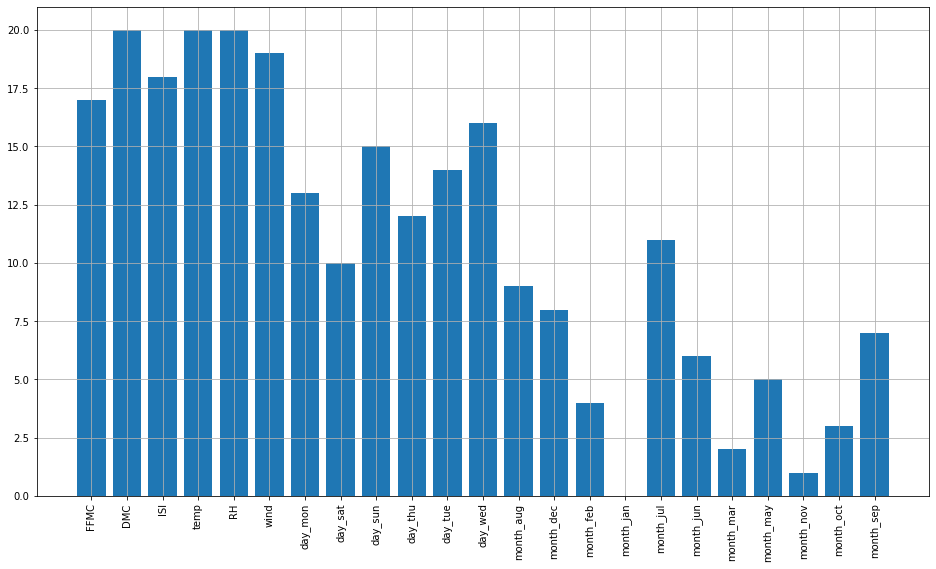

In [44]:
plt.figure(figsize=plotsize)
plt.grid(True)
plt.xticks(rotation='vertical')
ft = [4,  1,  3,  1,  1,  2,  8, 11  ,6,  9,  7,  5, 12 ,13, 17, 21, 10, 15, 19, 16, 20, 18, 14]
p = max(ft)
ttt = generate_data(data, dummy=True, delete_DC=True, delete_rain=True, optimizing_data=True)
print(len(ttt.columns))
print(len([p - i for i in ft]))
plt.bar(ttt.drop(["X", "Y", "area"], axis=1).columns, [p - i for i in ft])

In [94]:
res

Linear Regression  K-Neighbors Regressor  RandomForest  \
mean_absolute_error           1.214520               1.237415      1.182365   
mean_squared_error            2.330653               2.533087      2.149509   

                     ExtraTrees       SVR  
mean_absolute_error    1.210953  1.142079  
mean_squared_error     2.495132  2.466648

In [107]:
y

NameError: name 'y' is not defined

In [112]:
clusters_results[1][1][clusters_results[1][1]['cluster'] == 0]

X  Y  month  day      FFMC   DMC       ISI  temp  RH  wind      area  \
0    7  5      3    5  4.468204  26.2  1.808289   8.2  51   6.7  0.000000   
1    7  4     10    2  4.517431  35.4  2.041220  18.0  33   0.9  0.000000   
2    7  4     10    6  4.517431  43.7  2.041220  14.6  33   1.3  0.000000   
3    8  6      3    5  4.529368  33.3  2.302585   8.3  97   4.0  0.000000   
4    8  6      3    7  4.503137  51.3  2.360854  11.4  99   1.8  0.000000   
..  .. ..    ...  ...       ...   ...       ...   ...  ..   ...       ...   
511  8  6      8    7  4.414010  56.7  1.064711  27.8  35   2.7  0.000000   
512  4  3      8    7  4.414010  56.7  1.064711  27.8  32   2.7  2.006871   
513  2  4      8    7  4.414010  56.7  1.064711  21.9  71   5.8  4.012592   
514  7  4      8    7  4.414010  56.7  1.064711  21.2  70   6.7  2.498152   
516  6  3     11    2  4.388257   3.0  0.741937  11.8  31   4.5  0.000000   

     cluster  
0          0  
1          0  
2          0  
3          0  
4          0  
..       ...  
511        0  
512        0  
513        0  
514        0  
516        0  

[138 rows x 12 columns]

In [113]:
clusters_results[1][1][clusters_results[1][1]['cluster'] == 1]

X  Y  month  day      FFMC    DMC       ISI  temp  RH  wind      area  \
243  7  4      8    7  4.530447  175.1  2.694627  21.9  73   7.6  0.000000   
244  2  4      8    7  4.530447  175.1  2.694627  22.4  54   7.6  1.353255   
245  3  4      8    7  4.530447  175.1  2.694627  26.8  38   6.3  0.565314   
246  5  4      8    7  4.530447  175.1  2.694627  25.7  39   5.4  0.086178   
258  3  4      8    6  4.530447  170.9  2.687847  20.6  59   0.9  0.000000   
..  .. ..    ...  ...       ...    ...       ...   ...  ..   ...       ...   
506  1  2      8    5  4.521789  166.9  2.091864  18.5  73   8.5  0.000000   
507  2  4      8    5  4.521789  166.9  2.091864  25.9  41   3.6  0.000000   
508  1  2      8    5  4.521789  166.9  2.091864  25.9  41   3.6  0.000000   
509  5  4      8    5  4.521789  166.9  2.091864  21.1  71   7.6  1.153732   
510  6  5      8    5  4.521789  166.9  2.091864  18.2  62   5.4  0.357674   

     cluster  
243        1  
244        1  
245        1  
246        1  
258        1  
..       ...  
506        1  
507        1  
508        1  
509        1  
510        1  

[86 rows x 12 columns]

In [114]:
clusters_results[1][1][clusters_results[1][1]['cluster'] == 2]

X  Y  month  day      FFMC    DMC       ISI  temp  RH  wind      area  \
5    8  6      8    7  4.535820   85.3  2.753661  22.2  29   5.4  0.000000   
6    8  6      8    1  4.535820   88.9  2.251292  24.1  27   3.1  0.000000   
7    8  6      8    1  4.527209  145.4  2.459589   8.0  86   2.2  0.000000   
8    8  6      9    2  4.521789  129.5  2.079442  13.1  63   5.4  0.000000   
9    7  5      9    6  4.537961   88.0  2.091864  22.8  40   4.0  0.000000   
..  .. ..    ...  ...       ...    ...       ...   ...  ..   ...       ...   
494  6  6      8    6  4.574711  164.0  2.708050  30.8  30   4.9  2.260721   
503  2  4      8    3  4.559126  139.4  3.044522  29.2  30   4.9  1.081805   
504  4  3      8    3  4.559126  139.4  3.044522  28.9  29   4.9  3.923754   
505  1  2      8    4  4.521789  163.2  2.406945  26.7  35   1.8  1.916923   
515  1  4      8    6  4.558079  146.0  2.509599  25.6  42   4.0  0.000000   

     cluster  
5          2  
6          2  
7          2  
8          2  
9          2  
..       ...  
494        2  
503        2  
504        2  
505        2  
515        2  

[293 rows x 12 columns]

In [115]:
res_cluster_0 = benchmark_main(clusters_results[1][1][clusters_results[1][1]['cluster'] == 0])
res_cluster_1 = benchmark_main(clusters_results[1][1][clusters_results[1][1]['cluster'] == 1])
res_cluster_2 = benchmark_main(clusters_results[1][1][clusters_results[1][1]['cluster'] == 2])

/Users/seryogas/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Number of Features:  3
Selected Features:  [False False False False False  True  True  True False]
Feature Ranking:  [3 6 4 2 5 1 1 1 7]


/Users/seryogas/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Number of Features:  3
Selected Features:  [False False False False False  True  True  True False]
Feature Ranking:  [6 2 5 3 4 1 1 1 7]


/Users/seryogas/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Number of Features:  3
Selected Features:  [False False False  True False  True  True False False]
Feature Ranking:  [6 3 5 1 4 1 1 2 7]


In [116]:
res_cluster_0

Linear Regression  K-Neighbors Regressor  RandomForest  \
mean_absolute_error           1.254661               1.146851      1.134237   
mean_squared_error            2.155280               1.895247      2.098457   

                     ExtraTrees       SVR  
mean_absolute_error    1.103452  0.936471  
mean_squared_error     2.294063  1.853865

In [117]:
res_cluster_1

Linear Regression  K-Neighbors Regressor  RandomForest  \
mean_absolute_error           1.286162               1.321271      1.363614   
mean_squared_error            2.534611               2.145831      2.714309   

                     ExtraTrees       SVR  
mean_absolute_error    1.213293  1.236415  
mean_squared_error     2.250167  2.534785

In [118]:
res_cluster_2

Linear Regression  K-Neighbors Regressor  RandomForest  \
mean_absolute_error           1.141341               1.145503      1.129281   
mean_squared_error            1.905436               1.940161      1.909419   

                     ExtraTrees       SVR  
mean_absolute_error    1.167913  1.127884  
mean_squared_error     2.001942  2.081825

In [7]:
new_df = data_frame.copy()
new_df.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
new_df.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)
km = KMeans(n_clusters=3)
km.fit(new_df)
clusters = km.predict(new_df)
new_df["cluster"] = clusters

AttributeError: 'DataFrame' object has no attribute 'month'

In [120]:
cluster0_dataset = new_df[new_df["cluster"] == 0].drop(['cluster'], axis = 1)
cluster1_dataset = new_df[new_df["cluster"] == 1].drop(['cluster'], axis = 1)
cluster2_dataset = new_df[new_df["cluster"] == 2].drop(['cluster'], axis = 1)

In [121]:
cluster0_dataset.info()
cluster1_dataset.info()
cluster2_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138 entries, 0 to 516
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       138 non-null    int64  
 1   Y       138 non-null    int64  
 2   month   138 non-null    int64  
 3   day     138 non-null    int64  
 4   FFMC    138 non-null    float64
 5   DMC     138 non-null    float64
 6   ISI     138 non-null    float64
 7   temp    138 non-null    float64
 8   RH      138 non-null    int64  
 9   wind    138 non-null    float64
 10  area    138 non-null    float64
dtypes: float64(6), int64(5)
memory usage: 12.9 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 295 entries, 5 to 515
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       295 non-null    int64  
 1   Y       295 non-null    int64  
 2   month   295 non-null    int64  
 3   day     295 non-null    int64  
 4   FFMC    295 non-null    float64

In [122]:
res_cluster_0 = benchmark_main(cluster0_dataset)

/Users/seryogas/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Number of Features:  3
Selected Features:  [False False False False False  True  True  True]
Feature Ranking:  [3 5 4 2 6 1 1 1]


In [123]:
res_cluster_0

Linear Regression  K-Neighbors Regressor  RandomForest  \
mean_absolute_error           1.254661               1.146851      1.149500   
mean_squared_error            2.155280               1.895247      2.175653   

                     ExtraTrees       SVR  
mean_absolute_error    1.104206  0.938541  
mean_squared_error     2.248832  1.856876

In [124]:
res_cluster_1 = benchmark_main(cluster1_dataset)

/Users/seryogas/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Number of Features:  3
Selected Features:  [False False False  True False  True  True False]
Feature Ranking:  [6 4 5 1 3 1 1 2]


In [125]:
res_cluster_1

Linear Regression  K-Neighbors Regressor  RandomForest  \
mean_absolute_error           1.237589               1.425629      1.377669   
mean_squared_error            2.387494               3.260072      3.081963   

                     ExtraTrees       SVR  
mean_absolute_error    1.392261  1.184121  
mean_squared_error     3.445833  2.780453

In [126]:
res_cluster_2 = benchmark_main(cluster2_dataset)

/Users/seryogas/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Number of Features:  3
Selected Features:  [False  True False  True False  True False False]
Feature Ranking:  [6 1 5 1 4 1 2 3]


In [127]:
res_cluster_2

Linear Regression  K-Neighbors Regressor  RandomForest  \
mean_absolute_error           1.379305               1.516512      1.478696   
mean_squared_error            3.009519               4.219395      3.626225   

                     ExtraTrees       SVR  
mean_absolute_error    1.609235  1.272972  
mean_squared_error     4.489052  3.046565

In [128]:
res_cluster_df = res_cluster_0.add(res_cluster_1, fill_value=0)
res_cluster_df = res_cluster_df.add(res_cluster_2, fill_value=0)
res_cluster_df = res_cluster_df / 3

In [129]:
res_cluster_df

Linear Regression  K-Neighbors Regressor  RandomForest  \
mean_absolute_error           1.290519               1.362997      1.335288   
mean_squared_error            2.517431               3.124905      2.961280   

                     ExtraTrees       SVR  
mean_absolute_error    1.368567  1.131878  
mean_squared_error     3.394572  2.561298

In [ ]:
cluster0_start_data_results = benchmark_main(cluster2_dataset)

In [132]:
res

Linear Regression  K-Neighbors Regressor  RandomForest  \
mean_absolute_error           1.214520               1.237415      1.182365   
mean_squared_error            2.330653               2.533087      2.149509   

                     ExtraTrees       SVR  
mean_absolute_error    1.210953  1.142079  
mean_squared_error     2.495132  2.466648

In [133]:
res_cluster_0.compare(res, align_axis=0).rename(index={"self" : "clustering", "other" : "no clustering"}, level=-1)

Linear Regression  K-Neighbors Regressor  \
mean_absolute_error clustering              1.254661               1.146851   
                    no clustering           1.214520               1.237415   
mean_squared_error  clustering              2.155280               1.895247   
                    no clustering           2.330653               2.533087   

                                   RandomForest  ExtraTrees       SVR  
mean_absolute_error clustering         1.149500    1.104206  0.938541  
                    no clustering      1.182365    1.210953  1.142079  
mean_squared_error  clustering         2.175653    2.248832  1.856876  
                    no clustering      2.149509    2.495132  2.466648

In [134]:
res_cluster_1.compare(res, align_axis=0).rename(index={"self" : "clustering", "other" : "no clustering"}, level=-1)

Linear Regression  K-Neighbors Regressor  \
mean_absolute_error clustering              1.237589               1.425629   
                    no clustering           1.214520               1.237415   
mean_squared_error  clustering              2.387494               3.260072   
                    no clustering           2.330653               2.533087   

                                   RandomForest  ExtraTrees       SVR  
mean_absolute_error clustering         1.377669    1.392261  1.184121  
                    no clustering      1.182365    1.210953  1.142079  
mean_squared_error  clustering         3.081963    3.445833  2.780453  
                    no clustering      2.149509    2.495132  2.466648

In [135]:
res_cluster_2.compare(res, align_axis=0).rename(index={"self" : "clustering", "other" : "no clustering"}, level=-1)

Linear Regression  K-Neighbors Regressor  \
mean_absolute_error clustering              1.379305               1.516512   
                    no clustering           1.214520               1.237415   
mean_squared_error  clustering              3.009519               4.219395   
                    no clustering           2.330653               2.533087   

                                   RandomForest  ExtraTrees       SVR  
mean_absolute_error clustering         1.478696    1.609235  1.272972  
                    no clustering      1.182365    1.210953  1.142079  
mean_squared_error  clustering         3.626225    4.489052  3.046565  
                    no clustering      2.149509    2.495132  2.466648

In [136]:
res_cluster_df.compare(res, align_axis=0).rename(index={"self" : "clustering", "other" : "no clustering"}, level=-1)

Linear Regression  K-Neighbors Regressor  \
mean_absolute_error clustering              1.290519               1.362997   
                    no clustering           1.214520               1.237415   
mean_squared_error  clustering              2.517431               3.124905   
                    no clustering           2.330653               2.533087   

                                   RandomForest  ExtraTrees       SVR  
mean_absolute_error clustering         1.335288    1.368567  1.131878  
                    no clustering      1.182365    1.210953  1.142079  
mean_squared_error  clustering         2.961280    3.394572  2.561298  
                    no clustering      2.149509    2.495132  2.466648

In [5]:
final_data = generate_data(data, delete_DC=True, delete_rain=True, optimizing_data=True, dummy=True)
# final_data.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
# final_data.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)
# final_data = final_data.drop(['month', 'day'], axis=1)


-----Delete rain-------------
     X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
3    8  6   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00
243  7  4   aug  sun  91.8  175.1  700.7  13.8  21.9  73   7.6   1.0   0.00
286  7  6   jul  wed  91.2  183.1  437.7  12.5  12.6  90   7.6   0.2   0.00
499  7  5   aug  tue  96.1  181.1  671.2  14.3  27.3  63   4.9   6.4  10.82
500  8  6   aug  tue  96.1  181.1  671.2  14.3  21.6  65   4.9   0.8   0.00
501  7  5   aug  tue  96.1  181.1  671.2  14.3  21.6  65   4.9   0.8   0.00
502  4  4   aug  tue  96.1  181.1  671.2  14.3  20.7  69   4.9   0.4   0.00
509  5  4   aug  fri  91.0  166.9  752.6   7.1  21.1  71   7.6   1.4   2.17

-----Delete DC-------------

-----Optimizing data-------------

-----Make dummy data-------------


In [6]:
final_data.describe()

X           Y        FFMC         DMC         ISI        temp  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     4.669246    4.299807    4.515021  110.872340    2.204023   18.889168   
std      2.313778    1.229900    0.088019   64.046482    0.474845    5.806625   
min      1.000000    2.000000    2.980619    1.100000    0.000000    2.200000   
25%      3.000000    4.000000    4.513055   68.600000    2.014903   15.500000   
50%      4.000000    4.000000    4.528289  108.300000    2.240710   19.300000   
75%      7.000000    5.000000    4.542230  142.400000    2.468100   22.800000   
max      9.000000    9.000000    4.576771  291.300000    4.044804   33.300000   

               RH        wind        area     day_mon     day_sat     day_sun  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean    44.288201    4.017602    1.111026    0.143133    0.162476    0.183752   
std     16.317469    1.791653    1.398436    0.350548    0.369244    0.387657   
min     15.000000    0.400000    0.000000    0.000000    0.000000    0.000000   
25%     33.000000    2.700000    0.000000    0.000000    0.000000    0.000000   
50%     42.000000    4.000000    0.418710    0.000000    0.000000    0.000000   
75%     53.000000    4.900000    2.024193    0.000000    0.000000    0.000000   
max    100.000000    9.400000    6.995620    1.000000    1.000000    1.000000   

          day_thu     day_tue     day_wed   month_aug   month_dec   month_feb  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     0.117988    0.123791    0.104449    0.355899    0.017408    0.038685   
std      0.322907    0.329662    0.306138    0.479249    0.130913    0.193029   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    1.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        month_jan   month_jul   month_jun   month_mar   month_may   month_nov  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     0.003868    0.061896    0.032882    0.104449    0.003868    0.001934   
std      0.062137    0.241199    0.178500    0.306138    0.062137    0.043980   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        month_oct   month_sep  
count  517.000000  517.000000  
mean     0.029014    0.332689  
std      0.168007    0.471632  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    0.000000  
75%      0.000000    1.000000  
max      1.000000    1.000000

In [7]:
cluster0 = final_data[final_data['area'] <= 0.1]
cluster1 = final_data[(final_data['area'] > 0.1) & (final_data['area'] <= 1.5)]
cluster2 = final_data[final_data['area'] > 1.5]

In [8]:
cluster0

X  Y      FFMC    DMC       ISI  temp  RH  wind  area  day_mon  day_sat  \
0    7  5  4.468204   26.2  1.808289   8.2  51   6.7   0.0        0        0   
1    7  4  4.517431   35.4  2.041220  18.0  33   0.9   0.0        0        0   
2    7  4  4.517431   43.7  2.041220  14.6  33   1.3   0.0        0        1   
3    8  6  4.529368   33.3  2.302585   8.3  97   4.0   0.0        0        0   
4    8  6  4.503137   51.3  2.360854  11.4  99   1.8   0.0        0        0   
..  .. ..       ...    ...       ...   ...  ..   ...   ...      ...      ...   
507  2  4  4.521789  166.9  2.091864  25.9  41   3.6   0.0        0        0   
508  1  2  4.521789  166.9  2.091864  25.9  41   3.6   0.0        0        0   
511  8  6  4.414010   56.7  1.064711  27.8  35   2.7   0.0        0        0   
515  1  4  4.558079  146.0  2.509599  25.6  42   4.0   0.0        0        1   
516  6  3  4.388257    3.0  0.741937  11.8  31   4.5   0.0        0        0   

     day_sun  day_thu  day_tue  day_wed  month_aug  month_dec  month_feb  \
0          0        0        0        0          0          0          0   
1          0        0        1        0          0          0          0   
2          0        0        0        0          0          0          0   
3          0        0        0        0          0          0          0   
4          1        0        0        0          0          0          0   
..       ...      ...      ...      ...        ...        ...        ...   
507        0        0        0        0          1          0          0   
508        0        0        0        0          1          0          0   
511        1        0        0        0          1          0          0   
515        0        0        0        0          1          0          0   
516        0        0        1        0          0          0          0   

     month_jan  month_jul  month_jun  month_mar  month_may  month_nov  \
0            0          0          0          1          0          0   
1            0          0          0          0          0          0   
2            0          0          0          0          0          0   
3            0          0          0          1          0          0   
4            0          0          0          1          0          0   
..         ...        ...        ...        ...        ...        ...   
507          0          0          0          0          0          0   
508          0          0          0          0          0          0   
511          0          0          0          0          0          0   
515          0          0          0          0          0          0   
516          0          0          0          0          0          1   

     month_oct  month_sep  
0            0          0  
1            1          0  
2            1          0  
3            0          0  
4            0          0  
..         ...        ...  
507          0          0  
508          0          0  
511          0          0  
515          0          0  
516          0          0  

[248 rows x 26 columns]

In [9]:
cluster1

X  Y      FFMC    DMC       ISI  temp  RH  wind      area  day_mon  \
138  9  9  4.463607   48.3  1.589235  18.0  42   2.7  0.307485        0   
139  1  4  4.521789  129.5  2.079442  21.7  38   2.2  0.357674        0   
140  2  5  4.520701  126.5  2.079442  21.9  39   1.8  0.385262        1   
141  1  2  4.569543   99.9  2.653242  23.3  31   4.5  0.438255        0   
142  8  6  4.511958  108.0  2.602690  21.2  51   8.9  0.476234        0   
..  .. ..       ...    ...       ...   ...  ..   ...       ...      ...   
486  5  4  4.565389  141.3  2.928524  24.1  43   6.3  1.098612        0   
496  4  5  4.576771  175.5  2.879198  32.6  26   3.1  1.327075        1   
503  2  4  4.559126  139.4  3.044522  29.2  30   4.9  1.081805        0   
509  5  4  4.521789  166.9  2.091864  21.1  71   7.6  1.153732        0   
510  6  5  4.521789  166.9  2.091864  18.2  62   5.4  0.357674        0   

     day_sat  day_sun  day_thu  day_tue  day_wed  month_aug  month_dec  \
138        0        0        0        1        0          0          0   
139        0        0        0        1        0          0          0   
140        0        0        0        0        0          0          0   
141        0        0        0        0        1          1          0   
142        0        0        0        0        0          1          0   
..       ...      ...      ...      ...      ...        ...        ...   
486        0        0        0        1        0          1          0   
496        0        0        0        0        0          1          0   
503        0        0        0        0        1          1          0   
509        0        0        0        0        0          1          0   
510        0        0        0        0        0          1          0   

     month_feb  month_jan  month_jul  month_jun  month_mar  month_may  \
138          0          0          1          0          0          0   
139          0          0          0          0          0          0   
140          0          0          0          0          0          0   
141          0          0          0          0          0          0   
142          0          0          0          0          0          0   
..         ...        ...        ...        ...        ...        ...   
486          0          0          0          0          0          0   
496          0          0          0          0          0          0   
503          0          0          0          0          0          0   
509          0          0          0          0          0          0   
510          0          0          0          0          0          0   

     month_nov  month_oct  month_sep  
138          0          0          0  
139          0          0          1  
140          0          0          1  
141          0          0          0  
142          0          0          0  
..         ...        ...        ...  
486          0          0          0  
496          0          0          0  
503          0          0          0  
509          0          0          0  
510          0          0          0  

[97 rows x 26 columns]

In [10]:
cluster2

X  Y      FFMC    DMC       ISI  temp  RH  wind      area  day_mon  \
174  1  4  4.513055   96.9  2.292535  14.2  53   1.8  1.504077        0   
175  1  4  4.513055   96.9  2.292535  20.3  39   4.9  1.710188        0   
176  6  5  4.412798    9.1  1.308333   5.8  54   5.8  1.724551        0   
177  2  5  4.513055   99.6  1.987874  19.2  44   2.7  1.738710        0   
178  2  5  4.511958   82.9  1.974081  18.3  45   2.2  1.771557        0   
..  .. ..       ...    ...       ...   ...  ..   ...       ...      ...   
504  4  3  4.559126  139.4  3.044522  28.9  29   4.9  3.923754        0   
505  1  2  4.521789  163.2  2.406945  26.7  35   1.8  1.916923        0   
512  4  3  4.414010   56.7  1.064711  27.8  32   2.7  2.006871        0   
513  2  4  4.414010   56.7  1.064711  21.9  71   5.8  4.012592        0   
514  7  4  4.414010   56.7  1.064711  21.2  70   6.7  2.498152        0   

     day_sat  day_sun  day_thu  day_tue  day_wed  month_aug  month_dec  \
174        1        0        0        0        0          1          0   
175        1        0        0        0        0          1          0   
176        0        0        1        0        0          0          0   
177        0        1        0        0        0          1          0   
178        0        0        0        0        1          0          0   
..       ...      ...      ...      ...      ...        ...        ...   
504        0        0        0        0        1          1          0   
505        0        0        1        0        0          1          0   
512        0        1        0        0        0          1          0   
513        0        1        0        0        0          1          0   
514        0        1        0        0        0          1          0   

     month_feb  month_jan  month_jul  month_jun  month_mar  month_may  \
174          0          0          0          0          0          0   
175          0          0          0          0          0          0   
176          0          0          0          0          0          0   
177          0          0          0          0          0          0   
178          0          0          0          0          0          0   
..         ...        ...        ...        ...        ...        ...   
504          0          0          0          0          0          0   
505          0          0          0          0          0          0   
512          0          0          0          0          0          0   
513          0          0          0          0          0          0   
514          0          0          0          0          0          0   

     month_nov  month_oct  month_sep  
174          0          0          0  
175          0          0          0  
176          0          0          0  
177          0          0          0  
178          0          0          1  
..         ...        ...        ...  
504          0          0          0  
505          0          0          0  
512          0          0          0  
513          0          0          0  
514          0          0          0  

[172 rows x 26 columns]

In [14]:
len(cluster0)

248

Text(0.5, 0, 'Кластеры')

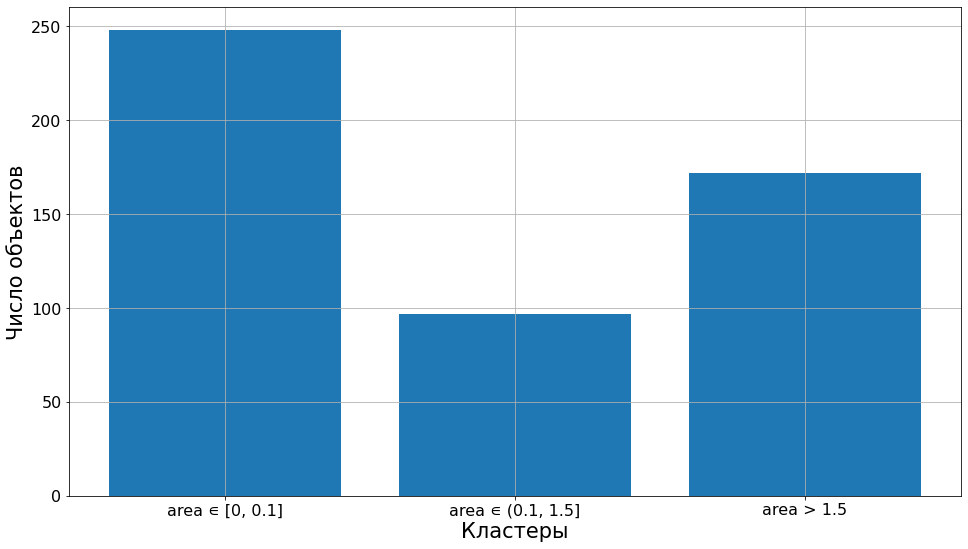

In [18]:
plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(16, 9))
plt.grid(True) 
# plt.xticks(rotation='vertical') 
plt.bar(["area ∊ [0, 0.1]", "area ∊ (0.1, 1.5]", "area > 1.5"], [len(cluster0), len(cluster1), len(cluster2)])
plt.ylabel("Число объектов", fontsize=21)
plt.xlabel("Кластеры", fontsize=21)

In [145]:
res_cluster_0 = benchmark_main(cluster0)
res_cluster_1 = benchmark_main(cluster1)
res_cluster_2 = benchmark_main(cluster2)

/Users/seryogas/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Number of Features:  3
Selected Features:  [ True False False  True False  True False False False False False False
 False False False False False False False False False False False]
Feature Ranking:  [ 1  2  3  1  4  1 14 13  5 18 20 21  6 12 11 10  7  9  8 15 16 17 19]


/Users/seryogas/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Number of Features:  3
Selected Features:  [ True False False  True False  True False False False False False False
 False False False False False False False False False False False]
Feature Ranking:  [ 1  2  4  1  3  1 10 11  8 12  7  5  6 18 14 19 13 15 16 20 21 17  9]


/Users/seryogas/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Number of Features:  3
Selected Features:  [False  True False  True  True False False False False False False False
 False False False False False False False False False False False]
Feature Ranking:  [ 3  1  2  1  1  4  8  6  7 13 11 10 12 18 19 20  9 14 16 17 21 15  5]


In [146]:
final_res_cluster_df = res_cluster_0.add(res_cluster_1, fill_value=0)
final_res_cluster_df = final_res_cluster_df.add(res_cluster_2, fill_value=0)
final_res_cluster_df = final_res_cluster_df / 3

In [147]:
final_res_cluster_df

Linear Regression  K-Neighbors Regressor  RandomForest  \
mean_absolute_error           0.377284               0.366073      0.368110   
mean_squared_error            0.453069               0.465532      0.411968   

                     ExtraTrees       SVR  
mean_absolute_error    0.349012  0.399564  
mean_squared_error     0.379737  0.464353

In [148]:
final_res_cluster_df.compare(res, align_axis=0).rename(index={"self" : "clustering", "other" : "no clustering"}, level=-1)

Linear Regression  K-Neighbors Regressor  \
mean_absolute_error clustering              0.377284               0.366073   
                    no clustering           1.214520               1.237415   
mean_squared_error  clustering              0.453069               0.465532   
                    no clustering           2.330653               2.533087   

                                   RandomForest  ExtraTrees       SVR  
mean_absolute_error clustering         0.368110    0.349012  0.399564  
                    no clustering      1.182365    1.210953  1.142079  
mean_squared_error  clustering         0.411968    0.379737  0.464353  
                    no clustering      2.149509    2.495132  2.466648

In [150]:
res

Linear Regression  K-Neighbors Regressor  RandomForest  \
mean_absolute_error           1.214520               1.237415      1.182365   
mean_squared_error            2.330653               2.533087      2.149509   

                     ExtraTrees       SVR  
mean_absolute_error    1.210953  1.142079  
mean_squared_error     2.495132  2.466648

In [156]:
res_cluster_0

Linear Regression  K-Neighbors Regressor  RandomForest  \
mean_absolute_error           0.001321               0.000689      0.001482   
mean_squared_error            0.000004               0.000012      0.000032   

                     ExtraTrees       SVR  
mean_absolute_error    0.000362  0.043089  
mean_squared_error     0.000004  0.001857

In [157]:
res_cluster_1

Linear Regression  K-Neighbors Regressor  RandomForest  \
mean_absolute_error           0.328361               0.320022      0.313479   
mean_squared_error            0.145737               0.142808      0.139452   

                     ExtraTrees       SVR  
mean_absolute_error    0.316123  0.338235  
mean_squared_error     0.151250  0.154271

In [158]:
res_cluster_2

Linear Regression  K-Neighbors Regressor  RandomForest  \
mean_absolute_error           0.802171               0.777509      0.789369   
mean_squared_error            1.213466               1.253776      1.096420   

                     ExtraTrees       SVR  
mean_absolute_error    0.730551  0.817369  
mean_squared_error     0.987957  1.236932

In [ ]:
data_on_cluster_res = benchmark_main

In [153]:
cluster0

X  Y      FFMC    DMC       ISI  temp  RH  wind  area  day_mon  day_sat  \
0    7  5  4.468204   26.2  1.808289   8.2  51   6.7   0.0        0        0   
1    7  4  4.517431   35.4  2.041220  18.0  33   0.9   0.0        0        0   
2    7  4  4.517431   43.7  2.041220  14.6  33   1.3   0.0        0        1   
3    8  6  4.529368   33.3  2.302585   8.3  97   4.0   0.0        0        0   
4    8  6  4.503137   51.3  2.360854  11.4  99   1.8   0.0        0        0   
..  .. ..       ...    ...       ...   ...  ..   ...   ...      ...      ...   
507  2  4  4.521789  166.9  2.091864  25.9  41   3.6   0.0        0        0   
508  1  2  4.521789  166.9  2.091864  25.9  41   3.6   0.0        0        0   
511  8  6  4.414010   56.7  1.064711  27.8  35   2.7   0.0        0        0   
515  1  4  4.558079  146.0  2.509599  25.6  42   4.0   0.0        0        1   
516  6  3  4.388257    3.0  0.741937  11.8  31   4.5   0.0        0        0   

     day_sun  day_thu  day_tue  day_wed  month_aug  month_dec  month_feb  \
0          0        0        0        0          0          0          0   
1          0        0        1        0          0          0          0   
2          0        0        0        0          0          0          0   
3          0        0        0        0          0          0          0   
4          1        0        0        0          0          0          0   
..       ...      ...      ...      ...        ...        ...        ...   
507        0        0        0        0          1          0          0   
508        0        0        0        0          1          0          0   
511        1        0        0        0          1          0          0   
515        0        0        0        0          1          0          0   
516        0        0        1        0          0          0          0   

     month_jan  month_jul  month_jun  month_mar  month_may  month_nov  \
0            0          0          0          1          0          0   
1            0          0          0          0          0          0   
2            0          0          0          0          0          0   
3            0          0          0          1          0          0   
4            0          0          0          1          0          0   
..         ...        ...        ...        ...        ...        ...   
507          0          0          0          0          0          0   
508          0          0          0          0          0          0   
511          0          0          0          0          0          0   
515          0          0          0          0          0          0   
516          0          0          0          0          0          1   

     month_oct  month_sep  
0            0          0  
1            1          0  
2            1          0  
3            0          0  
4            0          0  
..         ...        ...  
507          0          0  
508          0          0  
511          0          0  
515          0          0  
516          0          0  

[248 rows x 26 columns]

/Users/seryogas/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/seryogas/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/seryogas/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/seryogas/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
<ipython-input-30-32667e3383fc>:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warn

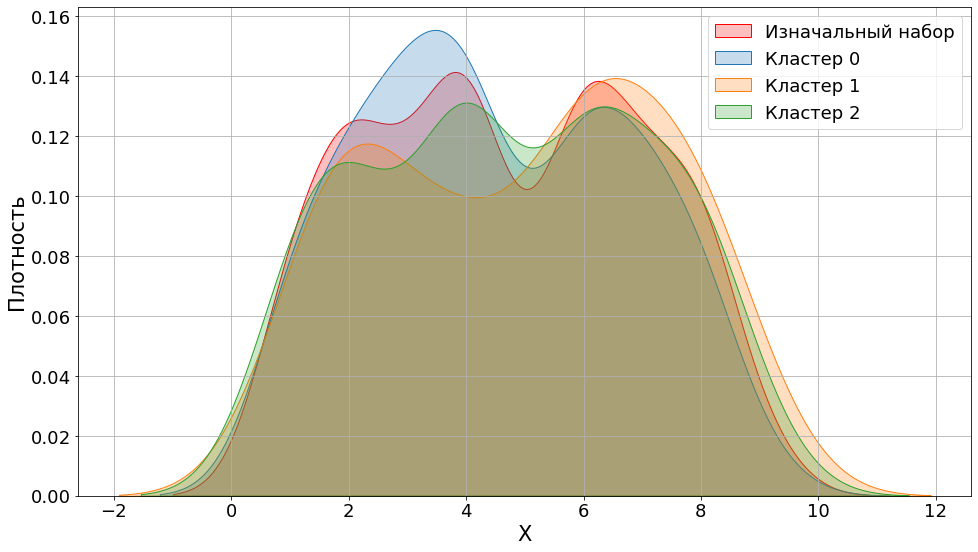

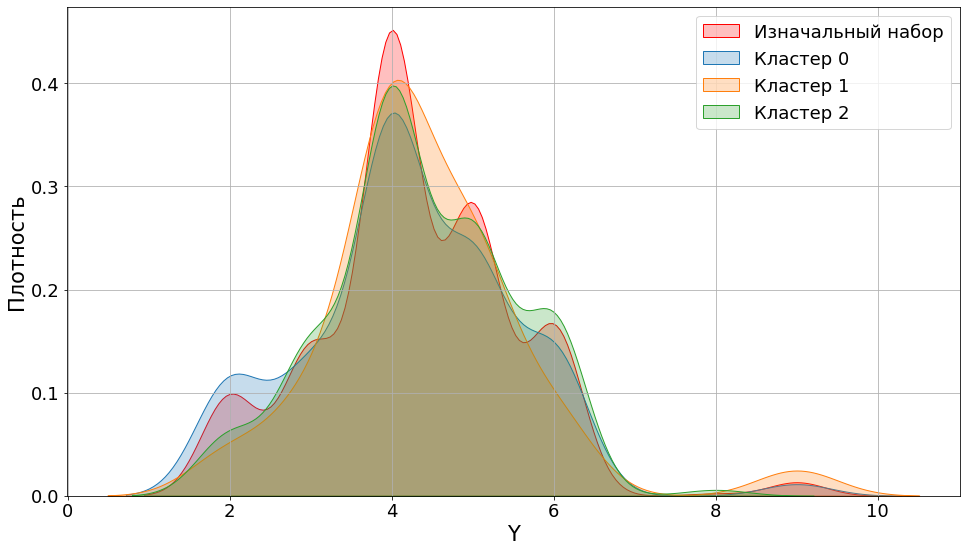

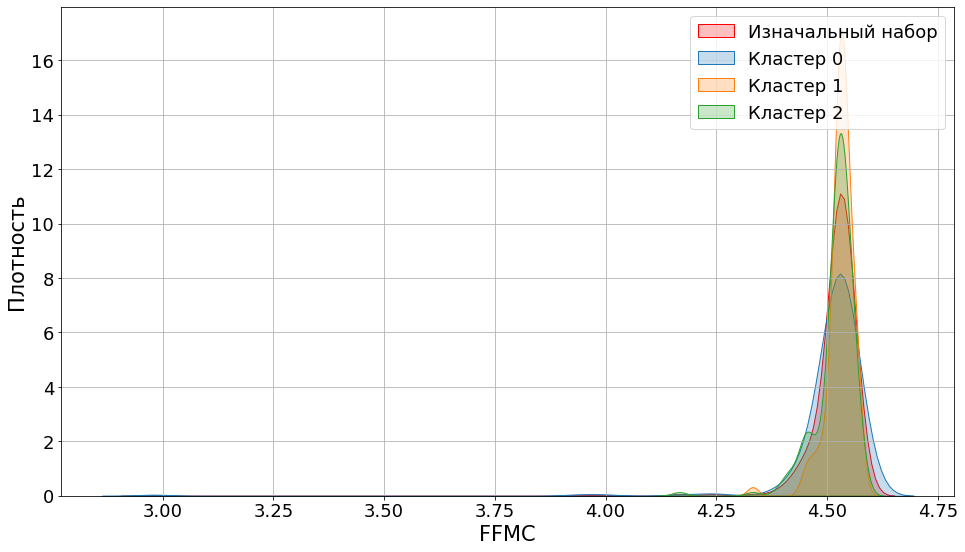

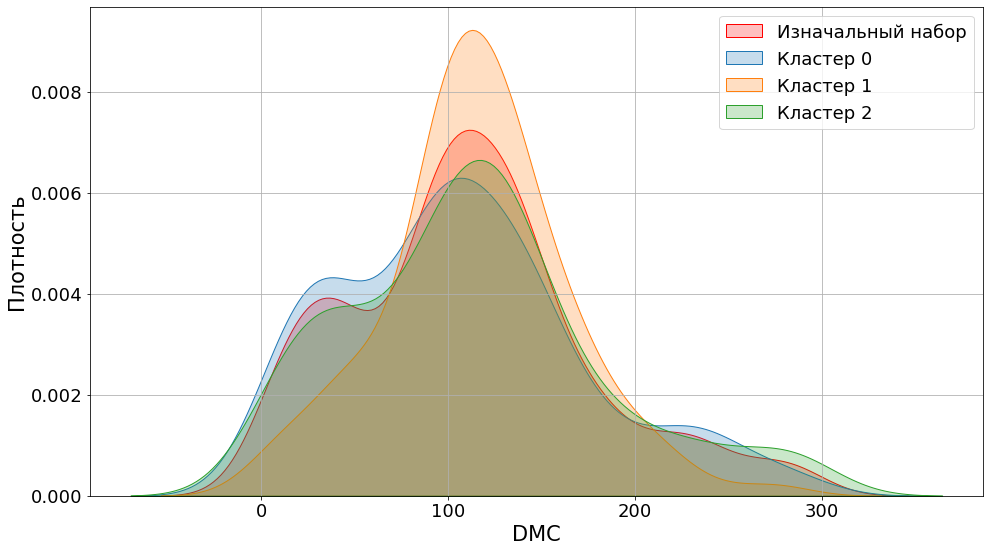

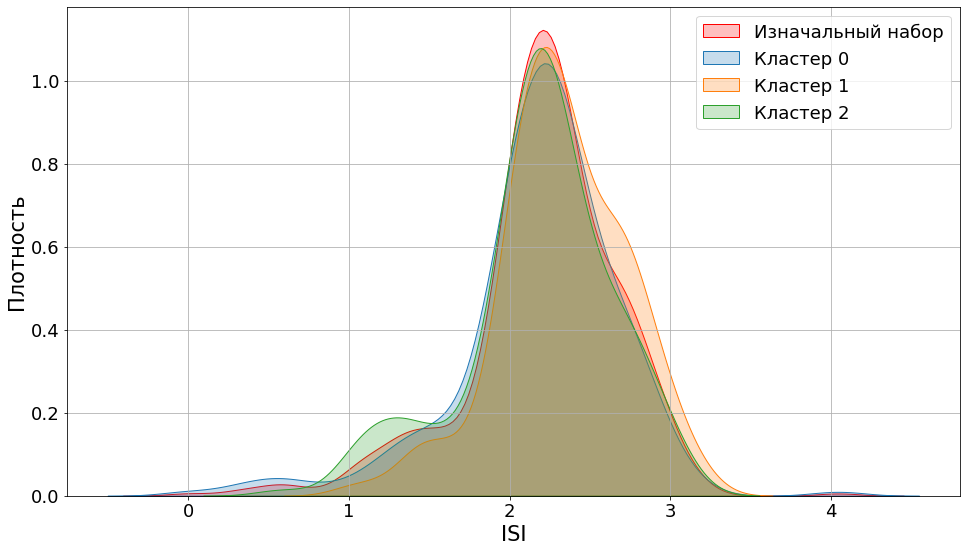

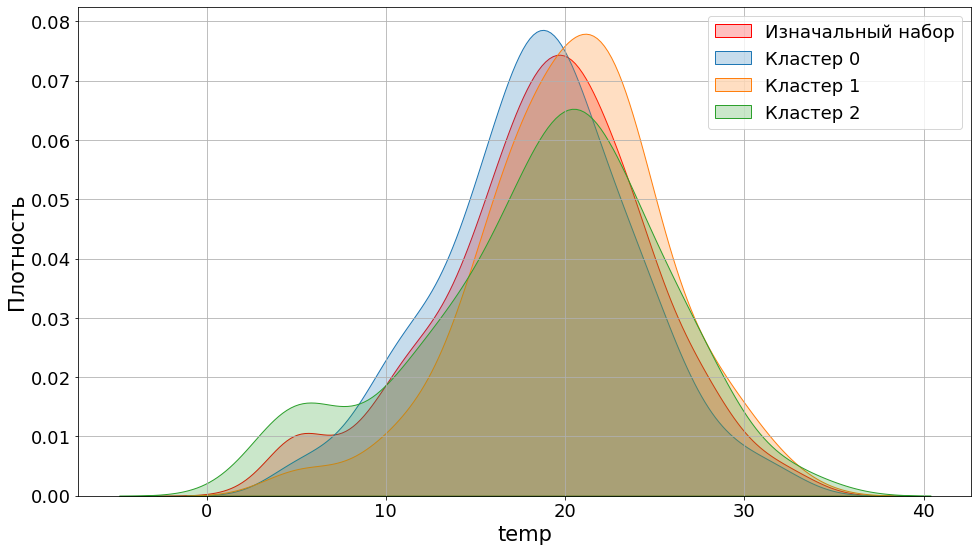

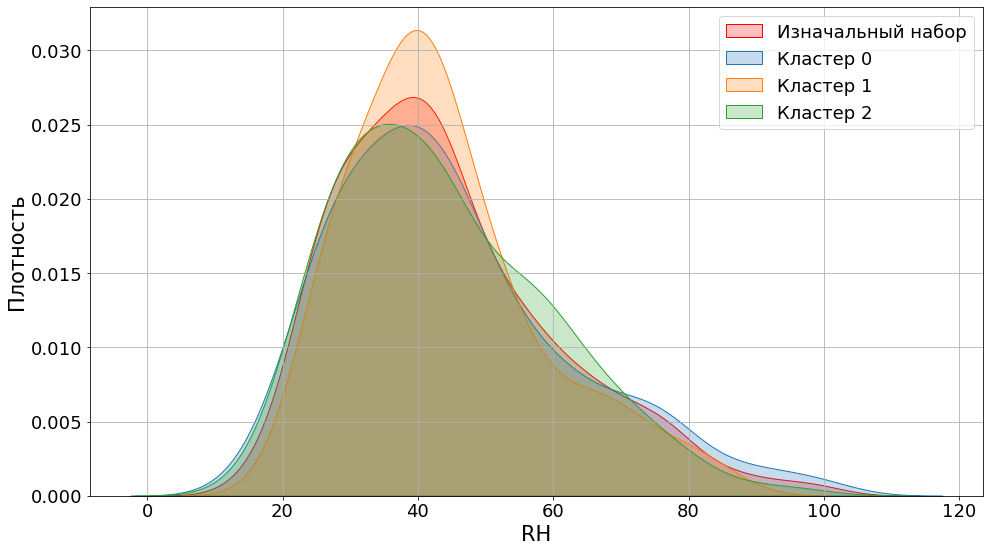

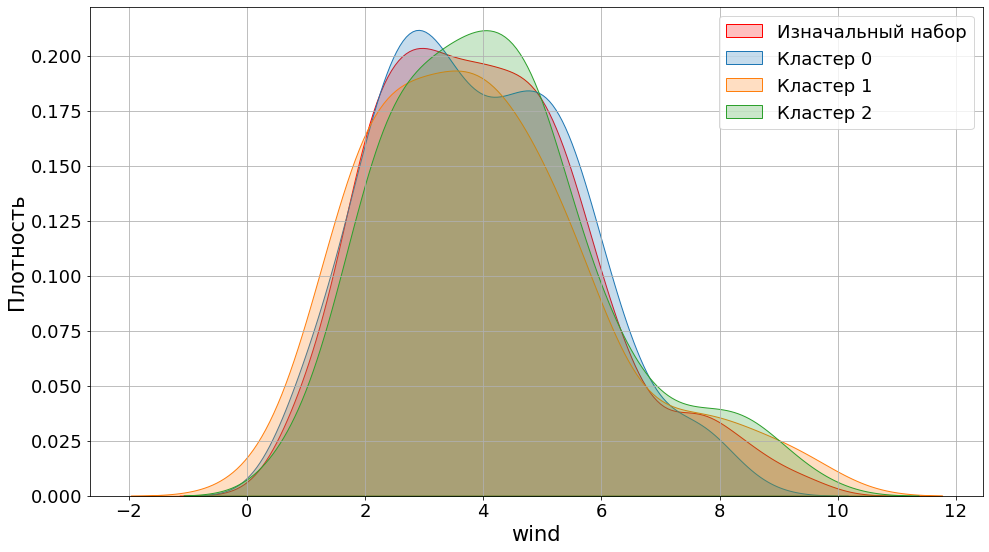

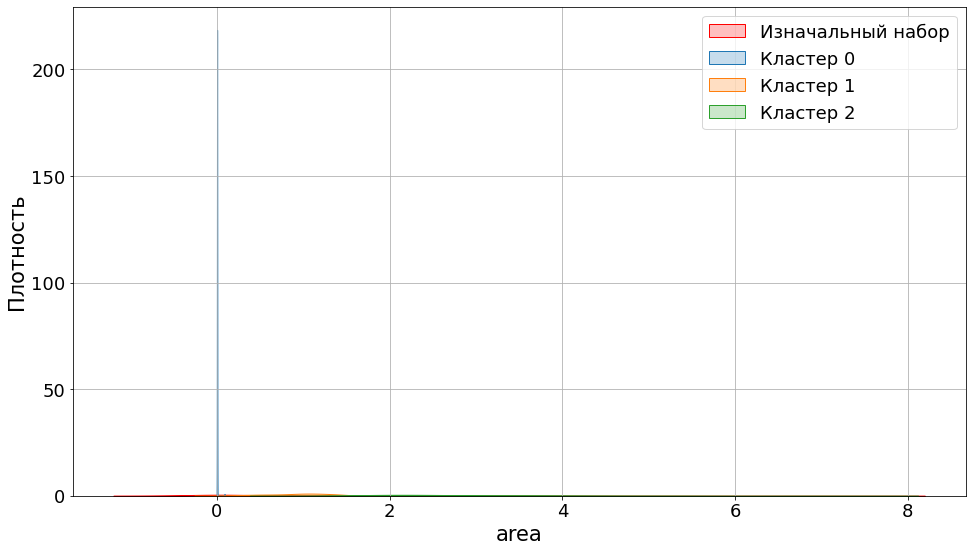

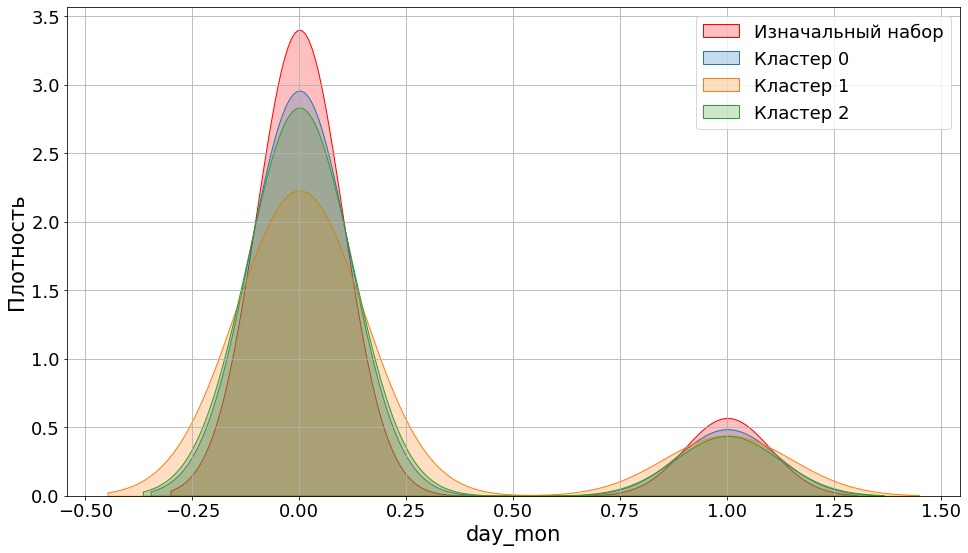

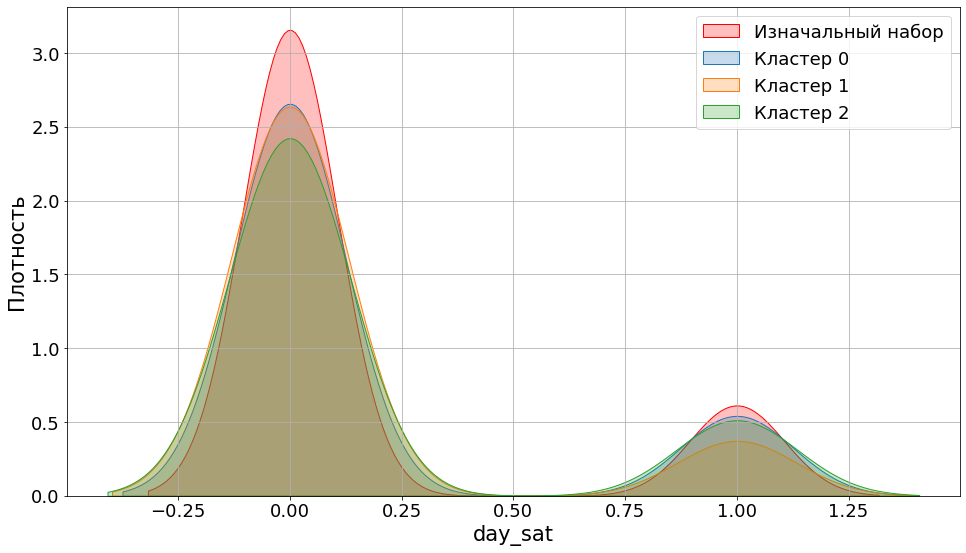

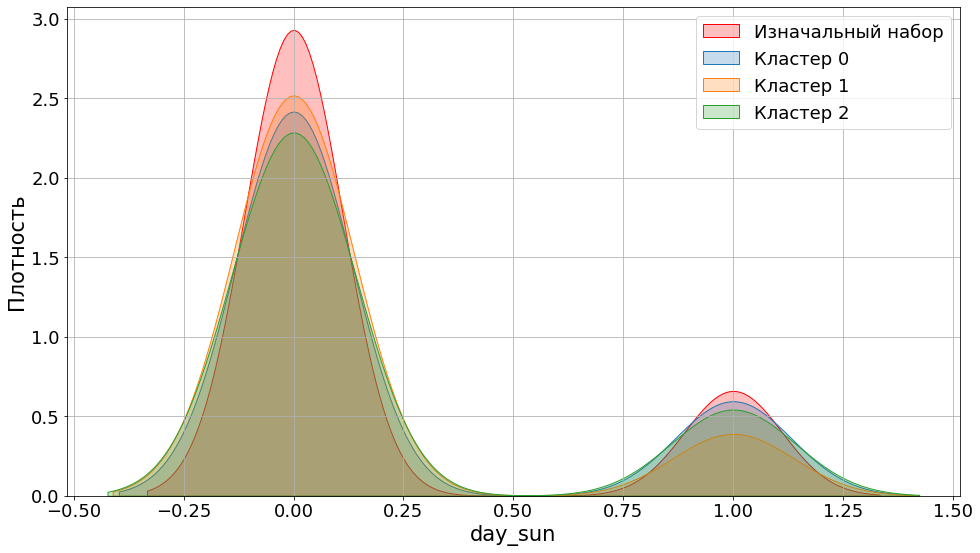

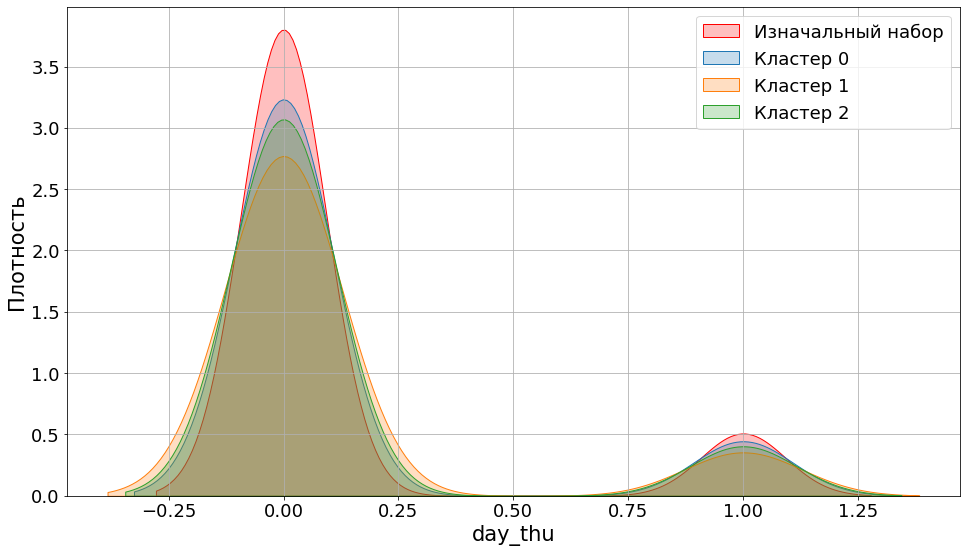

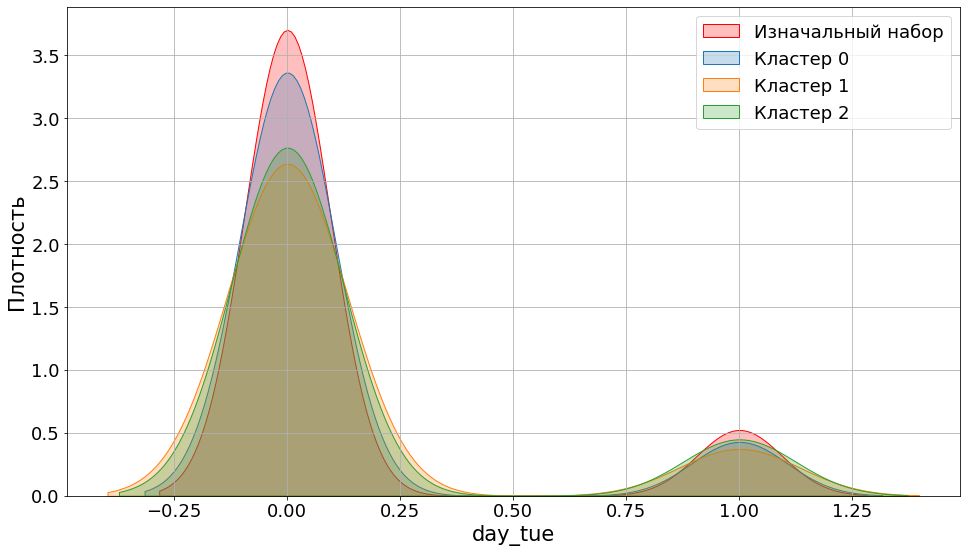

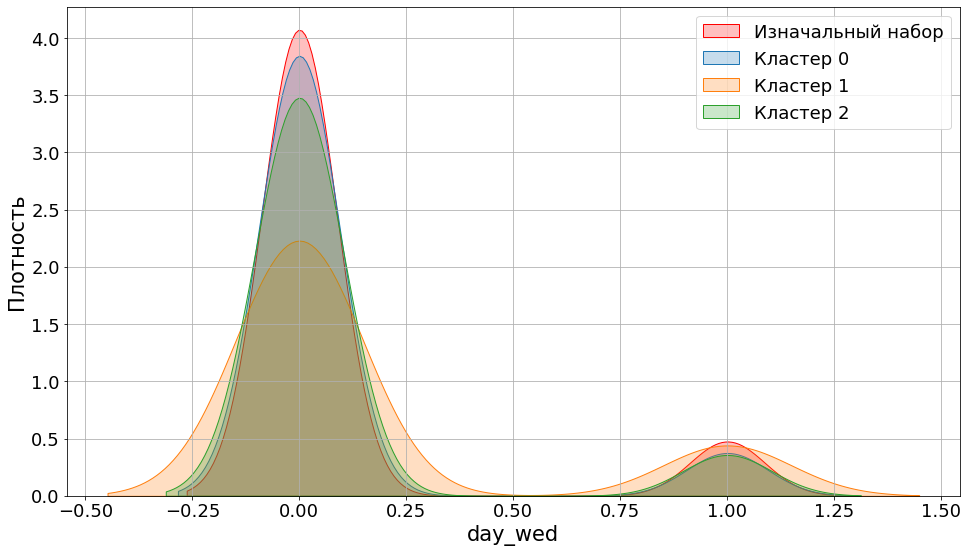

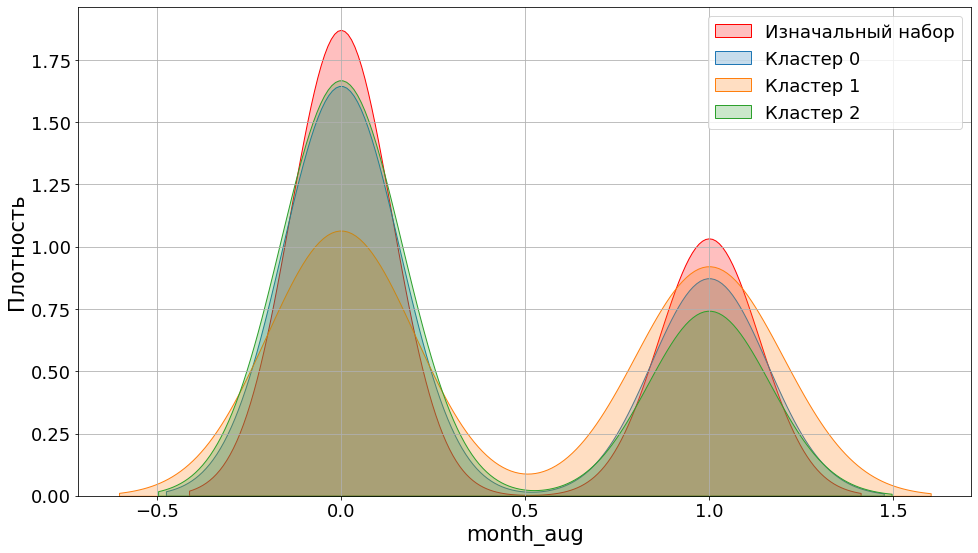

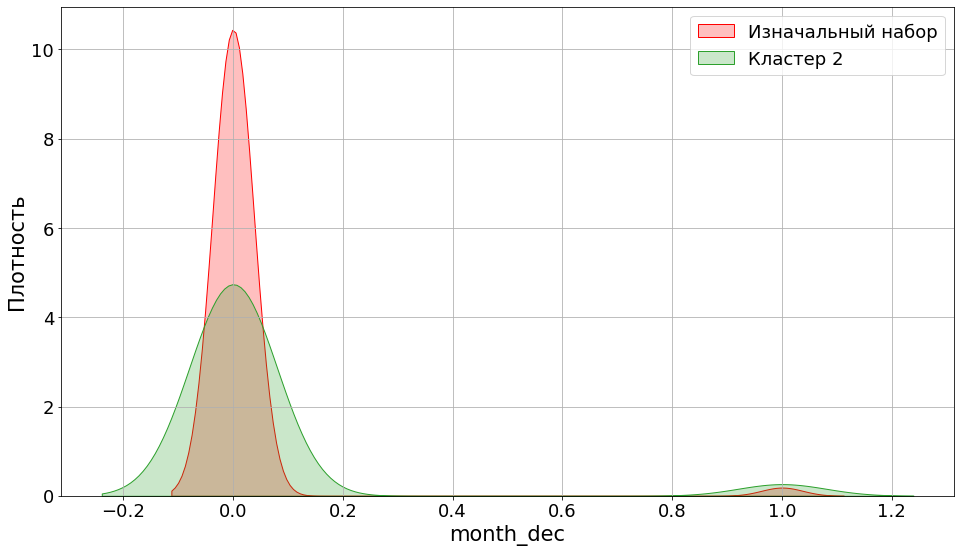

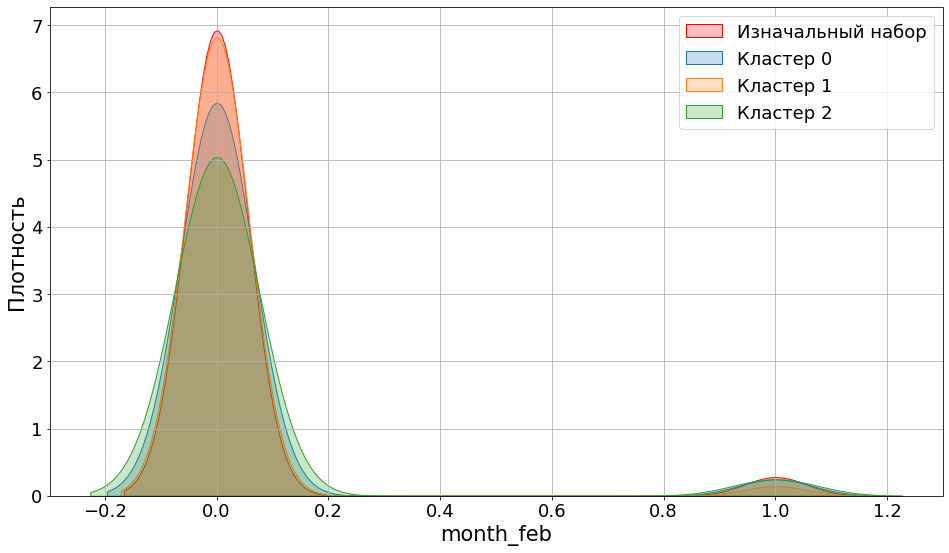

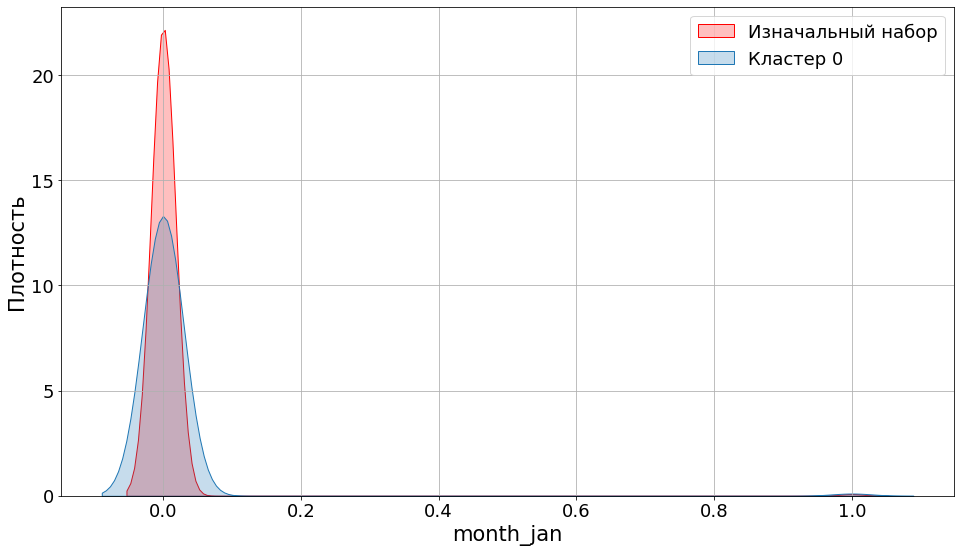

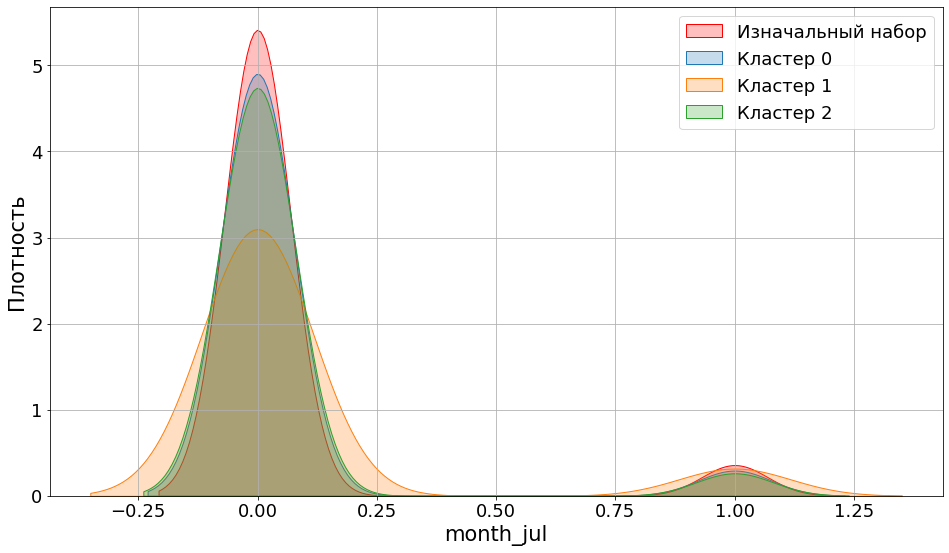

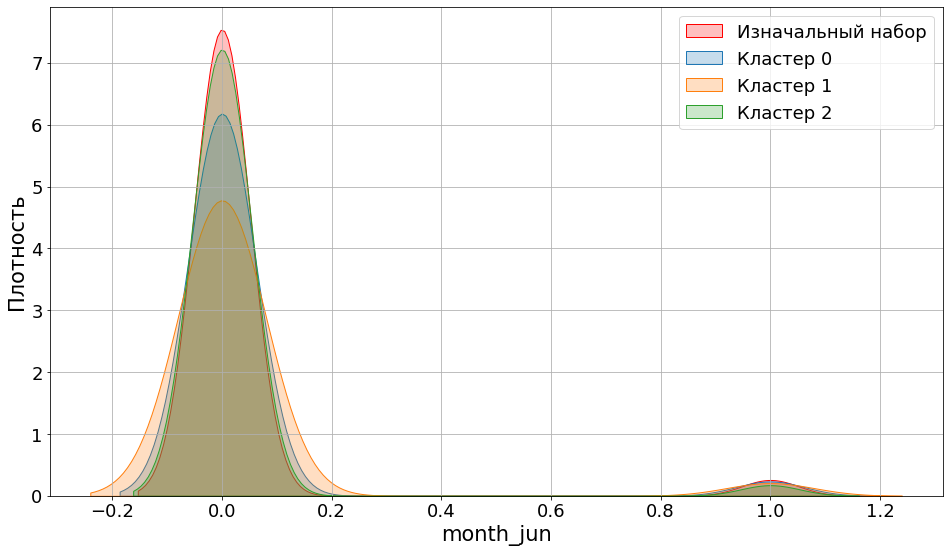

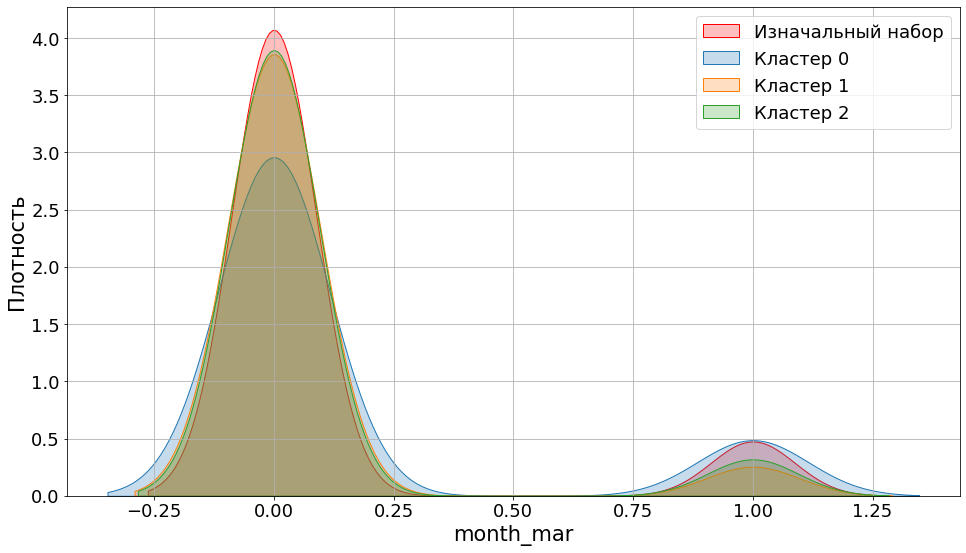

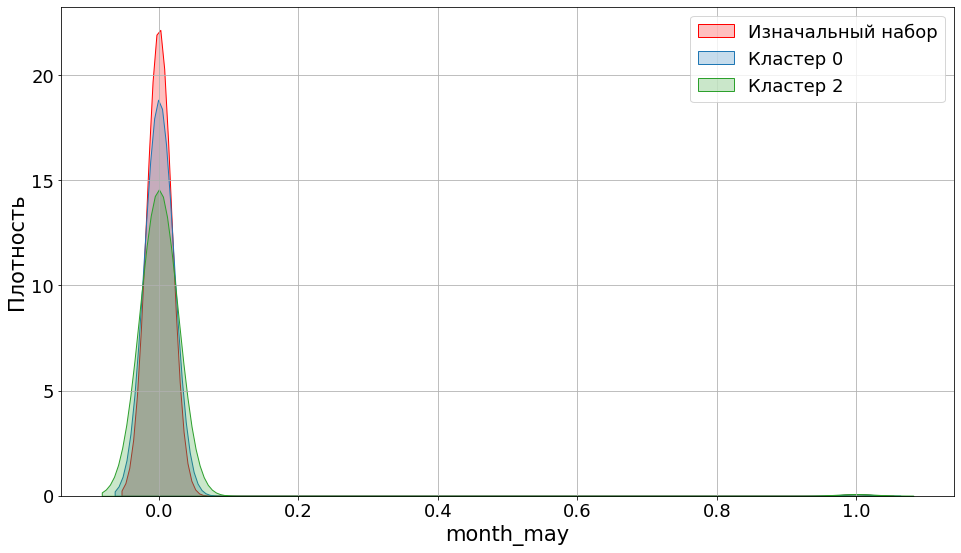

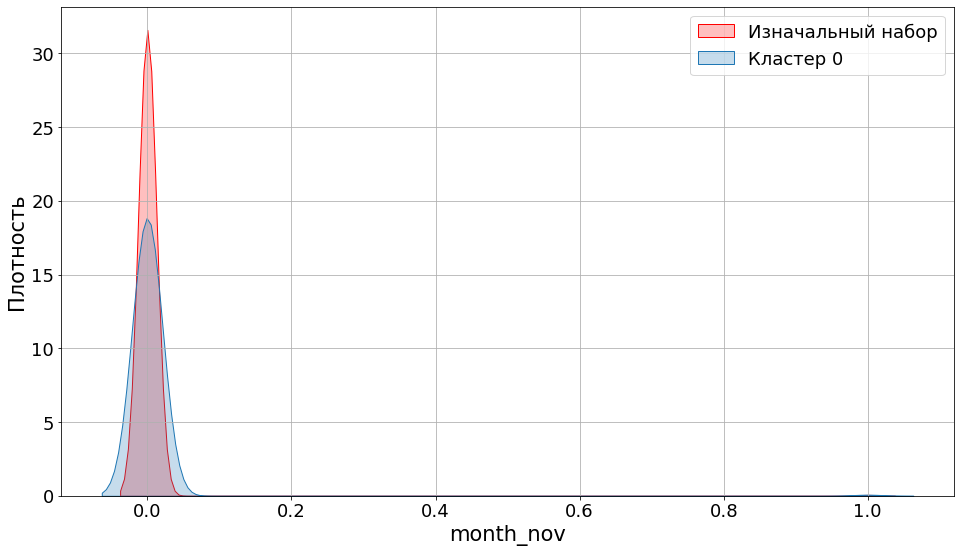

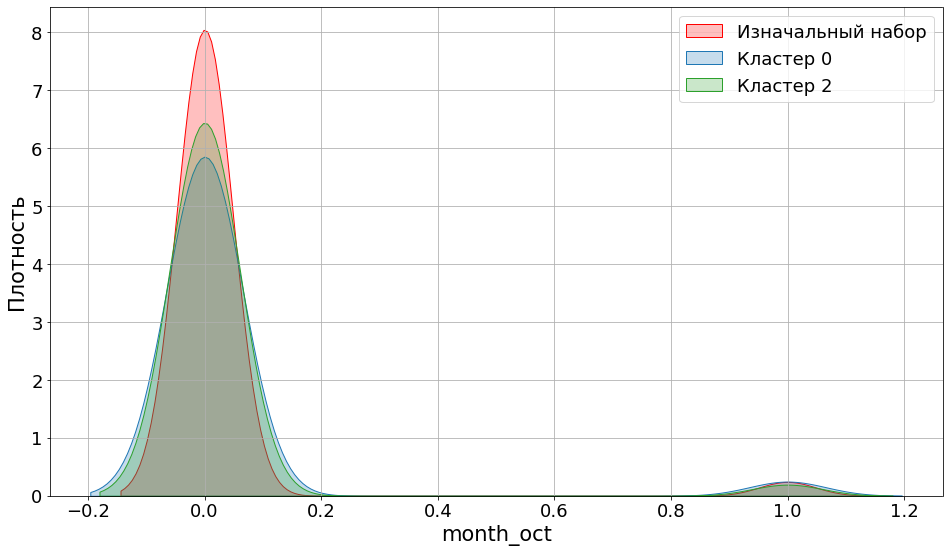

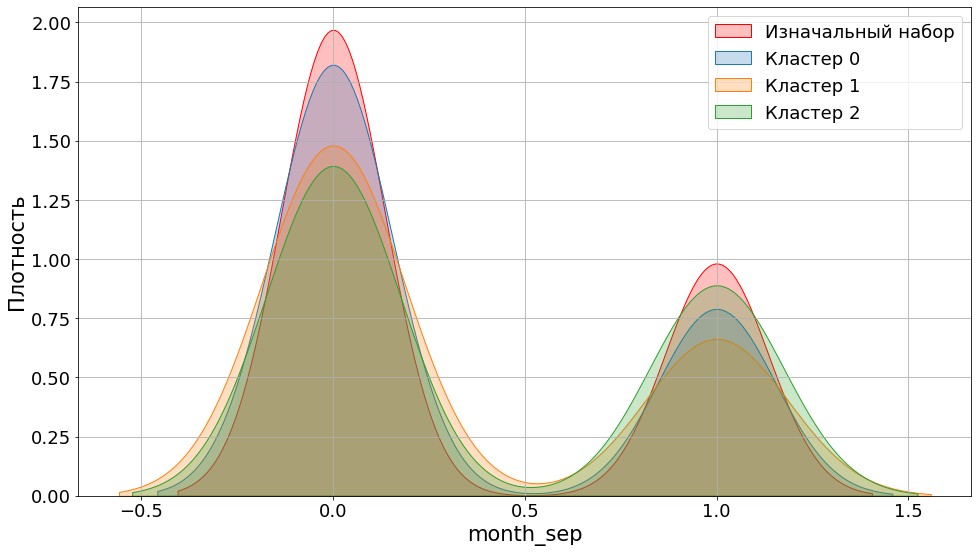

In [30]:
# for param in i[1]:
#     if param == "day_mon":
#         break
#     plt.figure(figsize=plotsize)
#     plt.title("Число кластеров - {}".format(i[0]))
#     plt.grid(True)
#     sns.kdeplot(i[1][param], shade=True, color='r', label="Изначальный набор")
#     for num in range(clusters_number):
#         t = i[1][i[1]["cluster"] == num]
#         sns.kdeplot(t[param], shade=True,label="Кластер {}".format(num))
#     plt.legend()
for param in cluster0:
    plt.figure(figsize=plotsize)
    plt.grid(True)
    sns.kdeplot(data_frame[param], shade=True, color='r', label="Изначальный набор")
    sns.kdeplot(cluster0[param], shade=True,label="Кластер 0")
    sns.kdeplot(cluster1[param], shade=True,label="Кластер 1")
    sns.kdeplot(cluster2[param], shade=True,label="Кластер 2")
    plt.ylabel("Плотность", fontsize=21)
    plt.xlabel(param, fontsize=21)
    plt.legend()

In [19]:
from sklearn.model_selection import train_test_split
def benchmark_main_extra_trees_importances(data):
    # data = pd.read_csv('datasets/forest_fire_dataset.csv')

    # dataset = data.copy()
    # dataset.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
    # dataset.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)

    s_scaler = preprocessing.StandardScaler()
    normalized_standart_data = data.copy()
    tmp = s_scaler.fit_transform(data.loc[:, "FFMC" : "wind"])
    normalized_standart_data.loc[:, "FFMC" : "wind"] = tmp
    normalized_standart_data['X'] = normalized_standart_data['X'].astype('category')
    normalized_standart_data['Y'] = normalized_standart_data['Y'].astype('category')
    
#     dataset = normalized_standart_data.copy()
#     dataset.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
#     dataset.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)
#     dataset['month'] = dataset['month'].astype('category')
#     dataset['day'] = dataset['day'].astype('category')
#     dataset = dataset.drop(['month', 'day'], axis=1)

#     dataset = dataset.values
    
#     X = dataset[:,0:-1]
#     Y = dataset[:,-1]
    X = normalized_standart_data.drop(['area'], axis=1)

    clean_data = normalized_standart_data.drop(["X", 'Y'], axis=1)
    target = clean_data['area']
    features = clean_data.drop(columns = 'area')

    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 42)

    model = ExtraTreesRegressor()
    rfe = RFE(model, 3)
    fit = rfe.fit(x_train, y_train)

    print("Number of Features: ", fit.n_features_)
    print("Selected Features: ", fit.support_)
    print("Feature Ranking: ", fit.ranking_)

#     num_instances = len(x_train)

    models = []
    models.append(('Linear Regression', LinearRegression()))
#     models.append(('K-Neighbors Regressor', KNeighborsRegressor()))
#     models.append(('RandomForest', RandomForestRegressor()))
#     models.append(('ExtraTrees', ExtraTreesRegressor()))
#     models.append(('SVR', SVR()))

    # Evaluations
    results = {}
    scoring = []

    # Fit the model
    model.fit(x_train, y_train)

    predictions = model.predict(x_test)
#         print(model.get_params())

    # Evaluate the model
#         score = explained_variance_score(y_test, predictions)
    mae = mean_absolute_error(predictions, y_test)
    mse = mean_squared_error(y_test, predictions)


#     results[name] = [mae, mse]
#     results = pd.DataFrame.from_dict(results)
#     results.index = ['mean_absolute_error', 'mean_squared_error']
#     return results
    plt.figure(figsize=plotsize)
    return model[-1]

In [17]:
# for linear regression
some_lr_model = benchmark_main_extra_trees_importances(cluster0)
some_lr_model.get_params()

/Users/seryogas/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Number of Features:  3
Selected Features:  [False  True False  True  True False False False False False False False
 False False False False False False False False False False False]
Feature Ranking:  [ 2  1  3  1  1  4 14 13  5 18 20 21  6 12 11 10  9  8  7 15 19 16 17]


{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 849461912,
 'splitter': 'random'}

<Figure size 1152x648 with 0 Axes>

In [20]:
tmp = generate_data(data, dummy=True, delete_DC=True, delete_rain=True, optimizing_data=True)
print(len(tmp.columns))
some_model = benchmark_main_extra_trees_importances(tmp)


-----Delete rain-------------
     X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
3    8  6   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00
243  7  4   aug  sun  91.8  175.1  700.7  13.8  21.9  73   7.6   1.0   0.00
286  7  6   jul  wed  91.2  183.1  437.7  12.5  12.6  90   7.6   0.2   0.00
499  7  5   aug  tue  96.1  181.1  671.2  14.3  27.3  63   4.9   6.4  10.82
500  8  6   aug  tue  96.1  181.1  671.2  14.3  21.6  65   4.9   0.8   0.00
501  7  5   aug  tue  96.1  181.1  671.2  14.3  21.6  65   4.9   0.8   0.00
502  4  4   aug  tue  96.1  181.1  671.2  14.3  20.7  69   4.9   0.4   0.00
509  5  4   aug  fri  91.0  166.9  752.6   7.1  21.1  71   7.6   1.4   2.17

-----Delete DC-------------

-----Optimizing data-------------

-----Make dummy data-------------
26


/Users/seryogas/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Number of Features:  3
Selected Features:  [False  True False  True  True False False False False False False False
 False False False False False False False False False False False]
Feature Ranking:  [ 4  1  3  1  1  2  7 12  6 10  8  5 14 11 18 21  9 15 19 16 20 17 13]


<Figure size 1152x648 with 0 Axes>

In [21]:
plt.figure(figsize=(16, 9))
plt.grid(True) 
plt.xticks(rotation='vertical') 
plt.bar(tmp.drop(['X', "Y", "area"], axis=1).columns, some_model.feature_importances_)
4  1  2  1  1  3  7  6  9 13 11 10 12 18 19 20  8 14 15 17 21 16  5]

SyntaxError: invalid syntax (<ipython-input-21-bfe08e7314ee>, line 5)

Text(0, 0.5, 'Плотность')

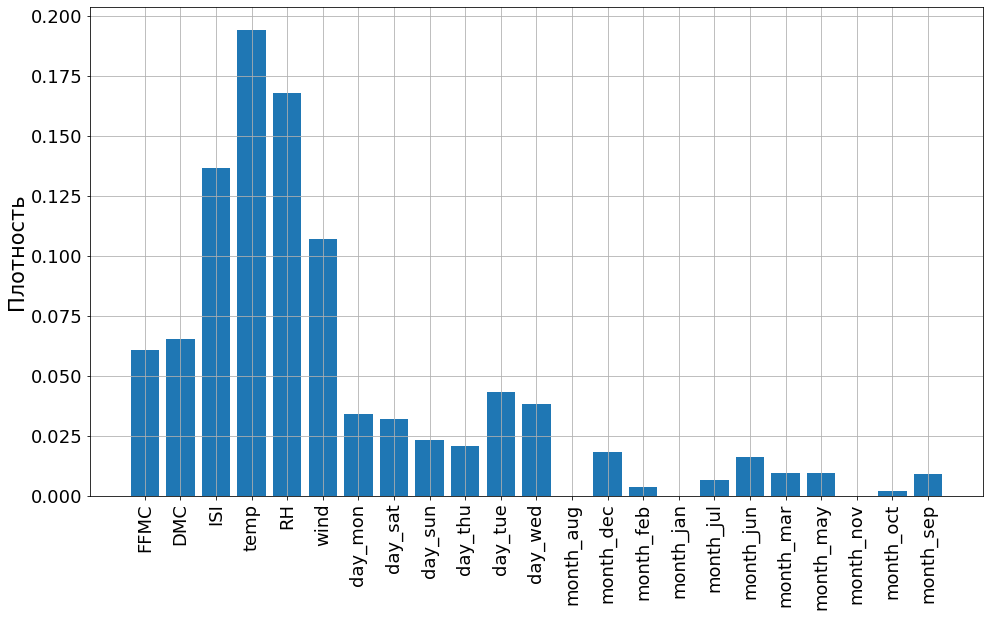

In [24]:
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(16, 9))
plt.grid(True) 
plt.xticks(rotation='vertical') 
plt.bar(tmp.drop(['X', "Y", "area"], axis=1).columns, some_model.feature_importances_)
plt.ylabel("Плотность", fontsize=21)

In [170]:
len(tmp.columns)

26

In [177]:
some_model.feature_importances_

array([0.0669128 , 0.10292386, 0.08865918, 0.14523333, 0.15727487,
       0.16462291, 0.02353779, 0.0454121 , 0.04974134, 0.04516532,
       0.01767648, 0.01822366, 0.00356601, 0.01835297, 0.0042188 ,
       0.        , 0.01106228, 0.00774646, 0.00991037, 0.01054002,
       0.        , 0.        , 0.00921945])

In [185]:
some_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 22418615,
 'splitter': 'random'}

In [32]:
data_frame.describe()

X           Y        FFMC         DMC         ISI        temp  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     4.669246    4.299807    4.515021  110.872340    2.204023   18.889168   
std      2.313778    1.229900    0.088019   64.046482    0.474845    5.806625   
min      1.000000    2.000000    2.980619    1.100000    0.000000    2.200000   
25%      3.000000    4.000000    4.513055   68.600000    2.014903   15.500000   
50%      4.000000    4.000000    4.528289  108.300000    2.240710   19.300000   
75%      7.000000    5.000000    4.542230  142.400000    2.468100   22.800000   
max      9.000000    9.000000    4.576771  291.300000    4.044804   33.300000   

               RH        wind        area     day_mon     day_sat     day_sun  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean    44.288201    4.017602    1.111026    0.143133    0.162476    0.183752   
std     16.317469    1.791653    1.398436    0.350548    0.369244    0.387657   
min     15.000000    0.400000    0.000000    0.000000    0.000000    0.000000   
25%     33.000000    2.700000    0.000000    0.000000    0.000000    0.000000   
50%     42.000000    4.000000    0.418710    0.000000    0.000000    0.000000   
75%     53.000000    4.900000    2.024193    0.000000    0.000000    0.000000   
max    100.000000    9.400000    6.995620    1.000000    1.000000    1.000000   

          day_thu     day_tue     day_wed   month_aug   month_dec   month_feb  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     0.117988    0.123791    0.104449    0.355899    0.017408    0.038685   
std      0.322907    0.329662    0.306138    0.479249    0.130913    0.193029   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    1.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        month_jan   month_jul   month_jun   month_mar   month_may   month_nov  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     0.003868    0.061896    0.032882    0.104449    0.003868    0.001934   
std      0.062137    0.241199    0.178500    0.306138    0.062137    0.043980   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        month_oct   month_sep  
count  517.000000  517.000000  
mean     0.029014    0.332689  
std      0.168007    0.471632  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    0.000000  
75%      0.000000    1.000000  
max      1.000000    1.000000

In [33]:
tmp = data_frame[data_frame['area'] > 0.41]

<BarContainer object of 6 artists>

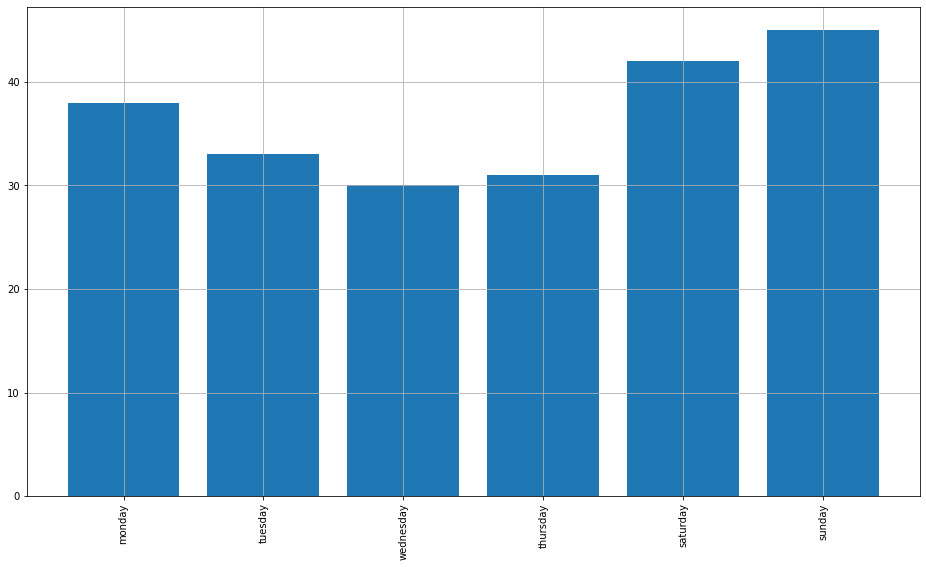

In [41]:
plt.figure(figsize=(16, 9))
plt.grid(True) 
plt.xticks(rotation='vertical')

x1 = len(tmp[tmp['day_mon'] == 1])
x2 = len(tmp[tmp['day_tue'] == 1])
x3 = len(tmp[tmp['day_wed'] == 1])
x4 = len(tmp[tmp['day_thu'] == 1])
x5 = len(tmp[tmp['day_sat'] == 1])
x6 = len(tmp[tmp['day_sun'] == 1])
plt.bar(['monday', 'tuesday', 'wednesday','thursday','saturday','sunday'], [x1, x2, x3, x4, x5, x6])
# plt.bar(tmp.loc[:, 'day_mon' : 'day_wed'], some_model.feature_importances_)

<BarContainer object of 11 artists>

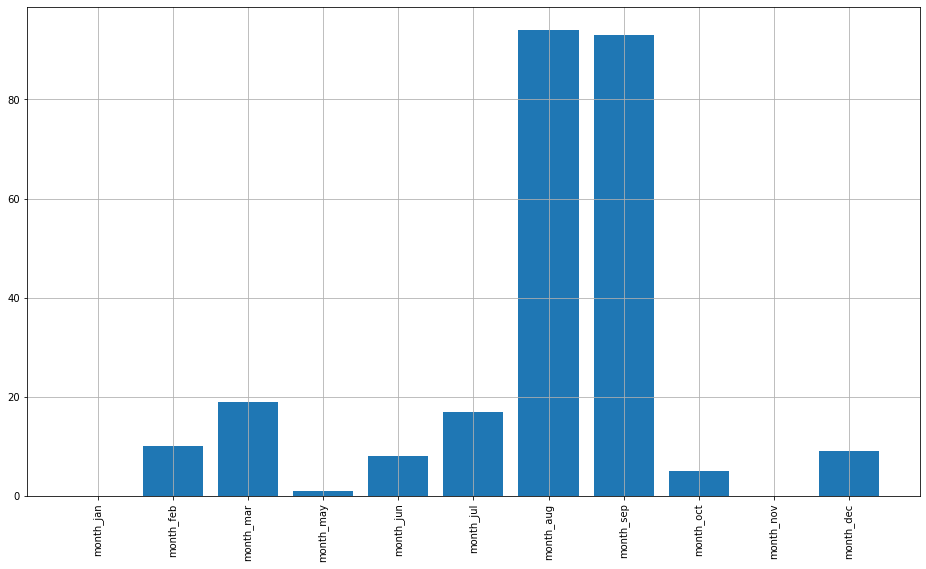

In [42]:
plt.figure(figsize=(16, 9))
plt.grid(True) 
plt.xticks(rotation='vertical')

x1 = len(tmp[tmp['month_jan'] == 1])
x2 = len(tmp[tmp['month_feb'] == 1])
x3 = len(tmp[tmp['month_mar'] == 1])
x4 = len(tmp[tmp['month_may'] == 1])
x5 = len(tmp[tmp['month_jun'] == 1])
x6 = len(tmp[tmp['month_jul'] == 1])
x7 = len(tmp[tmp['month_aug'] == 1])
x8 = len(tmp[tmp['month_sep'] == 1])
x9 = len(tmp[tmp['month_oct'] == 1])
x10 = len(tmp[tmp['month_nov'] == 1])
x11 = len(tmp[tmp['month_dec'] == 1])
plt.bar(['month_jan', 'month_feb','month_mar','month_may','month_jun','month_jul','month_aug','month_sep',
         'month_oct','month_nov','month_dec'], [x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11])
# plt.bar(tmp.loc[:, 'day_mon' : 'day_wed'], some_model.feature_importances_)

In [56]:
from sklearn.model_selection import train_test_split
def benchmark_extra(data):
    # data = pd.read_csv('datasets/forest_fire_dataset.csv')

    # dataset = data.copy()
    # dataset.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
    # dataset.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)

    s_scaler = preprocessing.StandardScaler()
    normalized_standart_data = data.copy()
    tmp = s_scaler.fit_transform(data.loc[:, "FFMC" : "wind"])
    normalized_standart_data.loc[:, "FFMC" : "wind"] = tmp
    normalized_standart_data['X'] = normalized_standart_data['X'].astype('category')
    normalized_standart_data['Y'] = normalized_standart_data['Y'].astype('category')
    
#     dataset = normalized_standart_data.copy()
#     dataset.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
#     dataset.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)
#     dataset['month'] = dataset['month'].astype('category')
#     dataset['day'] = dataset['day'].astype('category')
#     dataset = dataset.drop(['month', 'day'], axis=1)

#     dataset = dataset.values
    
#     X = dataset[:,0:-1]
#     Y = dataset[:,-1]
    X = normalized_standart_data.drop(['area'], axis=1)

    clean_data = normalized_standart_data.drop(["X", 'Y'], axis=1)
    target = clean_data['area']
    features = clean_data.drop(columns = 'area')

    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 42)

#     model = ExtraTreesRegressor()
#     rfe = RFE(model, 3)
#     fit = rfe.fit(x_train, y_train)

#     print("Number of Features: ", fit.n_features_)
#     print("Selected Features: ", fit.support_)
#     print("Feature Ranking: ", fit.ranking_) 

#     num_instances = len(x_train)

#     models = []
#     models.append(('Linear Regression', LinearRegression()))
#     models.append(('K-Neighbors Regressor', KNeighborsRegressor()))
#     models.append(('RandomForest', RandomForestRegressor()))
#     models.append(('ExtraTrees', ExtraTreesRegressor()))
#     models.append(('SVR', SVR()))

    # Evaluations
    results = {}
    names = []
    scoring = []
    
    for i in range(1, 10):
        knn = KNeighborsRegressor(n_neighbors=i)
        knn.fit(x_train, y_train)
        predictions = knn.predict(x_test)
        mae = mean_absolute_error(predictions, y_test)
        mse = mean_squared_error(y_test, predictions)
        name = "KNN-{}".format(i)
        names.append(name)
        results[name] = [mae, mse]
        print(name, "  ----->   ", mae, " / ", mse)
        
    for i in range(30, 300, 10):
        trees = RandomForestRegressor(n_estimators=i)
        trees.fit(x_train, y_train)
        predictions = trees.predict(x_test)
        mae = mean_absolute_error(predictions, y_test)
        mse = mean_squared_error(y_test, predictions)
        name = "RandomForest-{}".format(i)
        names.append(name)
        results[name] = [mae, mse]
        print(name, "  ----->   ", mae, " / ", mse)
        
    for i in range(30, 300, 10):
        trees = ExtraTreesRegressor(n_estimators=i)
        trees.fit(x_train, y_train)
        predictions = trees.predict(x_test)
        mae = mean_absolute_error(predictions, y_test)
        mse = mean_squared_error(y_test, predictions)
        name = "ExtraTreesRegressor-{}".format(i)
        names.append(name)
        results[name] = [mae, mse]
        print(name, "  ----->   ", mae, " / ", mse)
        
#     for name, model in models:
#         # Fit the model
#         model.fit(x_train, y_train)

#         predictions = model.predict(x_test)
# #         print(model.get_params())

#         # Evaluate the model
# #         score = explained_variance_score(y_test, predictions)
#         mae = mean_absolute_error(predictions, y_test)
#         mse = mean_squared_error(y_test, predictions)
#         names.append(name)

#         results[name] = [mae, mse]
    results = pd.DataFrame.from_dict(results)
    results.index = ['mean_absolute_error', 'mean_squared_error']
    return results

In [57]:
res = benchmark_extra(generate_data(data, dummy=True, delete_DC=True, delete_rain=True, optimizing_data=True))


-----Delete rain-------------
     X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
3    8  6   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00
243  7  4   aug  sun  91.8  175.1  700.7  13.8  21.9  73   7.6   1.0   0.00
286  7  6   jul  wed  91.2  183.1  437.7  12.5  12.6  90   7.6   0.2   0.00
499  7  5   aug  tue  96.1  181.1  671.2  14.3  27.3  63   4.9   6.4  10.82
500  8  6   aug  tue  96.1  181.1  671.2  14.3  21.6  65   4.9   0.8   0.00
501  7  5   aug  tue  96.1  181.1  671.2  14.3  21.6  65   4.9   0.8   0.00
502  4  4   aug  tue  96.1  181.1  671.2  14.3  20.7  69   4.9   0.4   0.00
509  5  4   aug  fri  91.0  166.9  752.6   7.1  21.1  71   7.6   1.4   2.17

-----Delete DC-------------

-----Optimizing data-------------

-----Make dummy data-------------
KNN-1   ----->    1.2850410114931672  /  3.3210944315790325
KNN-2   ----->    1.1670956500201823  /  2.473494586714291
KNN-3   ----->    1.2775839270829796  /  2.5800350079269196
KNN-4  

In [58]:
tt = generate_data(data, dummy=True, delete_DC=True, delete_rain=True, optimizing_data=True)


-----Delete rain-------------
     X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
3    8  6   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00
243  7  4   aug  sun  91.8  175.1  700.7  13.8  21.9  73   7.6   1.0   0.00
286  7  6   jul  wed  91.2  183.1  437.7  12.5  12.6  90   7.6   0.2   0.00
499  7  5   aug  tue  96.1  181.1  671.2  14.3  27.3  63   4.9   6.4  10.82
500  8  6   aug  tue  96.1  181.1  671.2  14.3  21.6  65   4.9   0.8   0.00
501  7  5   aug  tue  96.1  181.1  671.2  14.3  21.6  65   4.9   0.8   0.00
502  4  4   aug  tue  96.1  181.1  671.2  14.3  20.7  69   4.9   0.4   0.00
509  5  4   aug  fri  91.0  166.9  752.6   7.1  21.1  71   7.6   1.4   2.17

-----Delete DC-------------

-----Optimizing data-------------

-----Make dummy data-------------


In [59]:
tt.describe()

X           Y        FFMC         DMC         ISI        temp  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     4.669246    4.299807    4.515021  110.872340    2.204023   18.889168   
std      2.313778    1.229900    0.088019   64.046482    0.474845    5.806625   
min      1.000000    2.000000    2.980619    1.100000    0.000000    2.200000   
25%      3.000000    4.000000    4.513055   68.600000    2.014903   15.500000   
50%      4.000000    4.000000    4.528289  108.300000    2.240710   19.300000   
75%      7.000000    5.000000    4.542230  142.400000    2.468100   22.800000   
max      9.000000    9.000000    4.576771  291.300000    4.044804   33.300000   

               RH        wind        area     day_mon     day_sat     day_sun  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean    44.288201    4.017602    1.111026    0.143133    0.162476    0.183752   
std     16.317469    1.791653    1.398436    0.350548    0.369244    0.387657   
min     15.000000    0.400000    0.000000    0.000000    0.000000    0.000000   
25%     33.000000    2.700000    0.000000    0.000000    0.000000    0.000000   
50%     42.000000    4.000000    0.418710    0.000000    0.000000    0.000000   
75%     53.000000    4.900000    2.024193    0.000000    0.000000    0.000000   
max    100.000000    9.400000    6.995620    1.000000    1.000000    1.000000   

          day_thu     day_tue     day_wed   month_aug   month_dec   month_feb  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     0.117988    0.123791    0.104449    0.355899    0.017408    0.038685   
std      0.322907    0.329662    0.306138    0.479249    0.130913    0.193029   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    1.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        month_jan   month_jul   month_jun   month_mar   month_may   month_nov  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     0.003868    0.061896    0.032882    0.104449    0.003868    0.001934   
std      0.062137    0.241199    0.178500    0.306138    0.062137    0.043980   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        month_oct   month_sep  
count  517.000000  517.000000  
mean     0.029014    0.332689  
std      0.168007    0.471632  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    0.000000  
75%      0.000000    1.000000  
max      1.000000    1.000000